<a href="https://colab.research.google.com/github/jrod-projects-hub/Portfolio-Projects/blob/main/breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## preliminary code

In [ ]:

#jaime rodriguez


import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# DATA explortation breast_cancer_data
 1. DESC
 2. bunch type
 3. attributes of breast_cancer_data

In [ ]:
breast_cancer_data = sklearn.datasets.load_breast_cancer()
breast_cancer_data


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
#DESC
print(breast_cancer_data.DESCR, sep = '\n')

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
#Bunch type object
type(breast_cancer_data)


sklearn.utils._bunch.Bunch

In [ ]:
#attributes
dir(breast_cancer_data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

# TASK 1

## create pd_cancer_df

In [ ]:
#loading data set and attributes

# print(f'feature names: {breast_cancer_data.feature_names}','\n')
# print(f'target names" {breast_cancer_data.target_names}','\n')
# print(f'shape: {breast_cancer_data.data.shape}', '\n')

#concatenate the feature data array and the target data arrays (as well as the feature name array and target name array)



#create DF
pd_cancer_df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
pd_cancer_df['target'] = breast_cancer_data.target
pd_cancer_df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89          103.60      781.0          0.09710   
12        19.170         24.80          132.40     1123.0          0.09740   
13        15.850         23.95          103.70      782.7          0.08401   
14        13.730         22.61           93.60      578.3          0.11310   
15        14.540         27.54           96.73      658.8          0.11390   
16        14.680         20.13           94.74      684.5          0.09867   
17        16.130         20.68          108.10      798.8          0.11700   
18        19.810         22.15          130.00     1260.0          0.09831   
19        13.540         14.36           87.46      566.3          0.09779   
20        13.080         15.71           85.63      520.0          0.10750   
21         9.504         12.44           60.34      273.9          0.10240   
22        15.340         14.26          102.50      704.4          0.10730   
23        21.160         23.04          137.20     1404.0          0.09428   
24        16.650         21.38          110.00      904.6          0.11210   
25        17.140         16.40          116.00      912.7          0.11860   
26        14.580         21.53           97.41      644.8          0.10540   
27        18.610         20.25          122.10     1094.0          0.09440   
28        15.300         25.27          102.40      732.4          0.10820   
29        17.570         15.05          115.00      955.1          0.09847   
30        18.630         25.11          124.80     1088.0          0.10640   
31        11.840         18.70           77.93      440.6          0.11090   
32        17.020         23.98          112.80      899.3          0.11970   
33        19.270         26.47          127.90     1162.0          0.09401   
34        16.130         17.88          107.00      807.2          0.10400   
35        16.740         21.59          110.10      869.5          0.09610   
36        14.250         21.72           93.63      633.0          0.09823   
37        13.030         18.42           82.61      523.8          0.08983   
38        14.990         25.20           95.54      698.8          0.09387   
39        13.480         20.82           88.40      559.2          0.10160   
40        13.440         21.58           86.18      563.0          0.08162   
41        10.950         21.35           71.90      371.1          0.12270   
42        19.070         24.81          128.30     1104.0          0.09081   
43        13.280         20.28           87.32      545.2          0.10410   
44        13.170         21.81           85.42      531.5          0.09714   
45        18.650         17.60          123.70     1076.0          0.10990   
46         8.196         16.84           51.71      201.9          0.08600   
47        13.170         18.66           85.98      534.6          0.11580   
48        12.050         14.63           78.04      449.3          0.10310   
49        13.490         22.30           86.91      561.0          0.08752   
50        11.760         21

In [ ]:
pd_cancer_df.groupby(['target'])['target'].count()

target
0    212
1    357
Name: target, dtype: int64

In [ ]:
pd_cancer_df.groupby('target').__dict__

{'_selection': None,
 'level': None,
 'as_index': True,
 'keys': 'target',
 'sort': True,
 'group_keys': True,
 'dropna': True,
 'observed': False,
 'obj':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0         17.990         10.38          122.80     1001.0          0.11840   
 1         20.570         17.77          132.90     1326.0          0.08474   
 2         19.690         21.25          130.00     1203.0          0.10960   
 3         11.420         20.38           77.58      386.1          0.14250   
 4         20.290         14.34          135.10     1297.0          0.10030   
 5         12.450         15.70           82.57      477.1          0.12780   
 6         18.250         19.98          119.60     1040.0          0.09463   
 7         13.710         20.83           90.20      577.9          0.11890   
 8         13.000         21.82           87.50      519.8          0.12730   
 9         12.460         24.04           83.97      47

In [ ]:
# for feature in features_to_plot:
#   #scaling of features
#   scaler = RobustScaler()
#   pd_cancer_df[feature] = scaler.fit_transform(pd_cancer_df[[feature]])

# pd_cancer_df

### Info about data Preprocessing
- no nulls


In [ ]:
pd_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# EDA

In [ ]:
#memory assignment to bunch attributes (feature_names & target_names)
features_to_plot = pd_cancer_df.columns[:-1] #the '-1' excludes the target column in df



#seperating data in df between data for patients that are postive vs negative for breast cancer
data_class0= pd_cancer_df[pd_cancer_df['target']==0]
data_class1= pd_cancer_df[pd_cancer_df['target']==1]


#create empty list to store overlap area in bivariate distributions
bivariate_overlap_area= []

#create empty list to store feature pairs with high correlation to identify potential features to exclude to avoid multicollinearity in feature engineering
feature_on_feature_correlation_values = []

### Data Visualizations
this block will show
- univariate distributions (original, log-transformed, and sqrt-transformed)
-the overlap between the positive target value and the negative target value's distribution for a single feature
- the boxplots and the count of outliers (for original data, log-transformed data, and sqrt-transformed data)

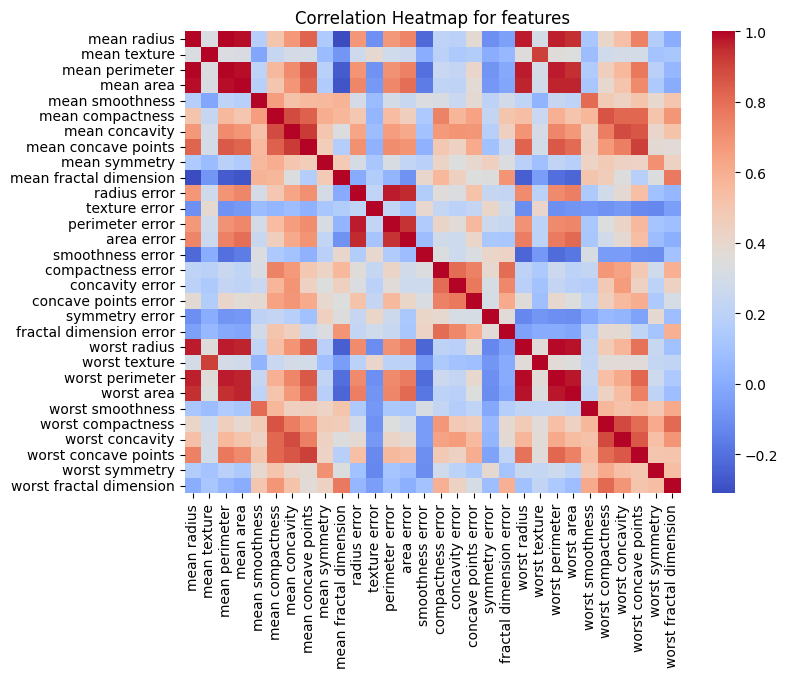

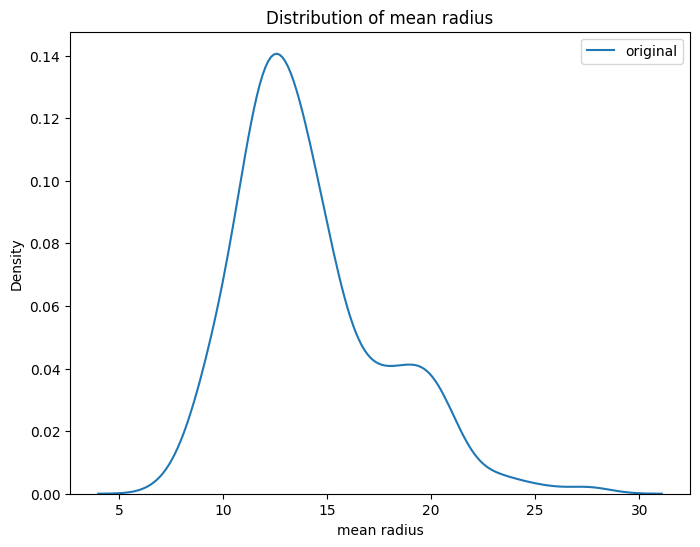

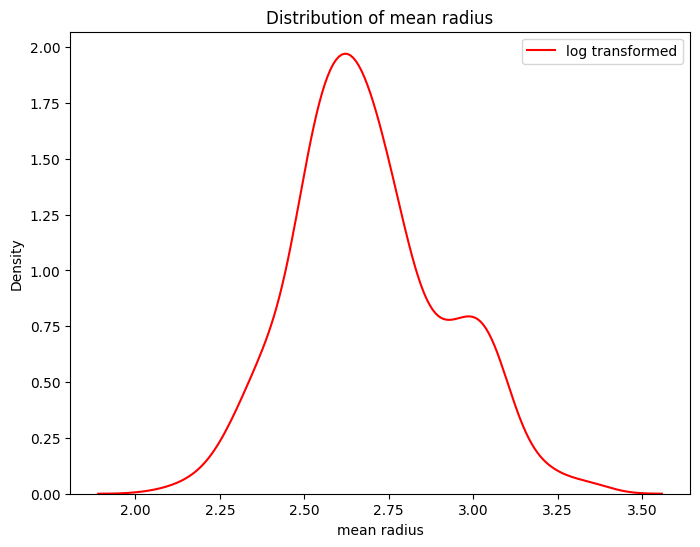

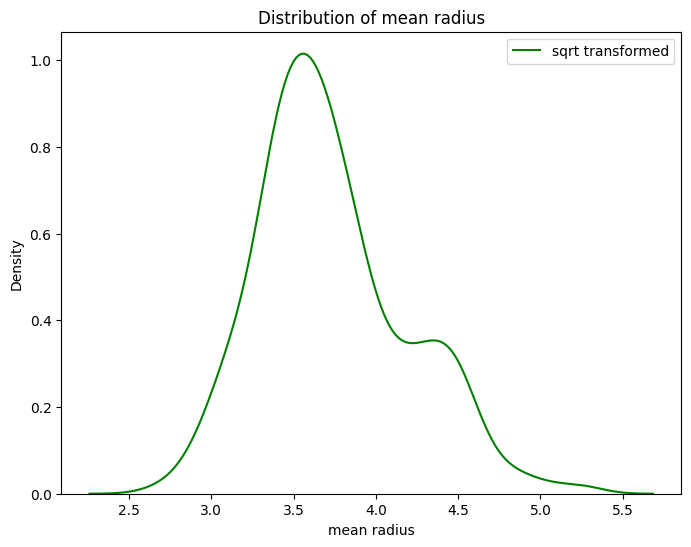

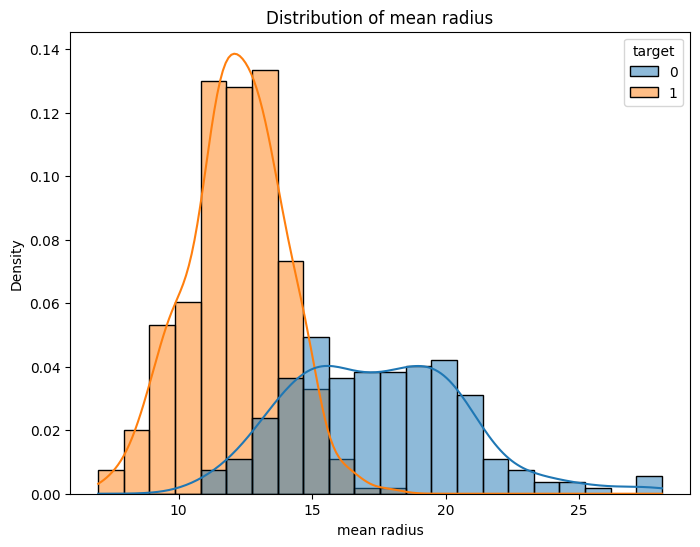

overlapping area for mean radius:0.8555566644658162


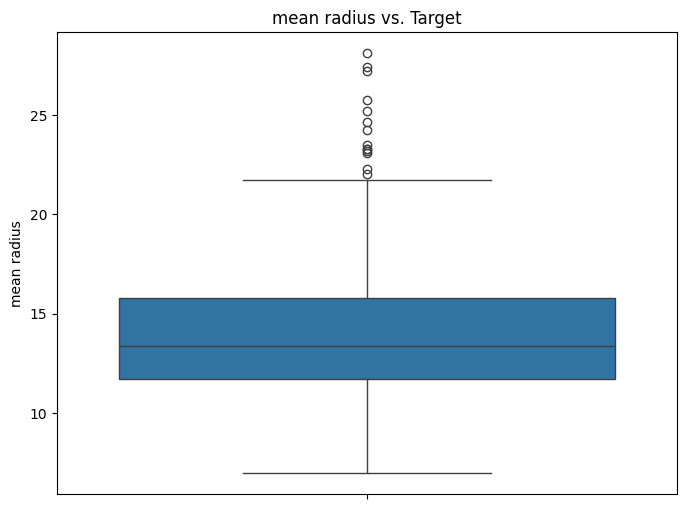

lowestCount of outliers (log-tranformed): 7


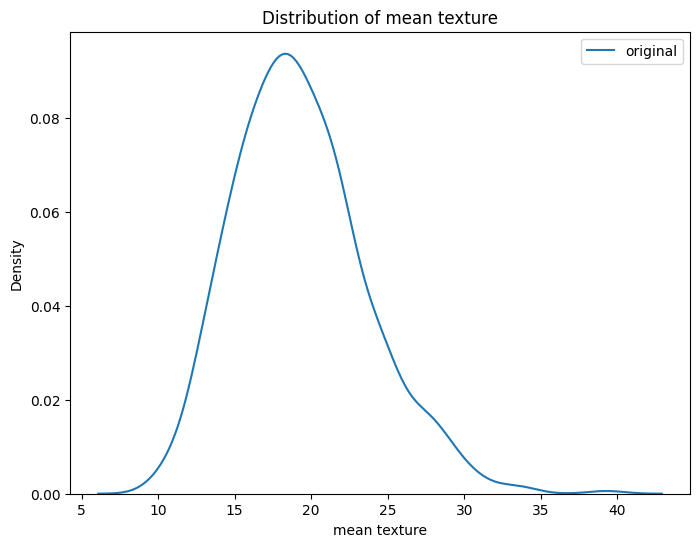

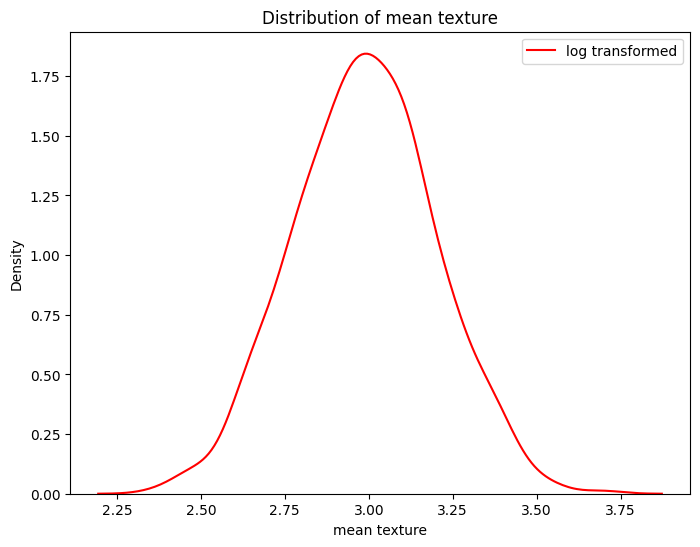

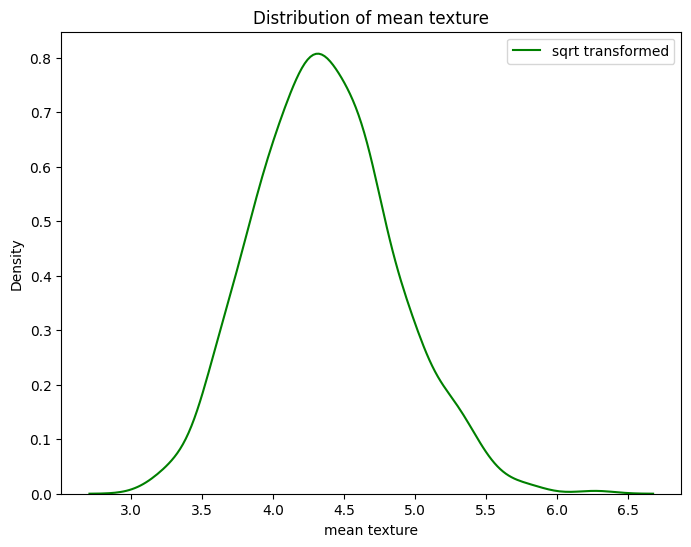

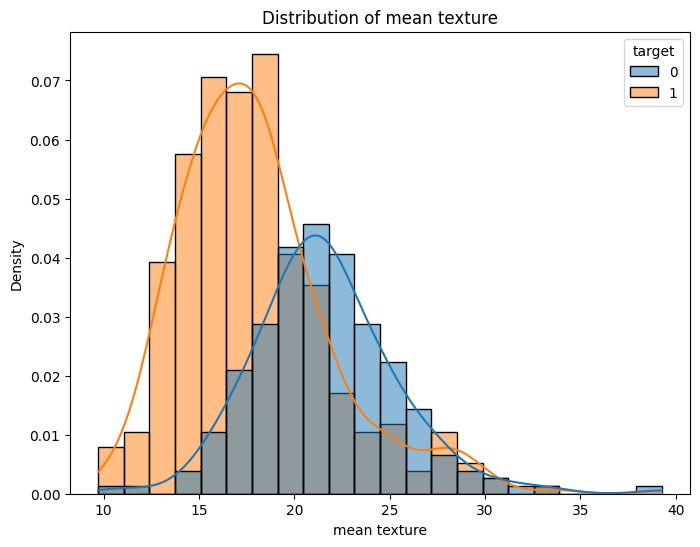

overlapping area for mean texture:0.8531966611117949


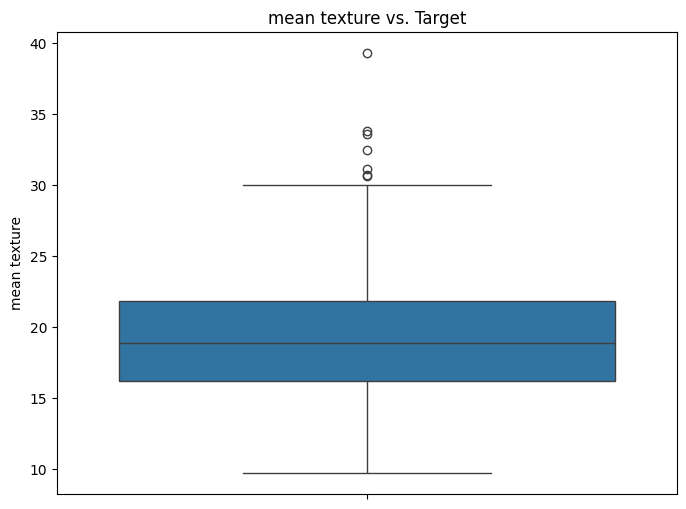

lowestCount of outliers (log-tranformed): 2


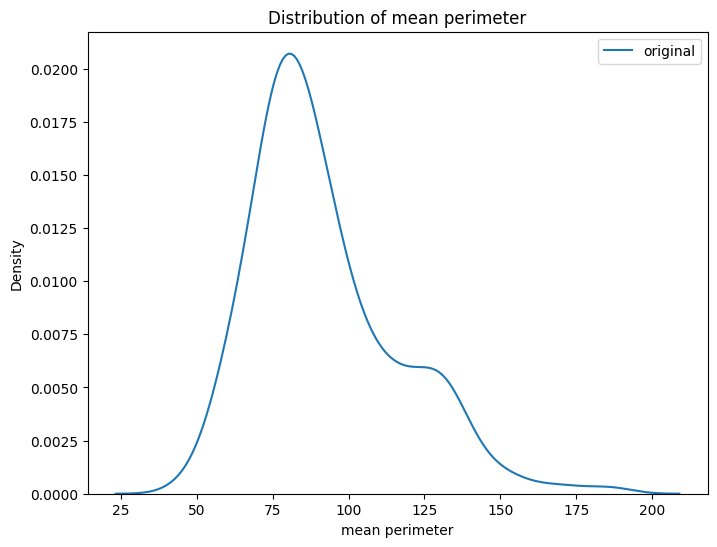

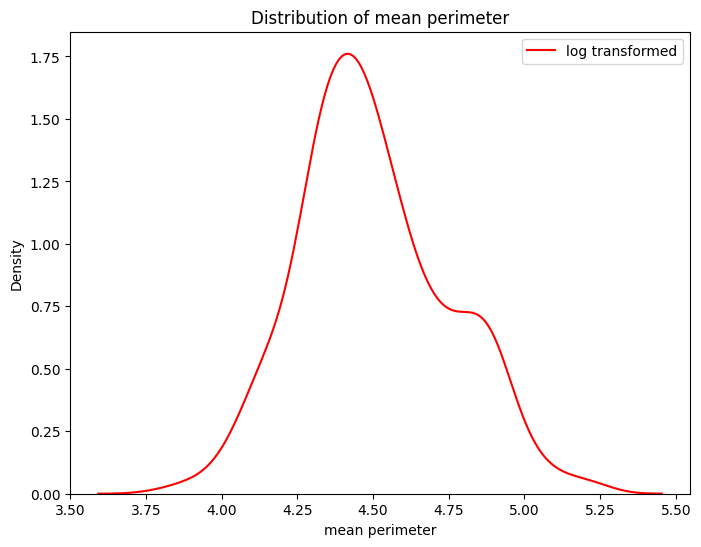

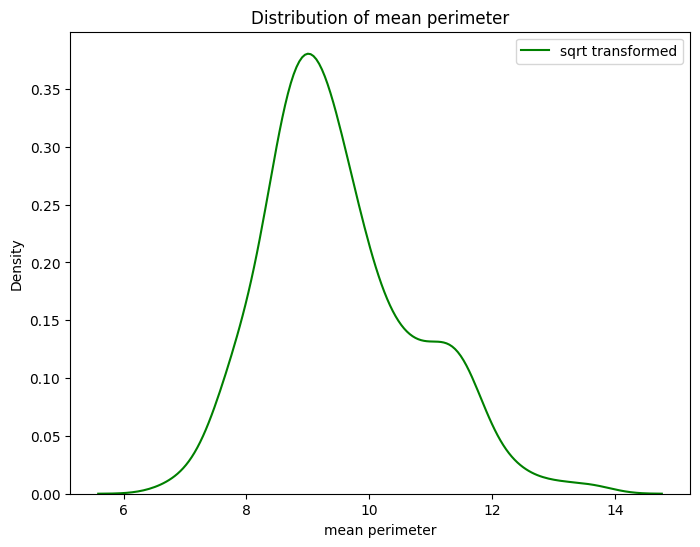

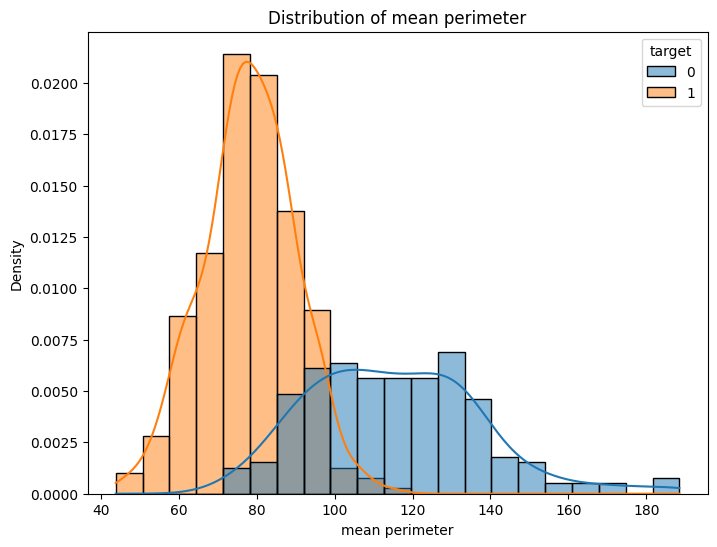

overlapping area for mean perimeter:0.8385927869721003


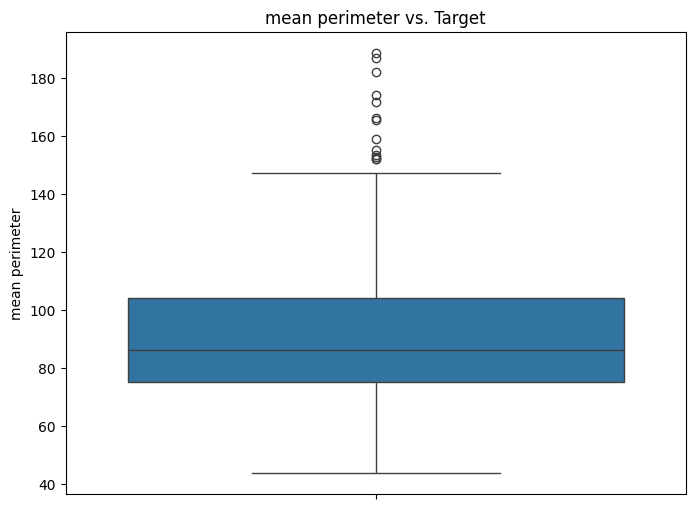

lowestCount of outliers (log-tranformed): 6


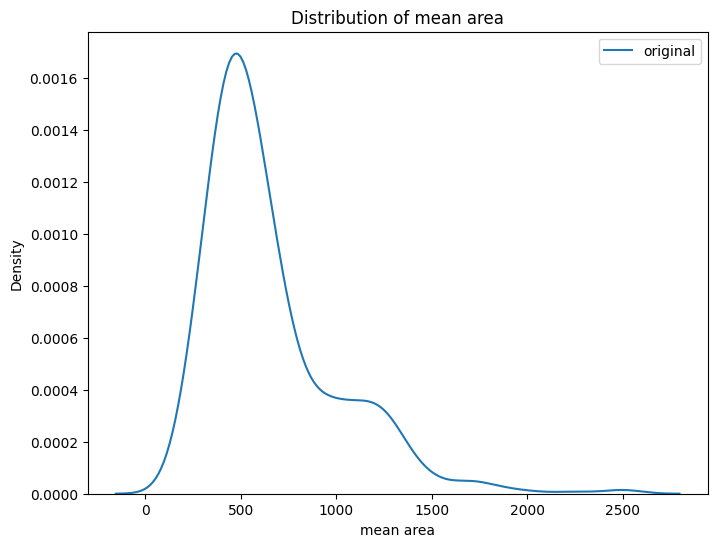

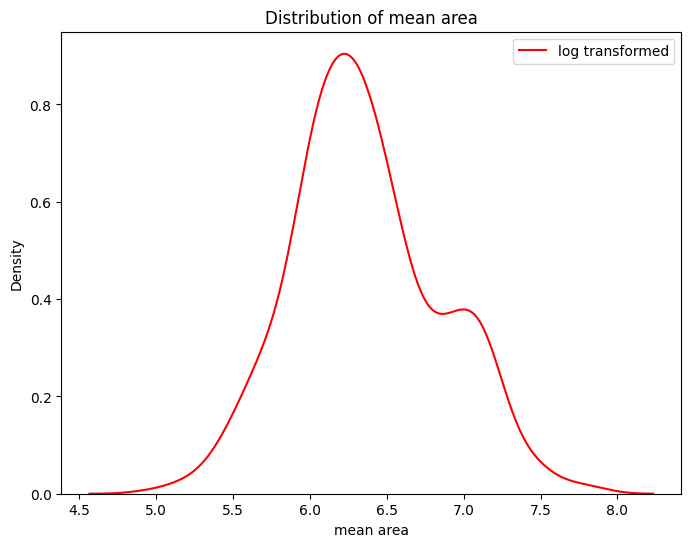

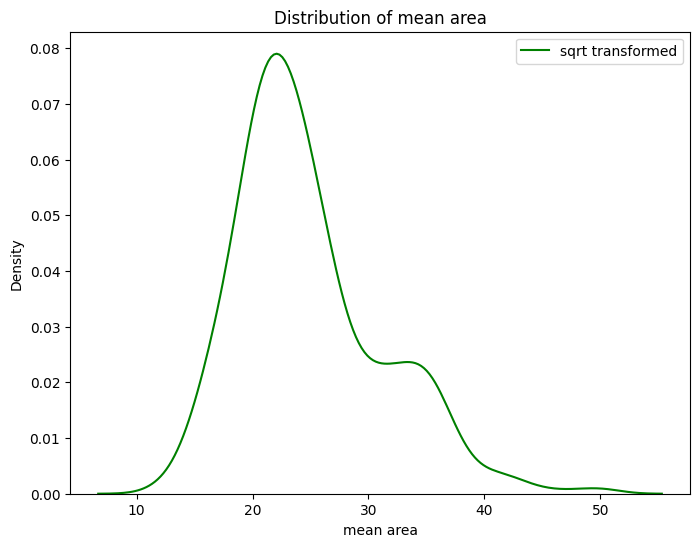

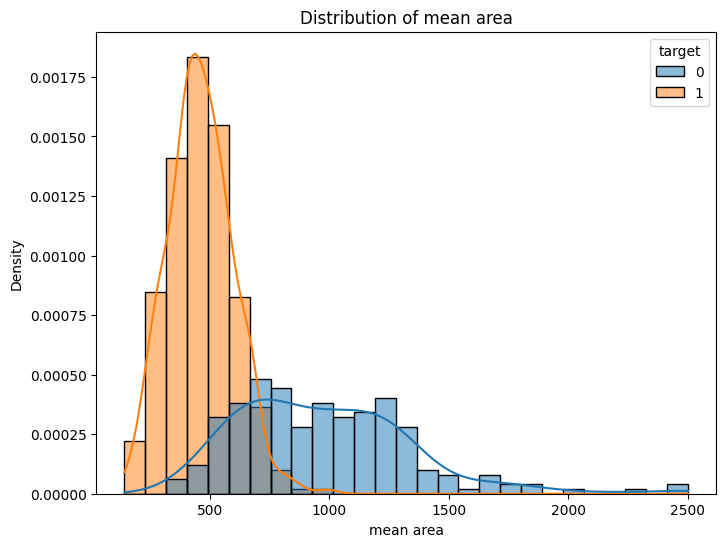

overlapping area for mean area:0.9477599986138828


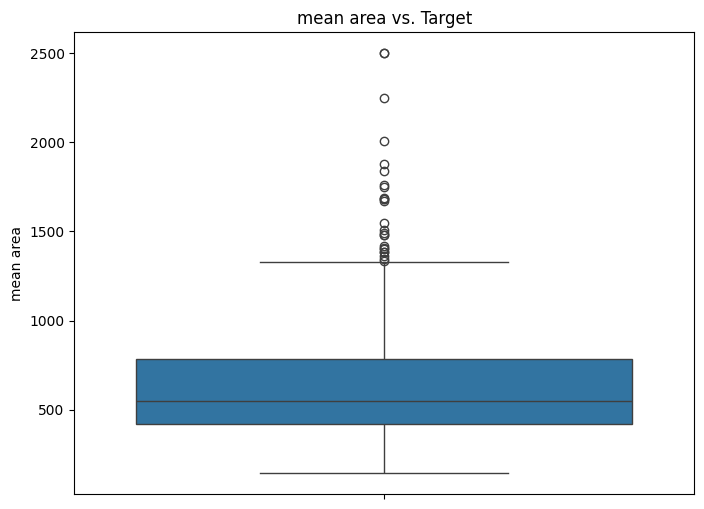

lowestCount of outliers (log-tranformed): 5


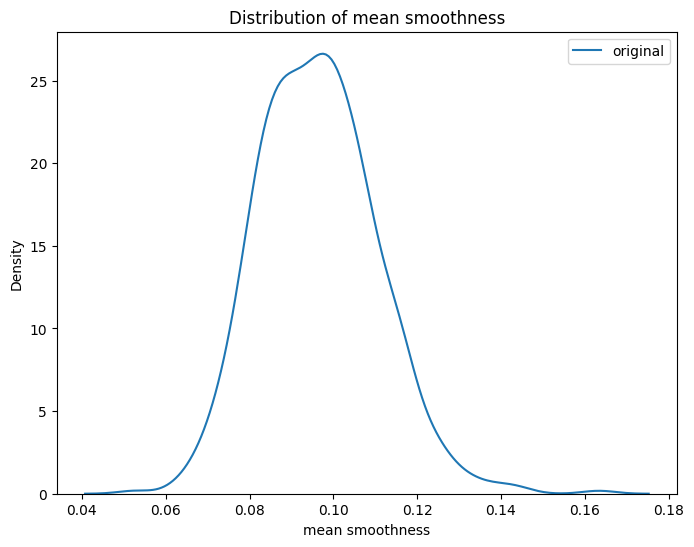

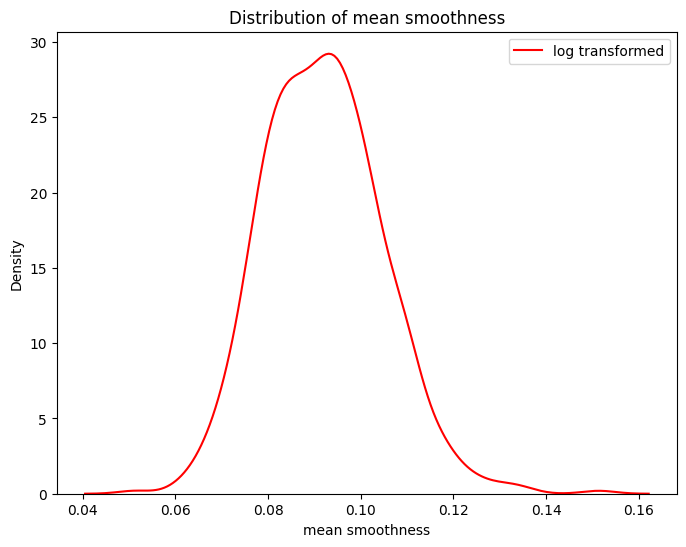

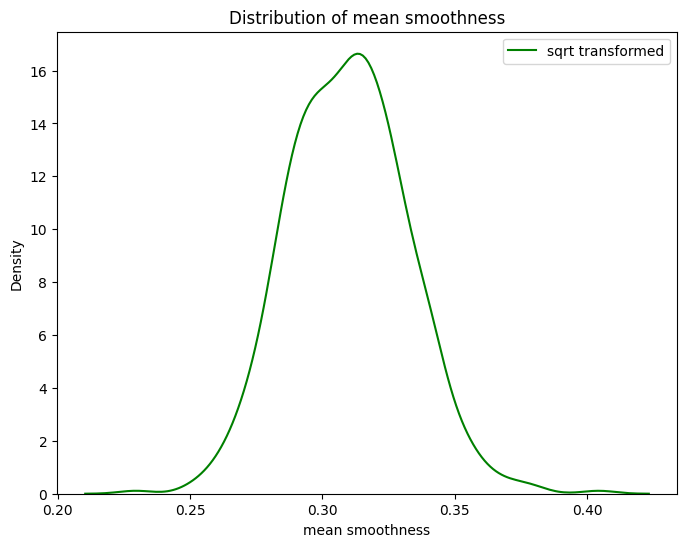

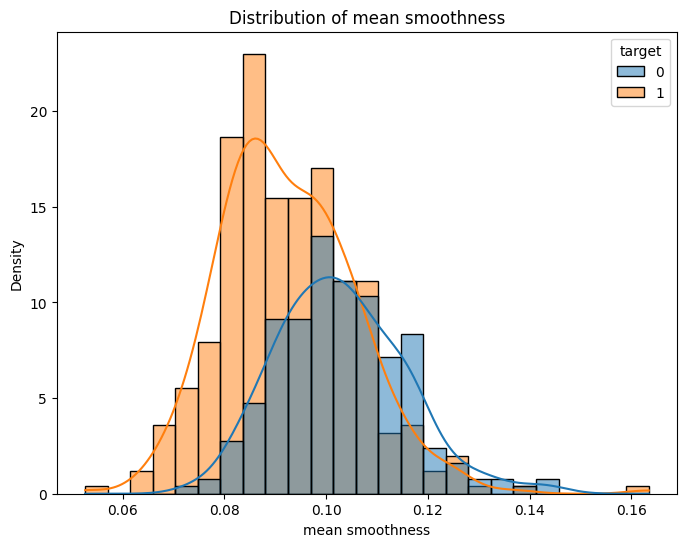

overlapping area for mean smoothness:0.6191992821322804


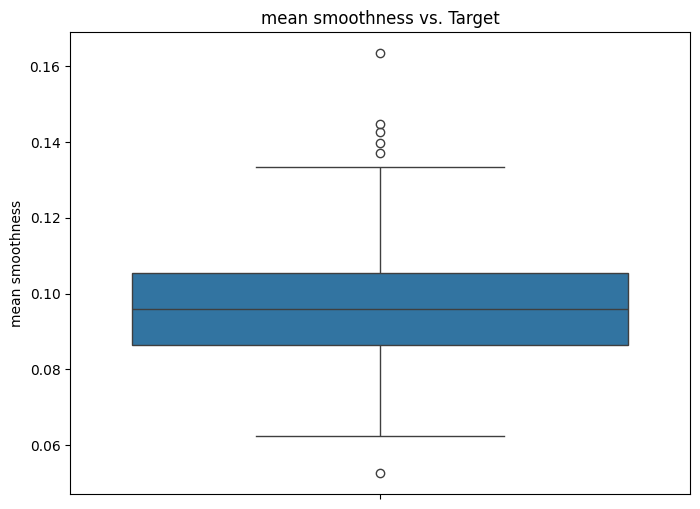

Count of outliers (sqrt-tranformed): 5


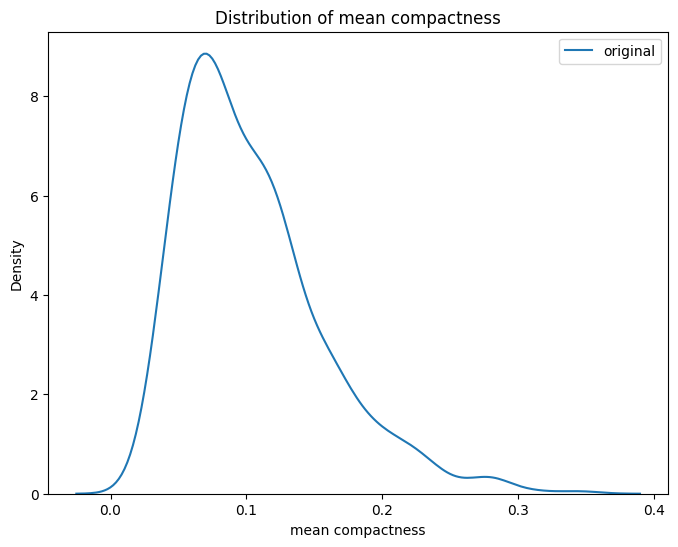

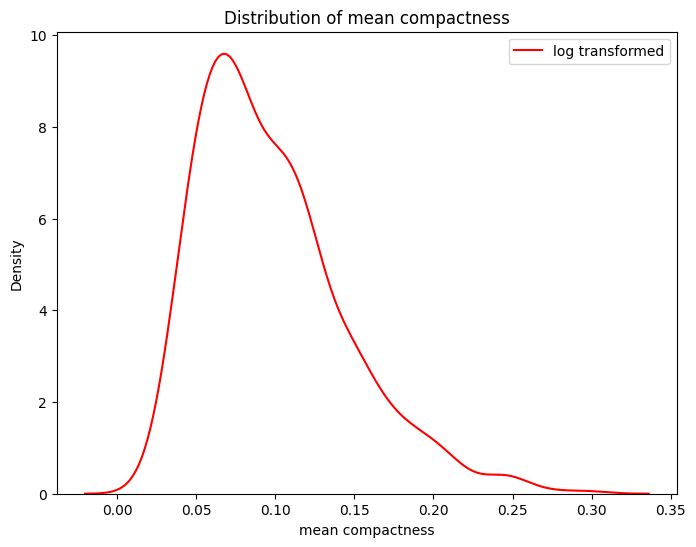

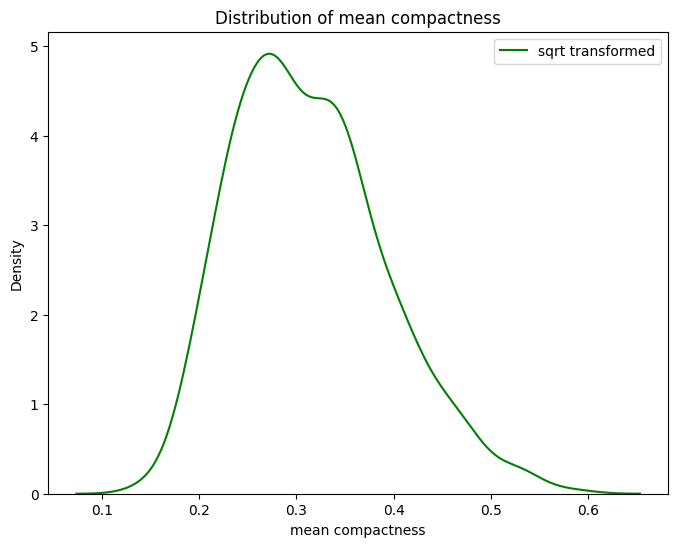

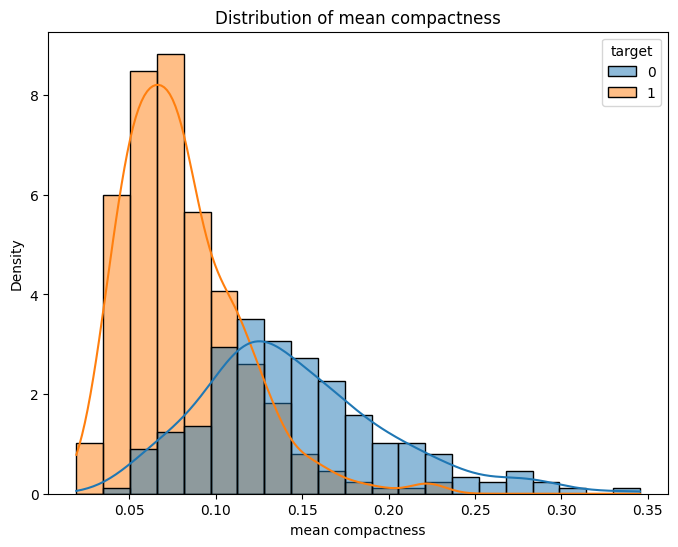

overlapping area for mean compactness:0.9453839527094616


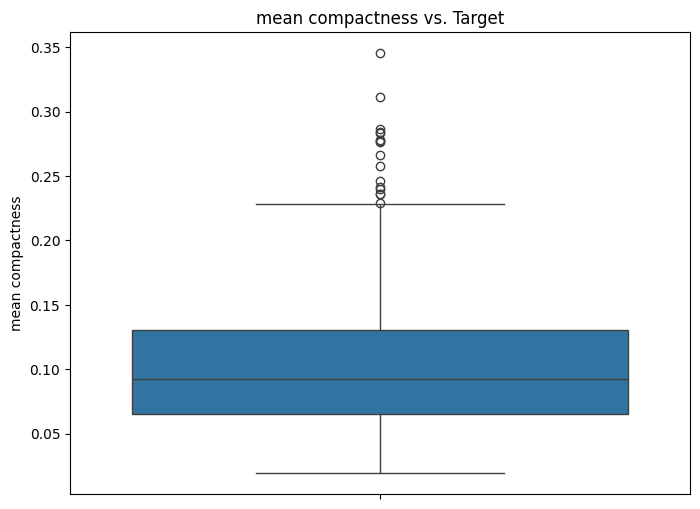

Count of outliers (sqrt-tranformed): 8


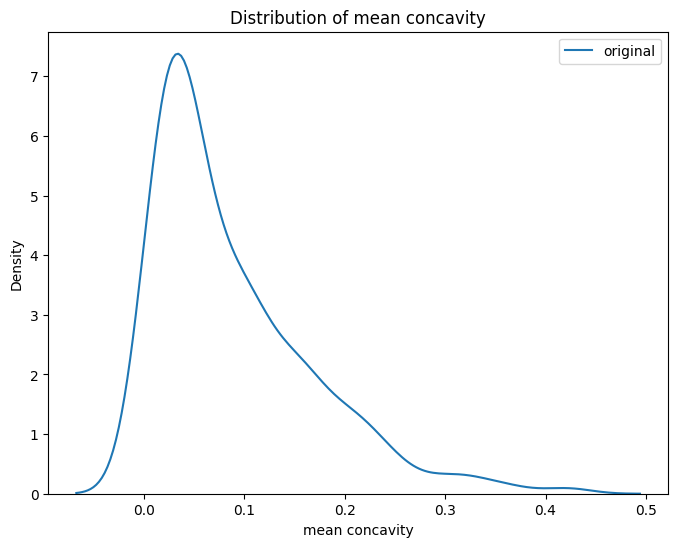

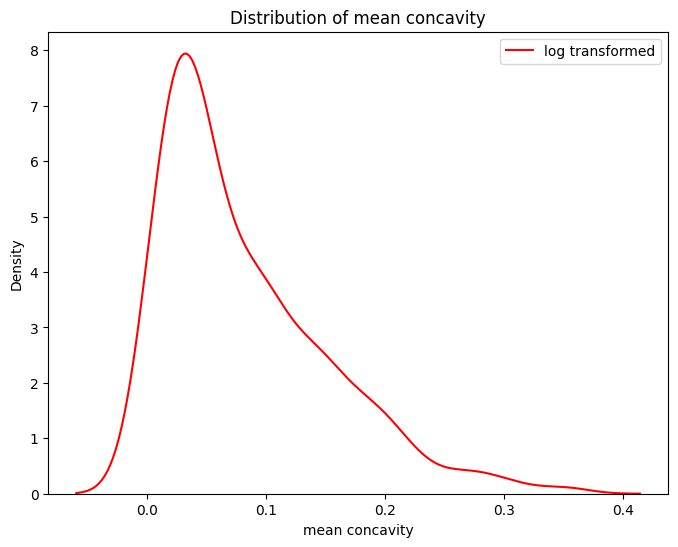

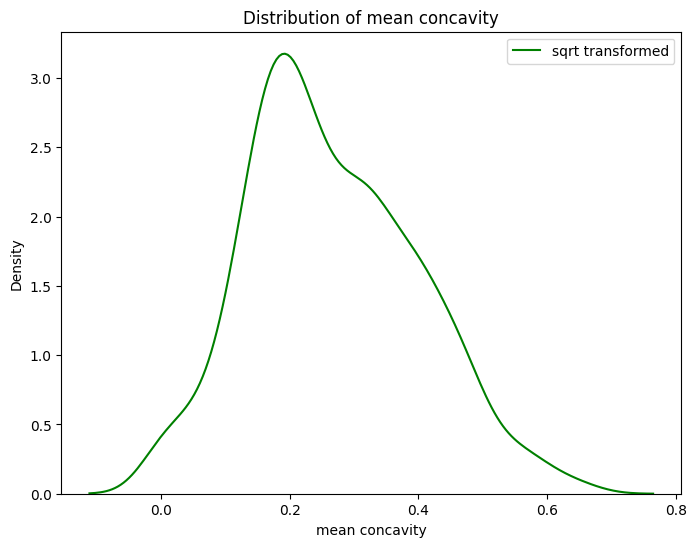

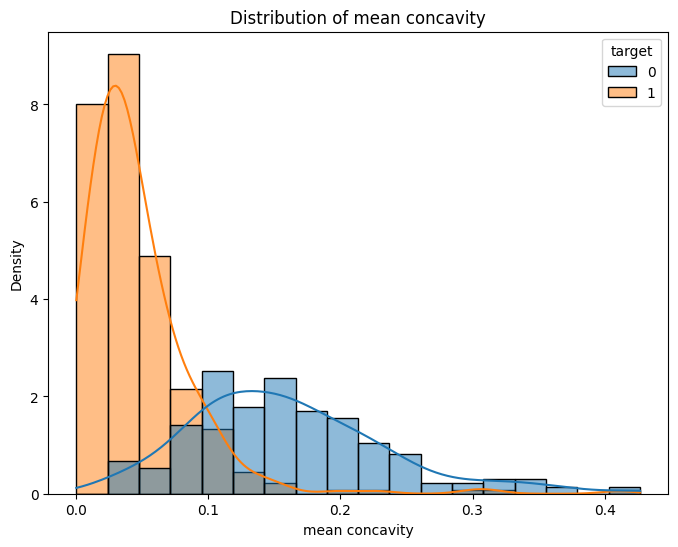

overlapping area for mean concavity:0.35611162581547107


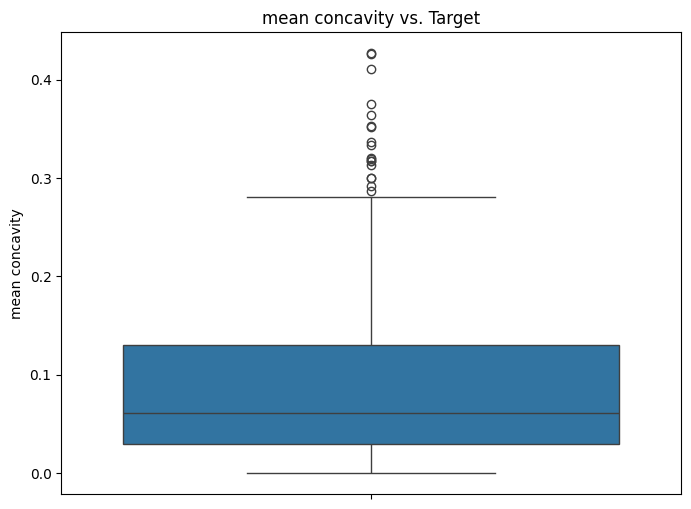

Count of outliers (sqrt-tranformed): 2


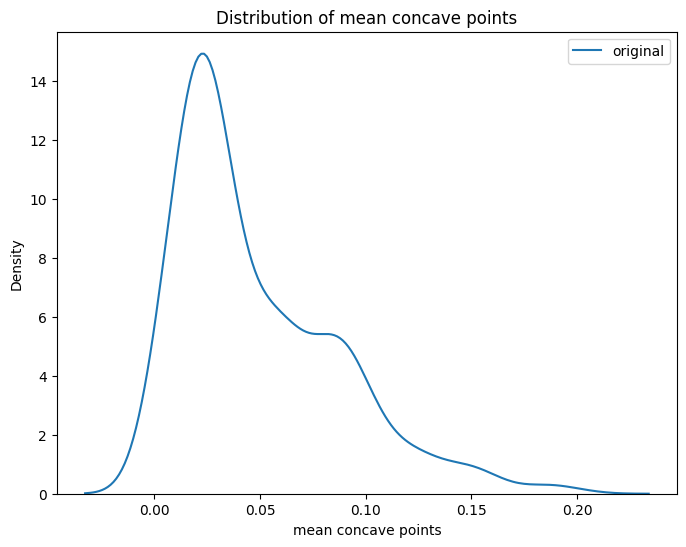

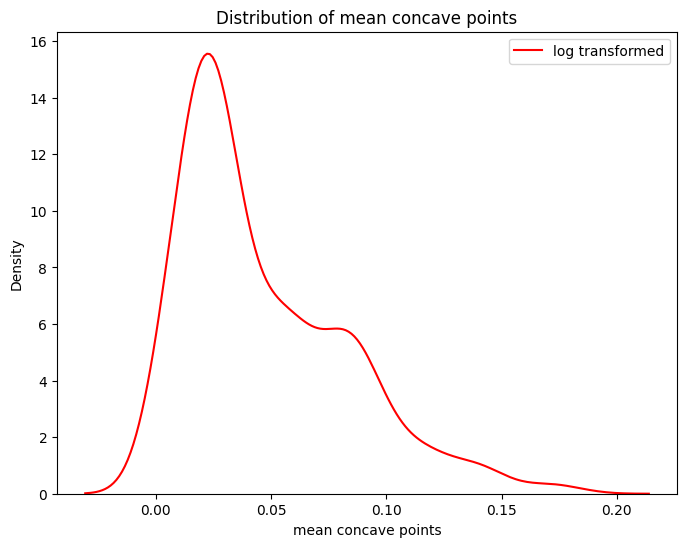

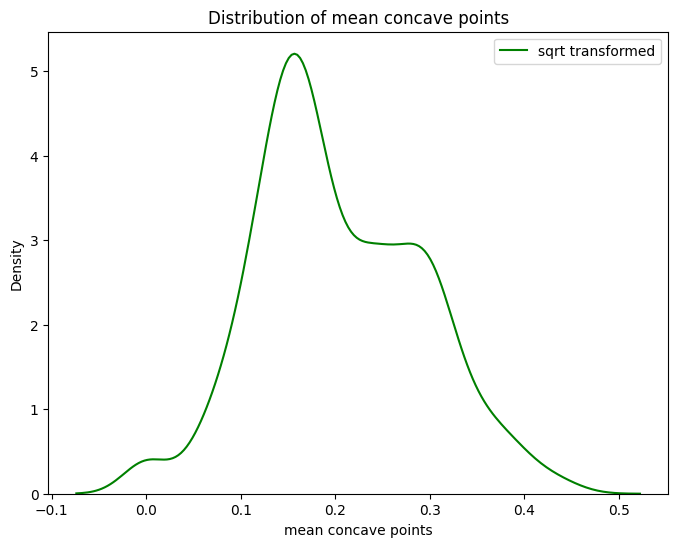

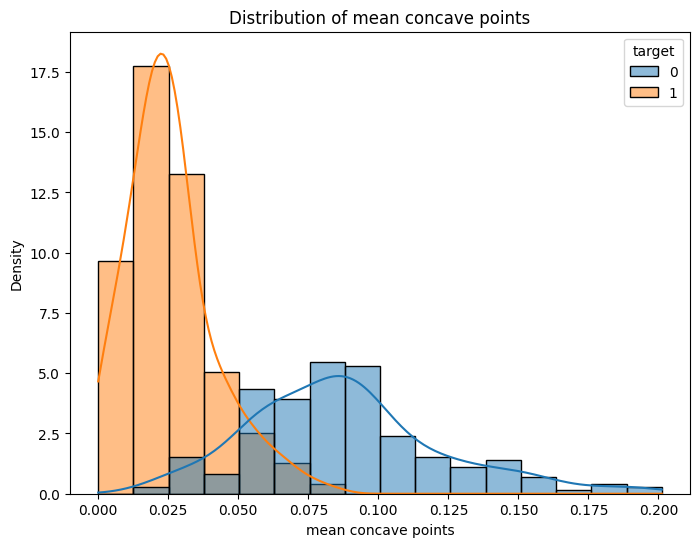

overlapping area for mean concave points:0.9789518931149185


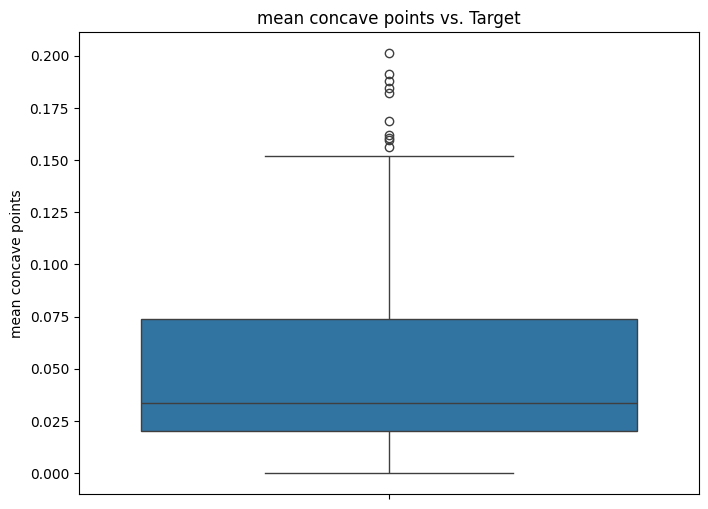

Count of outliers (sqrt-tranformed): 0


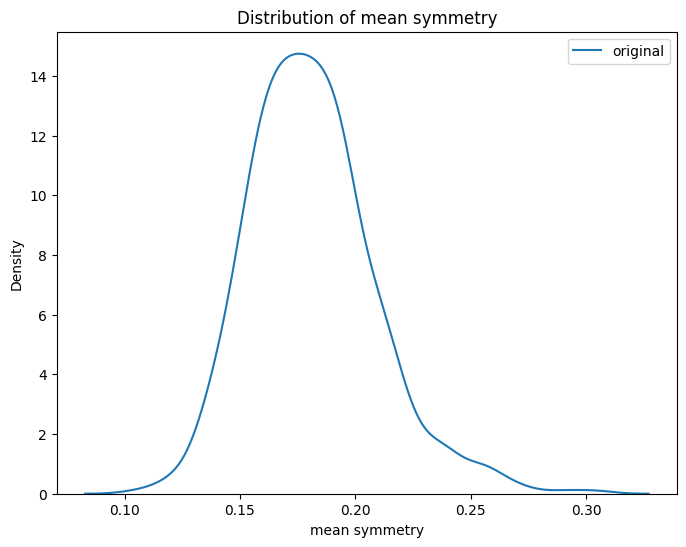

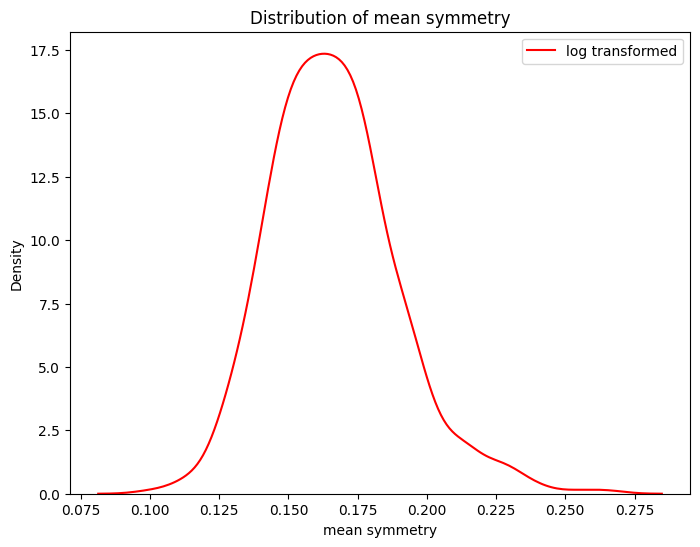

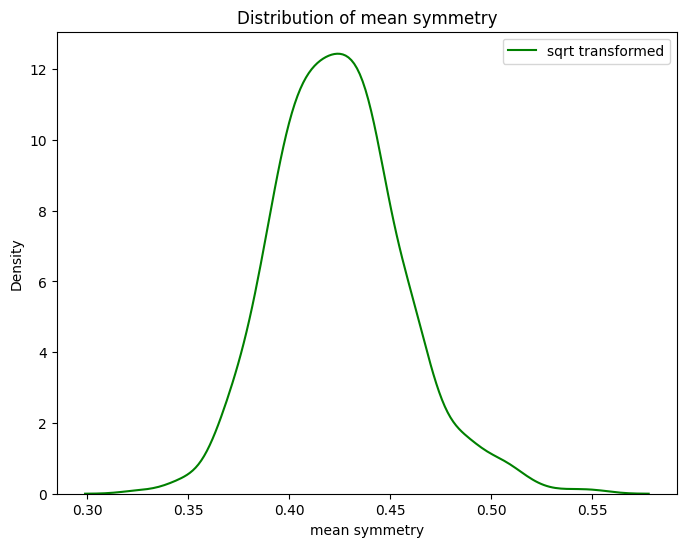

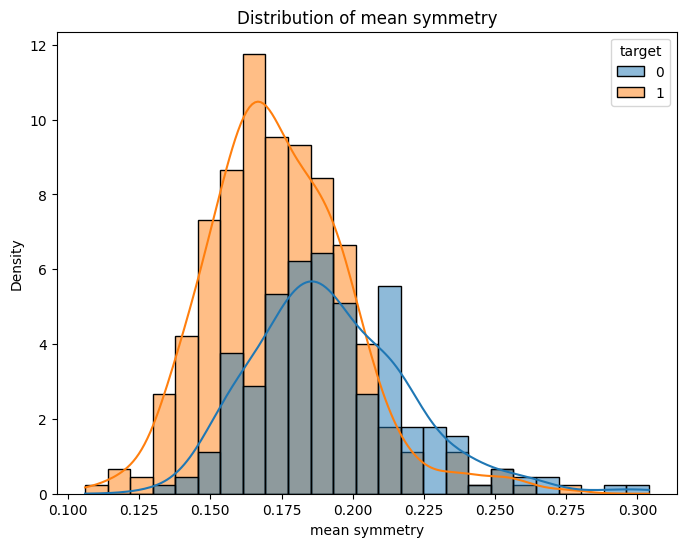

overlapping area for mean symmetry:0.8136893138851744


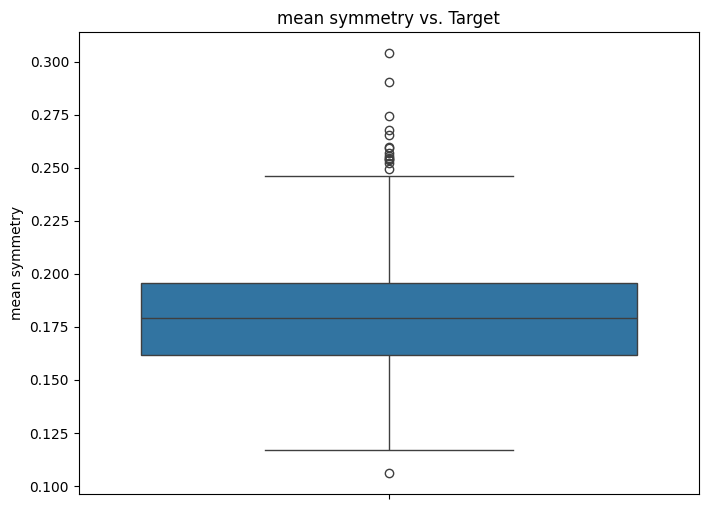

Count of outliers (sqrt-tranformed): 14


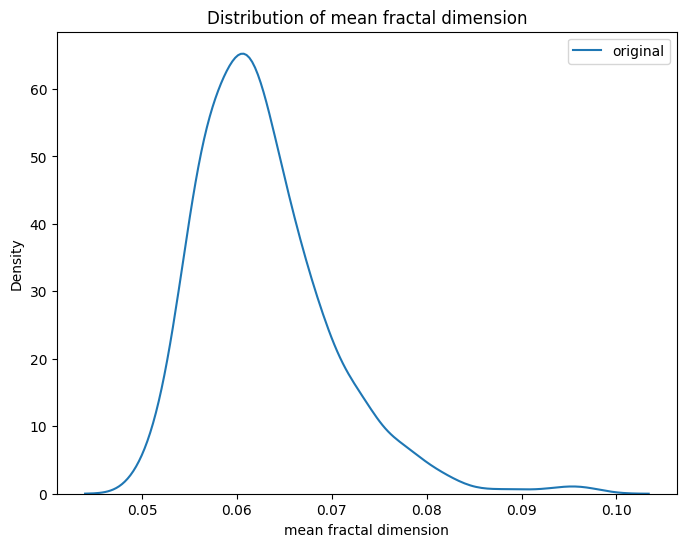

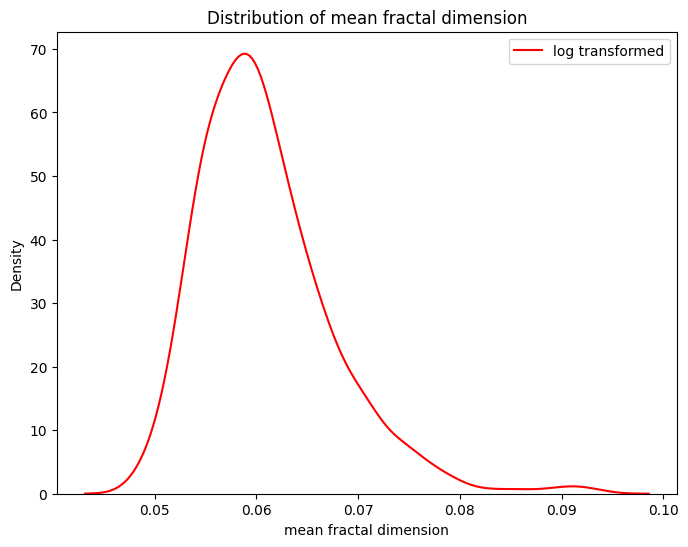

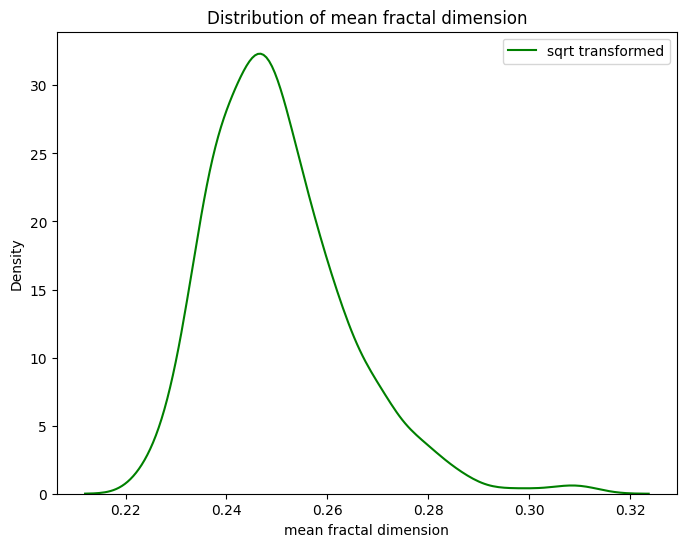

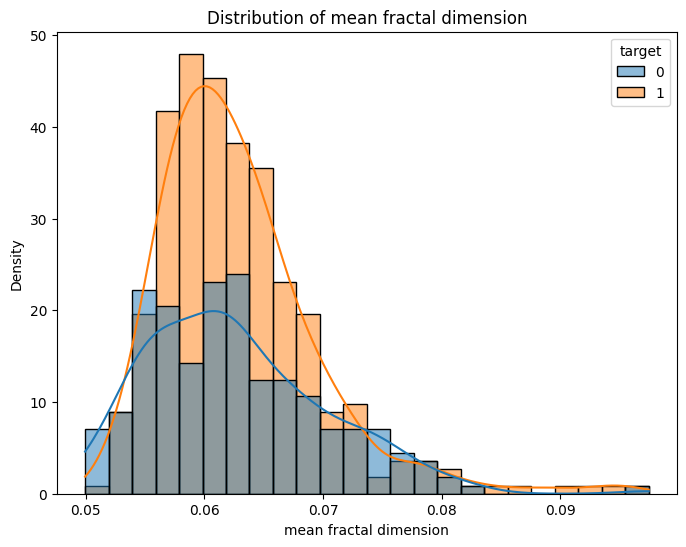

overlapping area for mean fractal dimension:0.8900820387466458


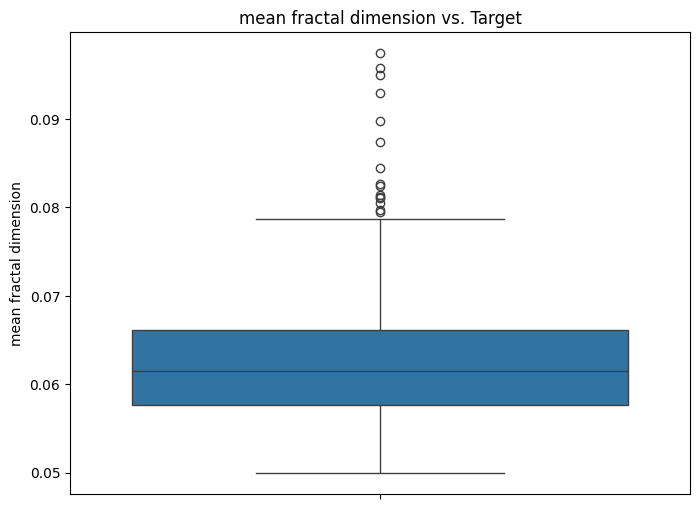

Count of outliers (sqrt-tranformed): 13


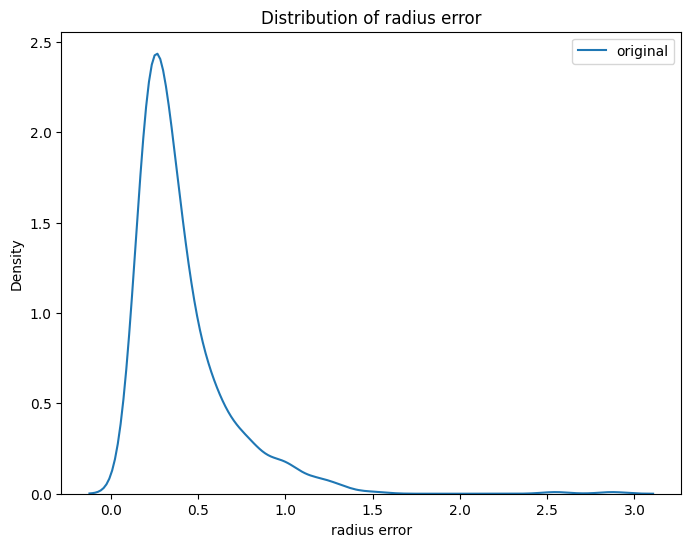

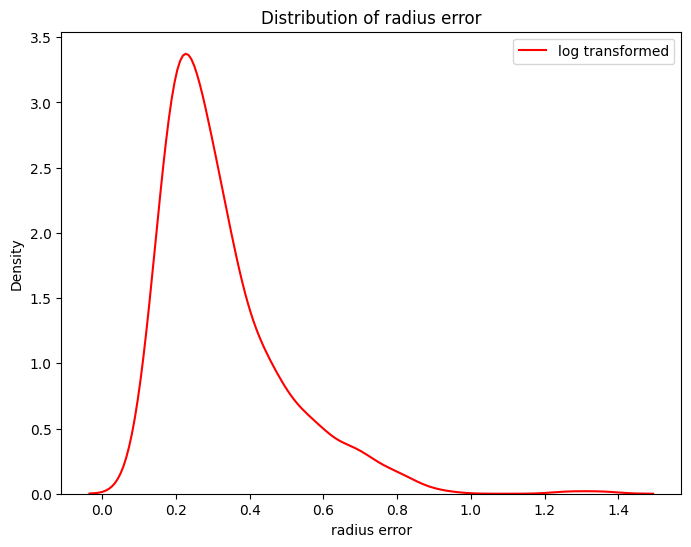

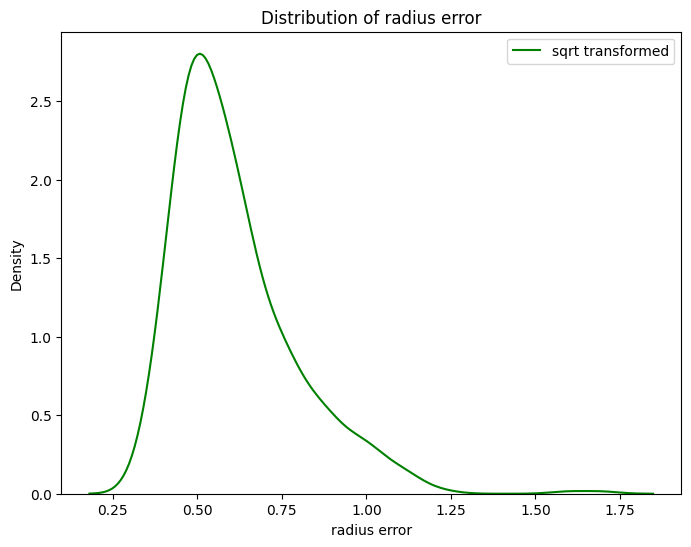

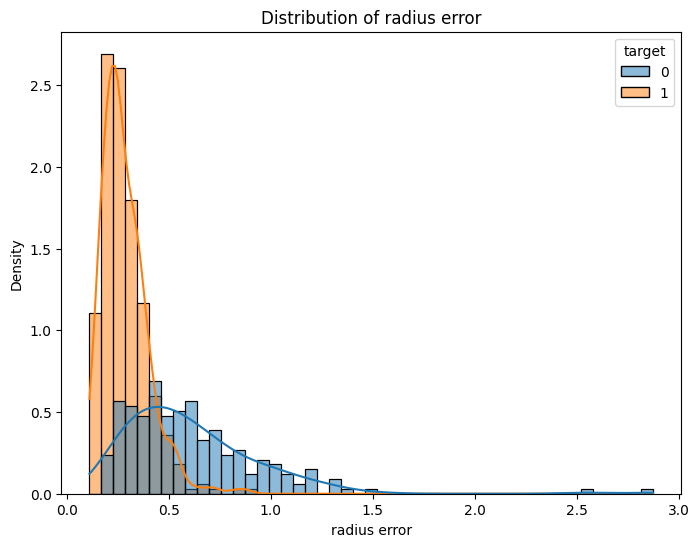

overlapping area for radius error:0.9952830188679246


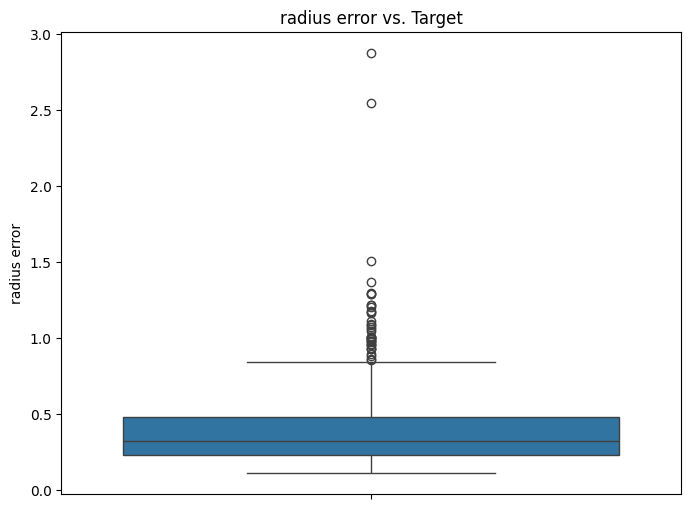

Count of outliers (sqrt-tranformed): 19


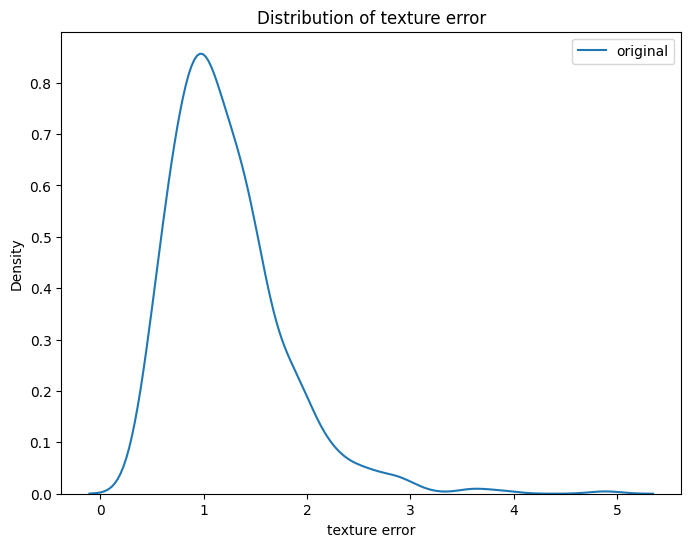

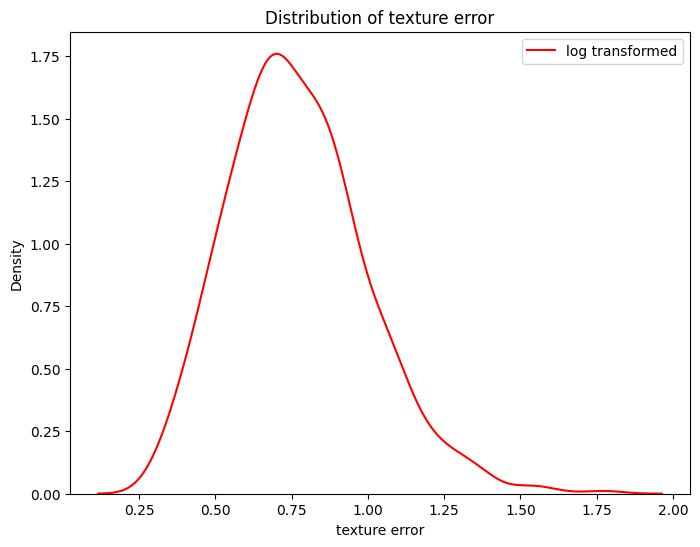

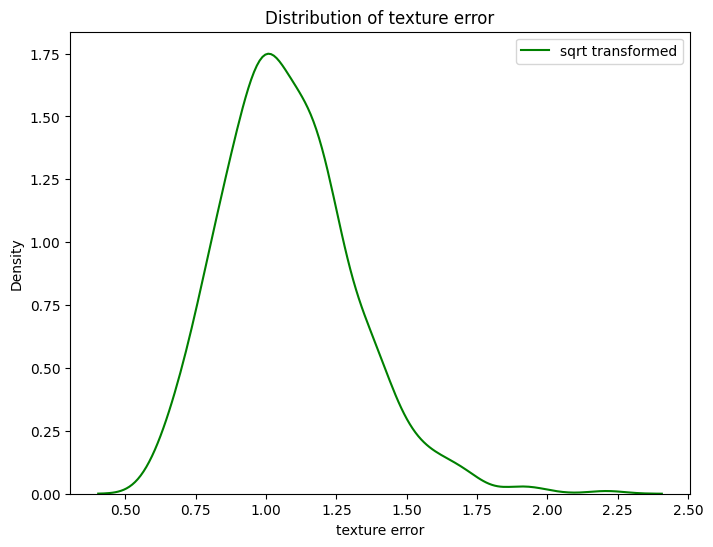

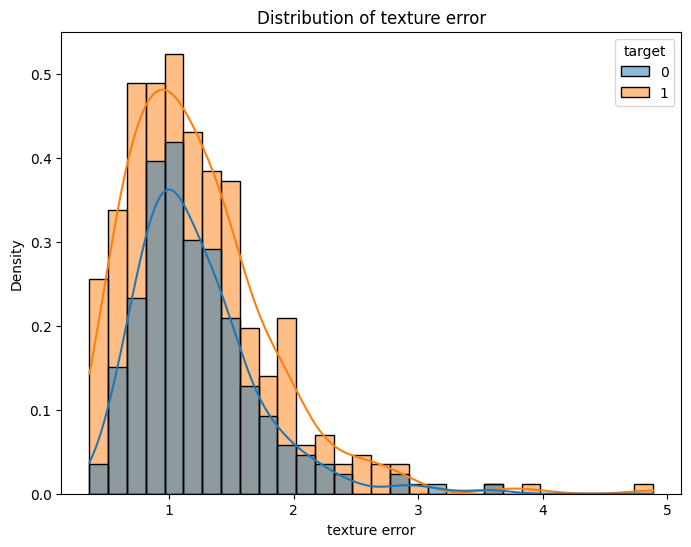

overlapping area for texture error:0.6024911003538349


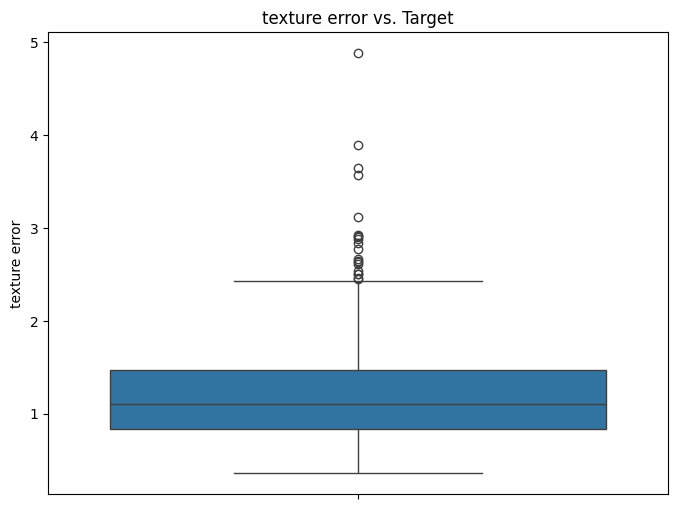

lowestCount of outliers (log-tranformed): 9


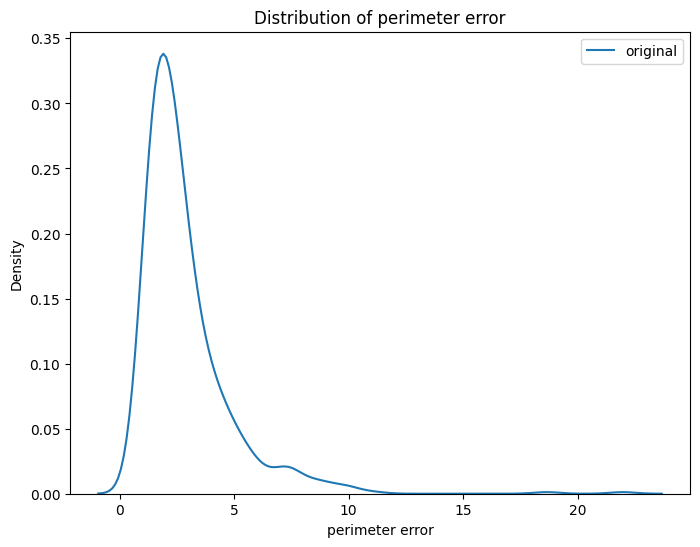

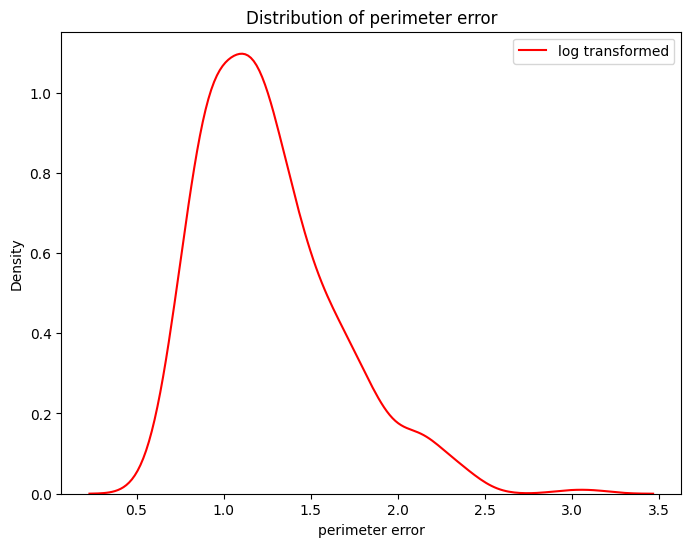

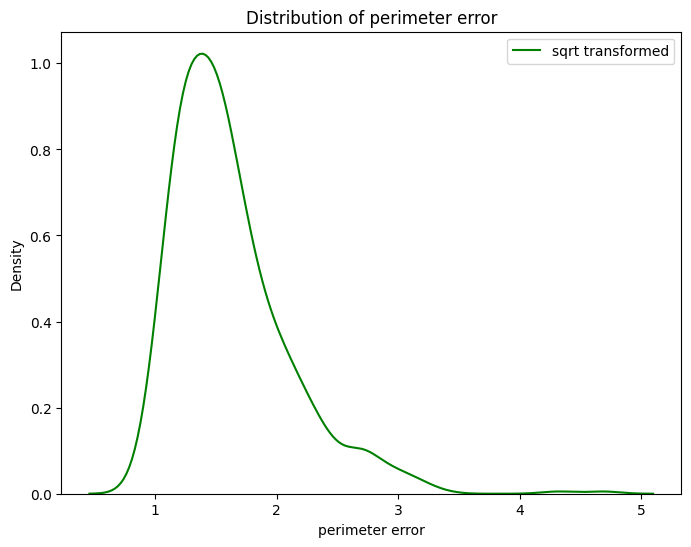

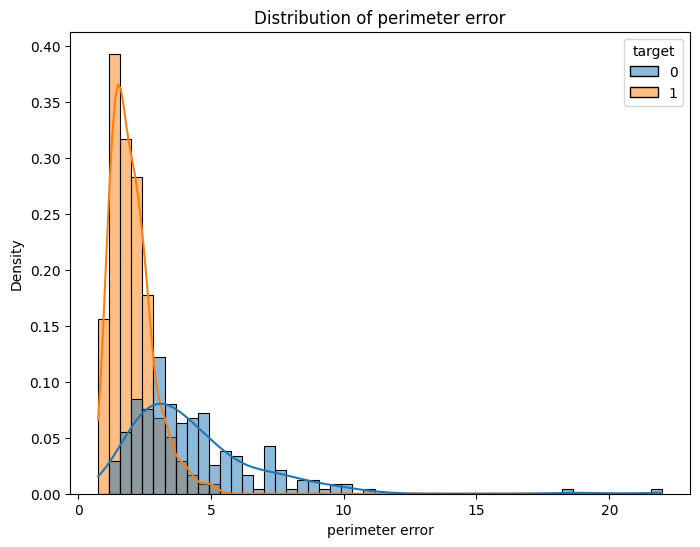

overlapping area for perimeter error:0.9277338028703108


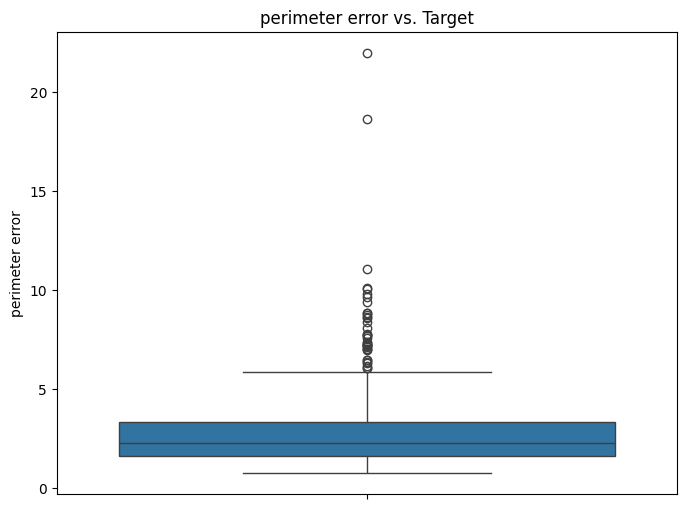

lowestCount of outliers (log-tranformed): 13


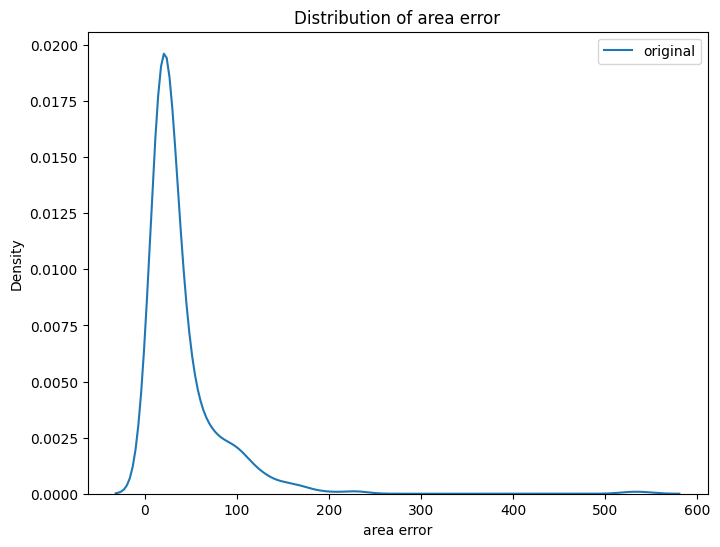

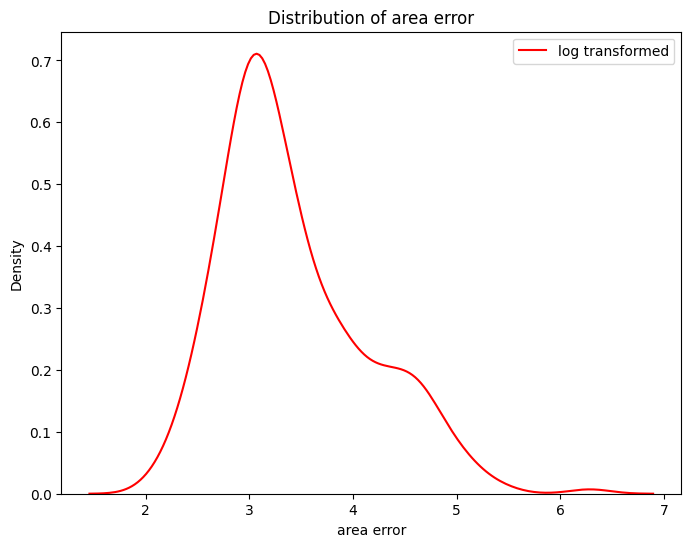

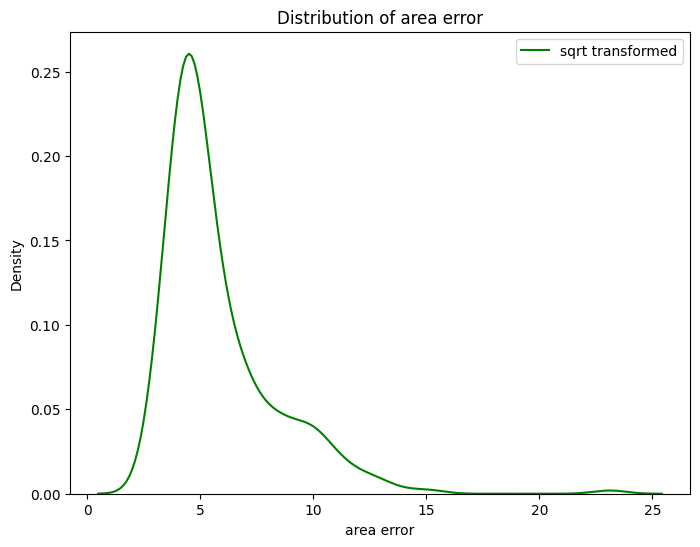

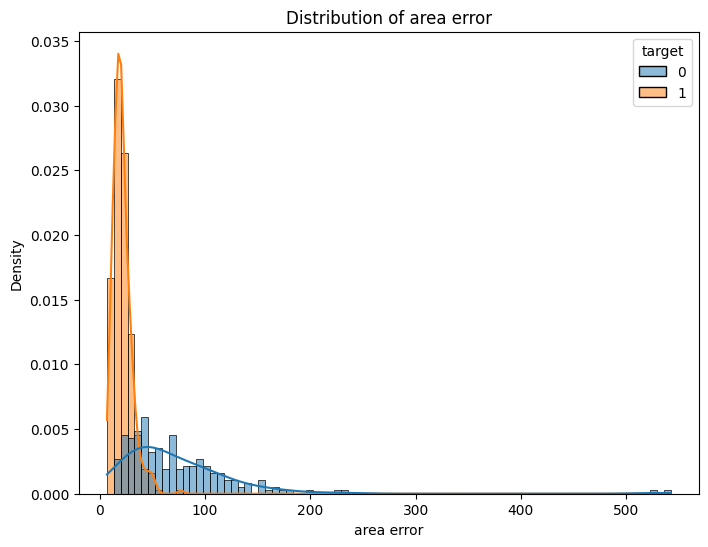

overlapping area for area error:1.0


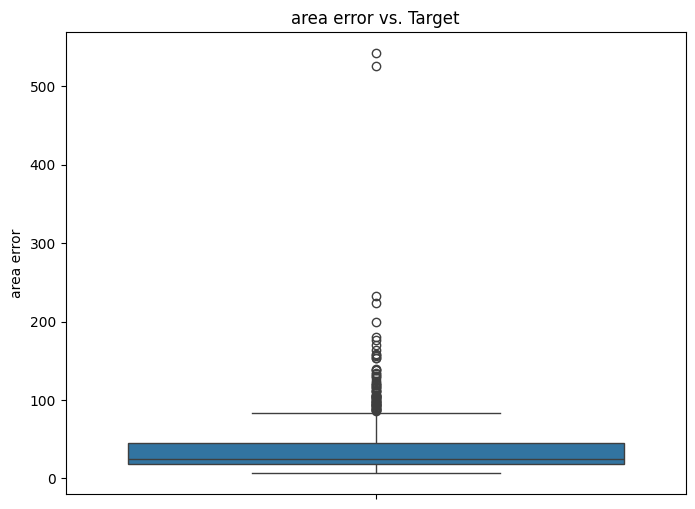

lowestCount of outliers (log-tranformed): 7


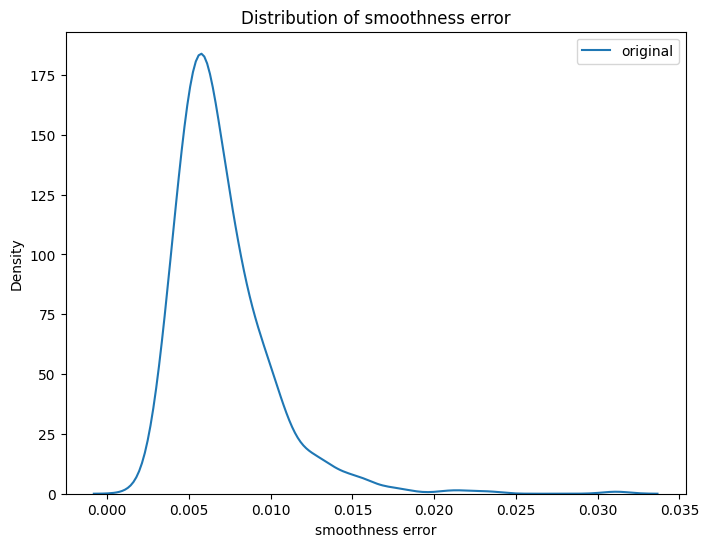

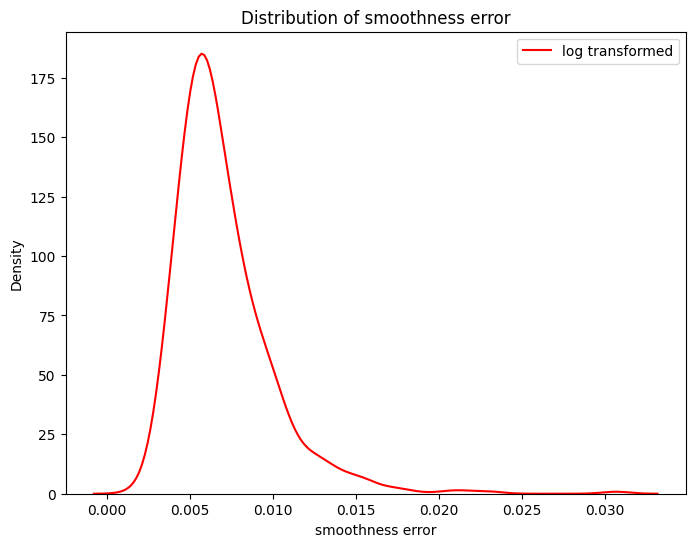

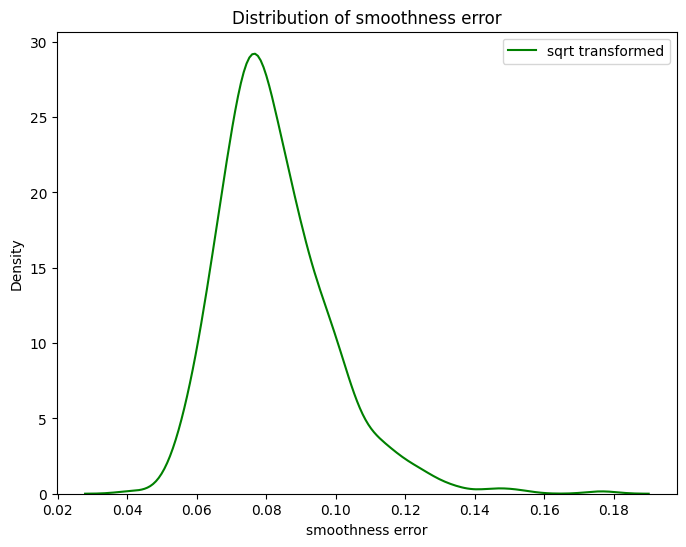

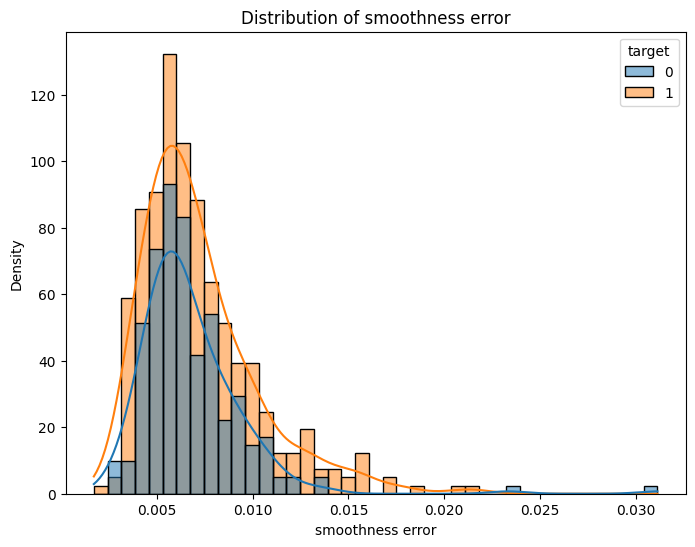

overlapping area for smoothness error:0.6074371659500934


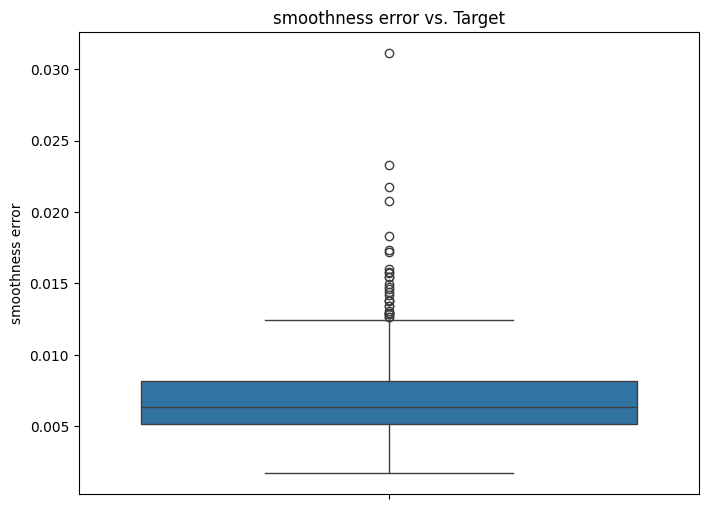

Count of outliers (sqrt-tranformed): 18


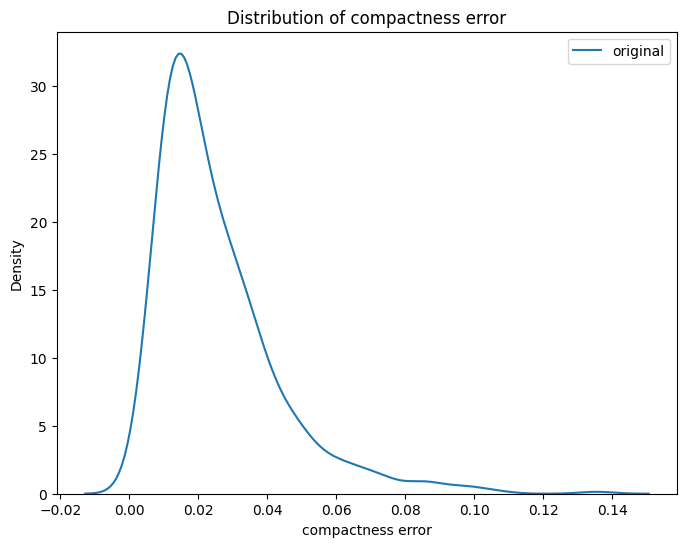

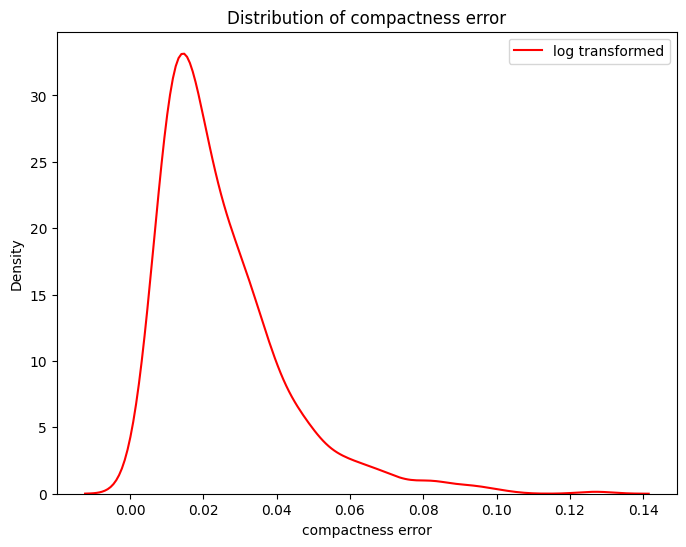

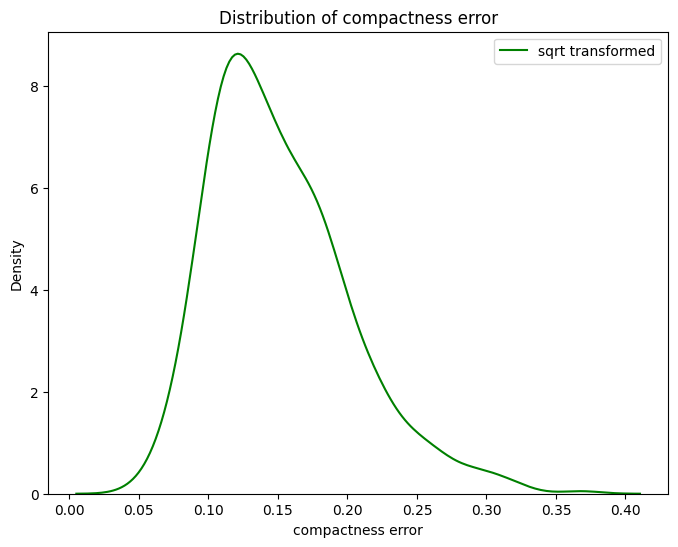

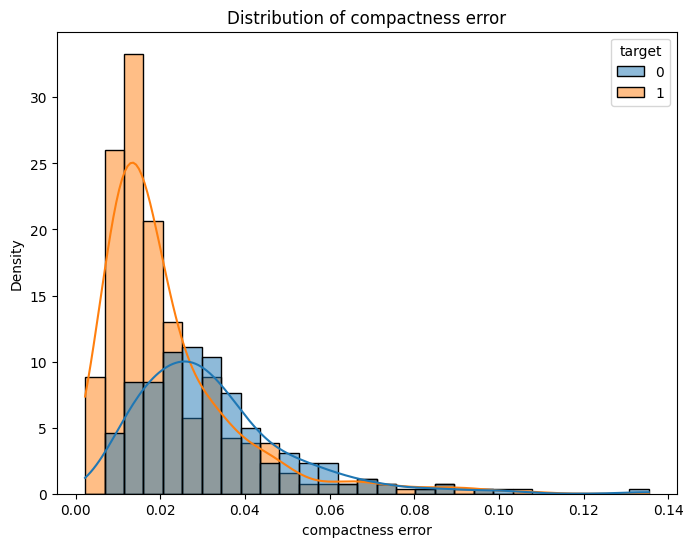

overlapping area for compactness error:0.8972895845266214


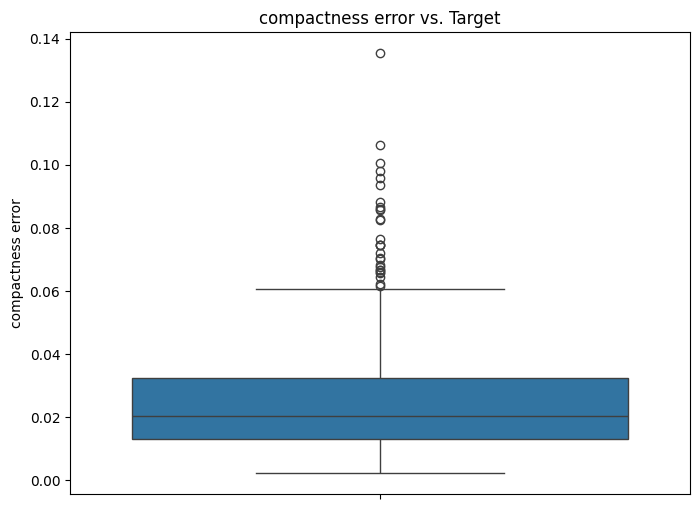

Count of outliers (sqrt-tranformed): 12


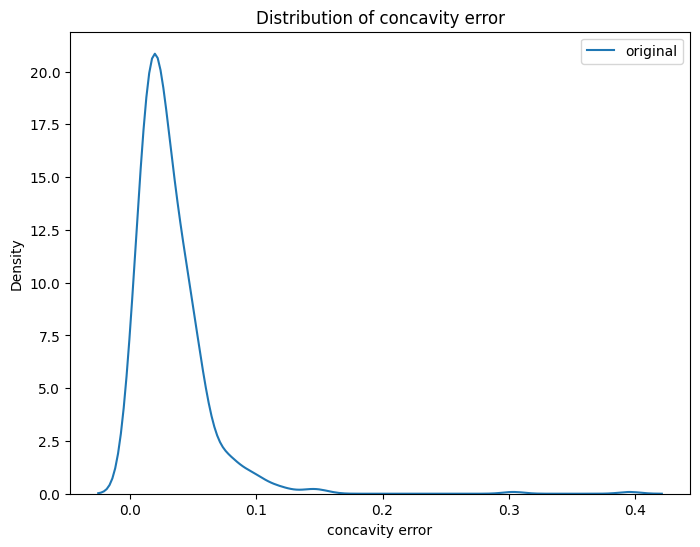

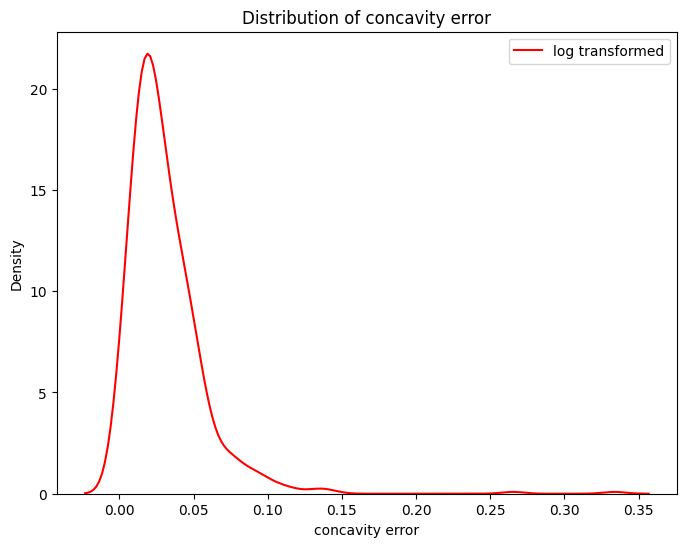

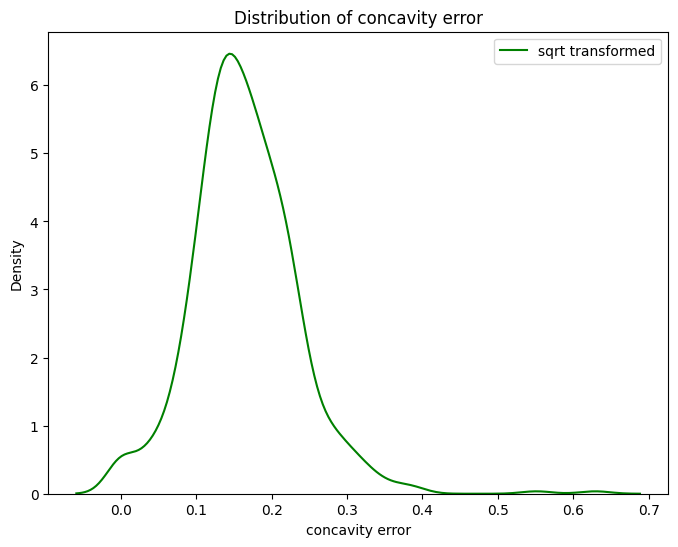

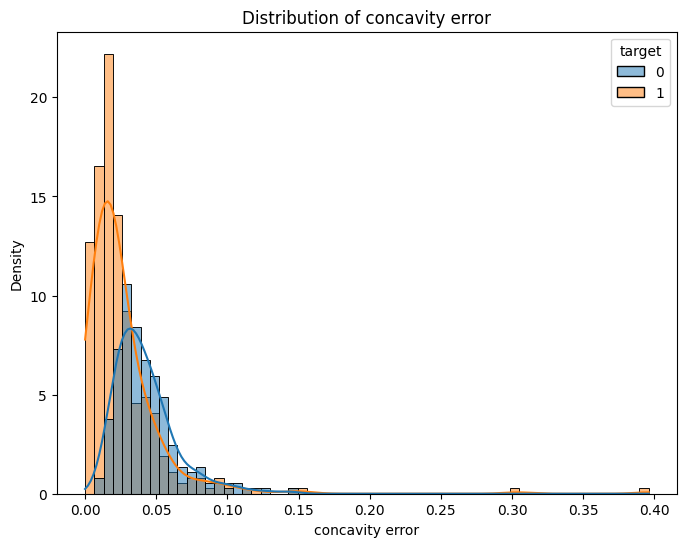

overlapping area for concavity error:0.20876954898597525


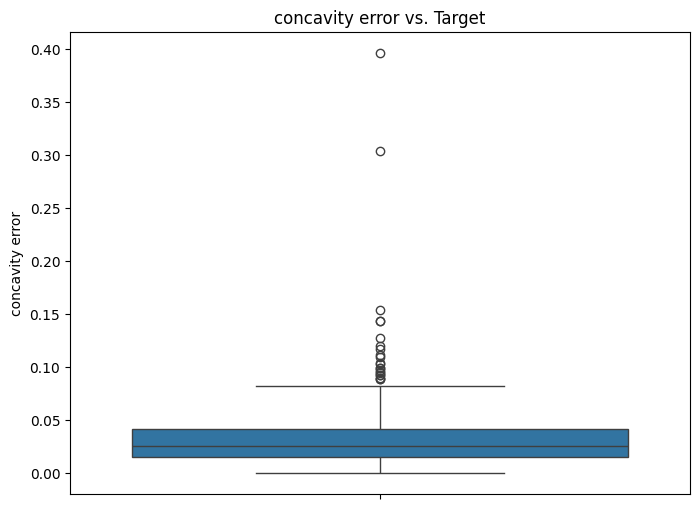

Count of outliers (sqrt-tranformed): 10


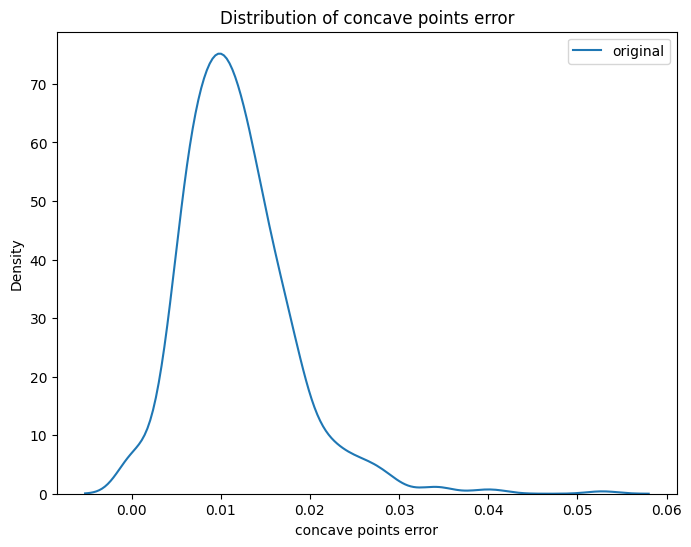

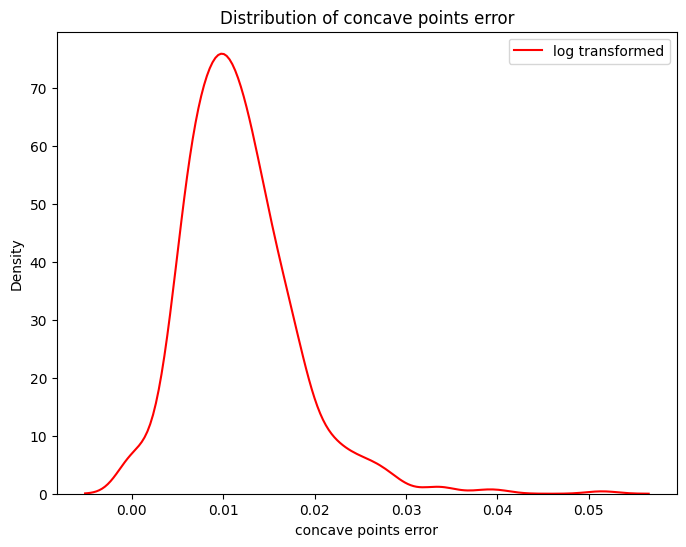

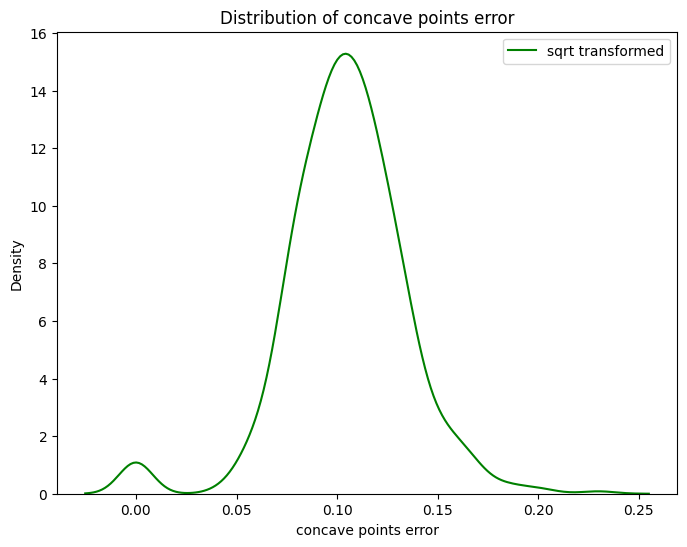

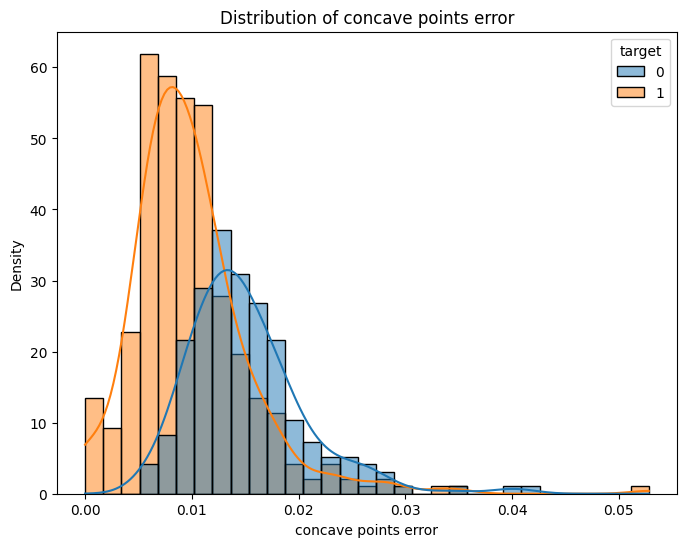

overlapping area for concave points error:0.5588177692275895


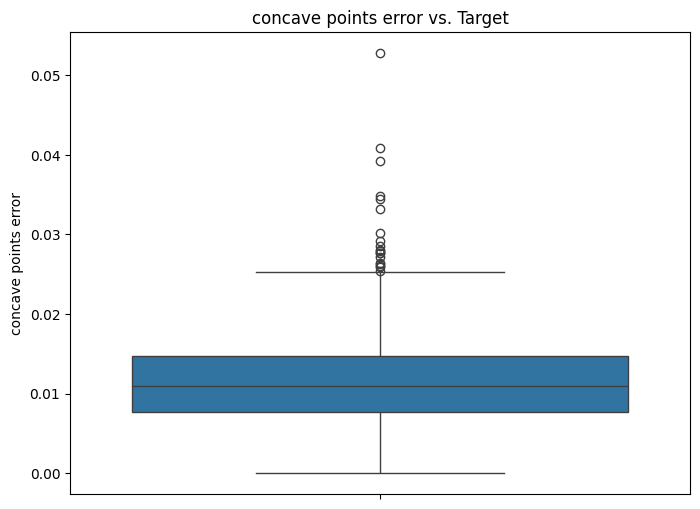

lowestCount of outliers (log-tranformed): 18


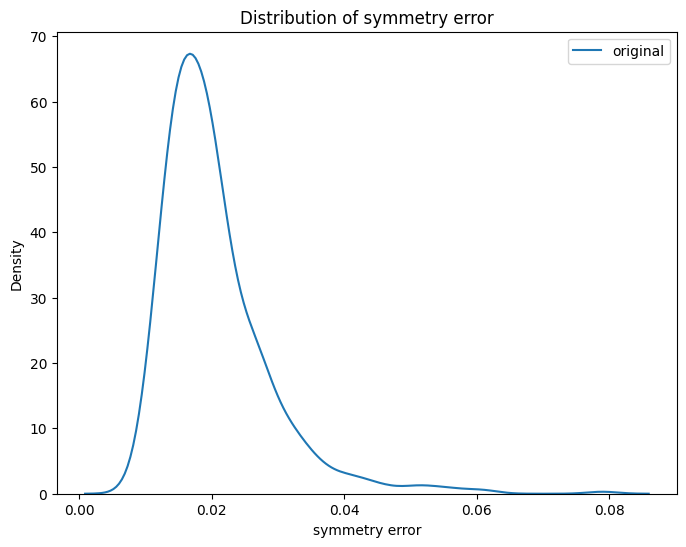

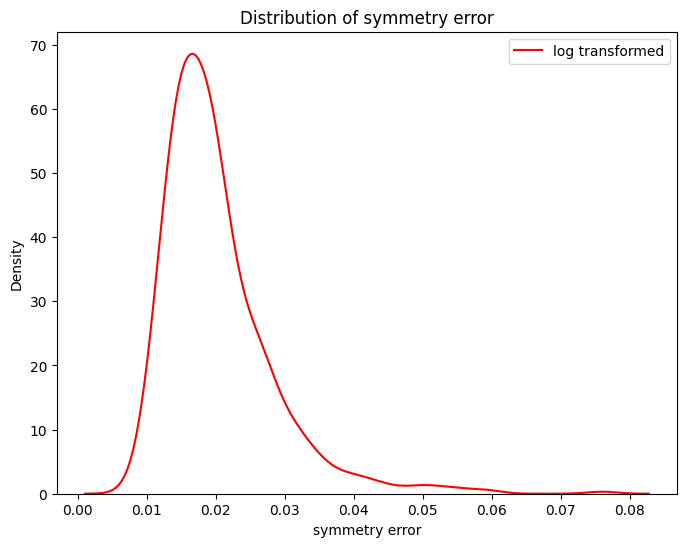

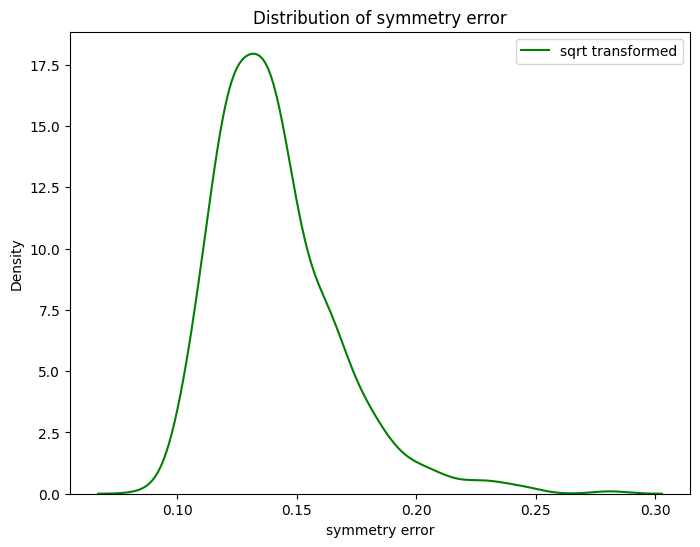

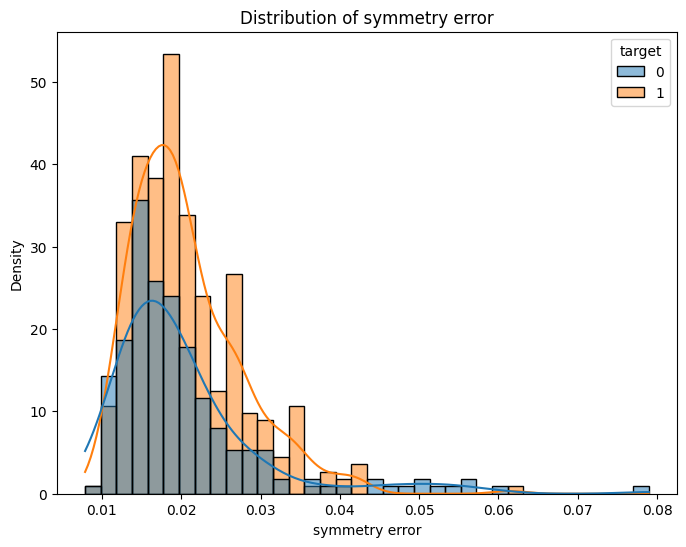

overlapping area for symmetry error:0.927856337495557


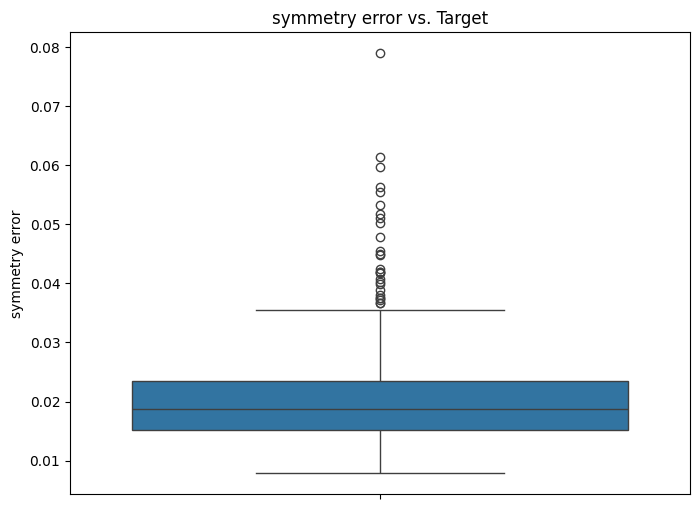

Count of outliers (sqrt-tranformed): 20


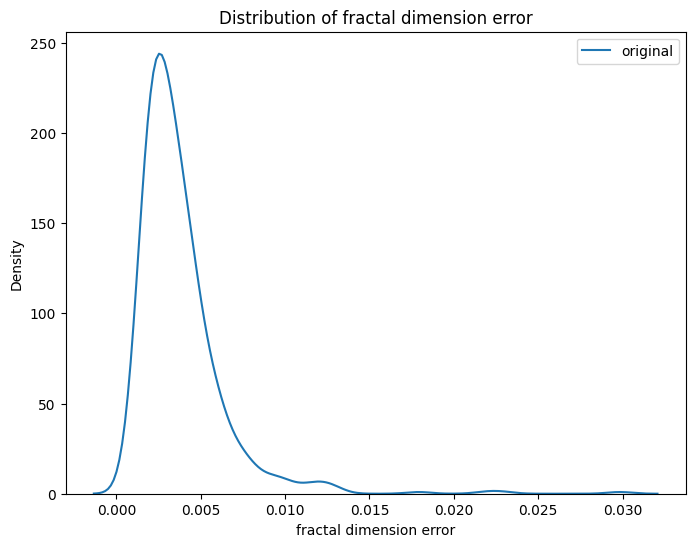

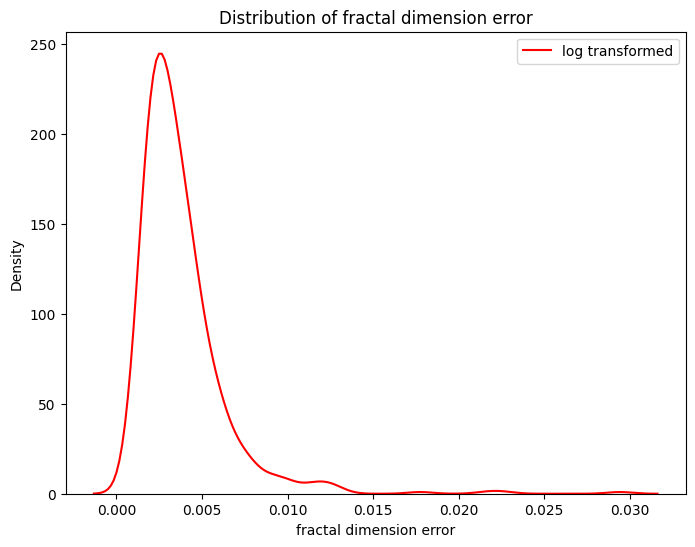

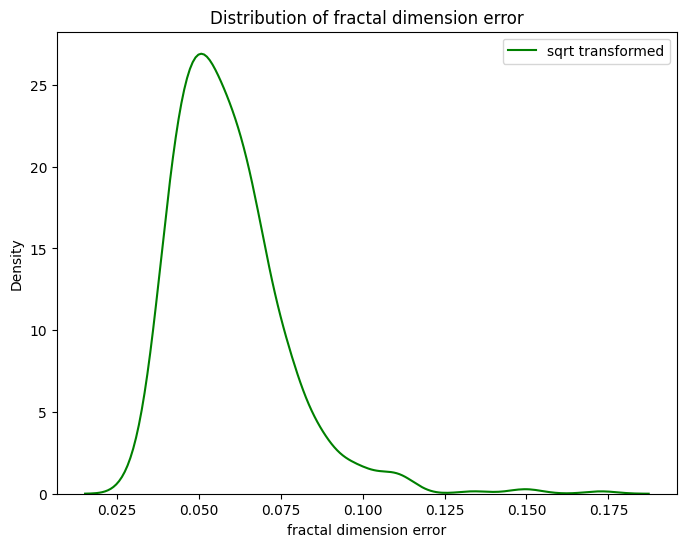

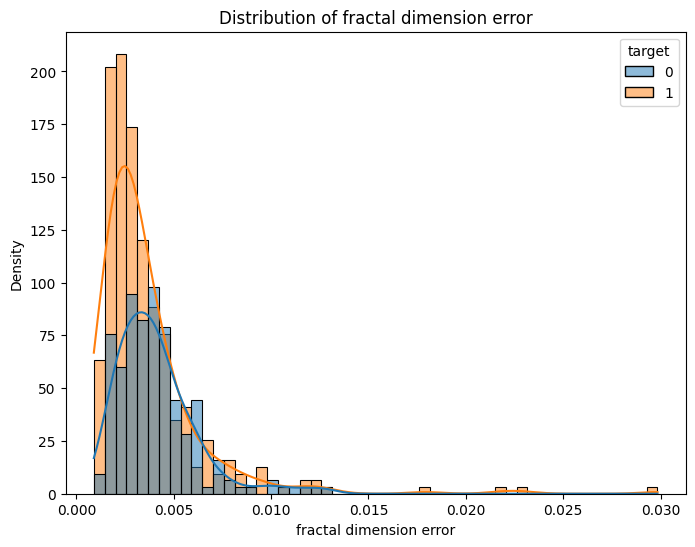

overlapping area for fractal dimension error:0.27735958286189893


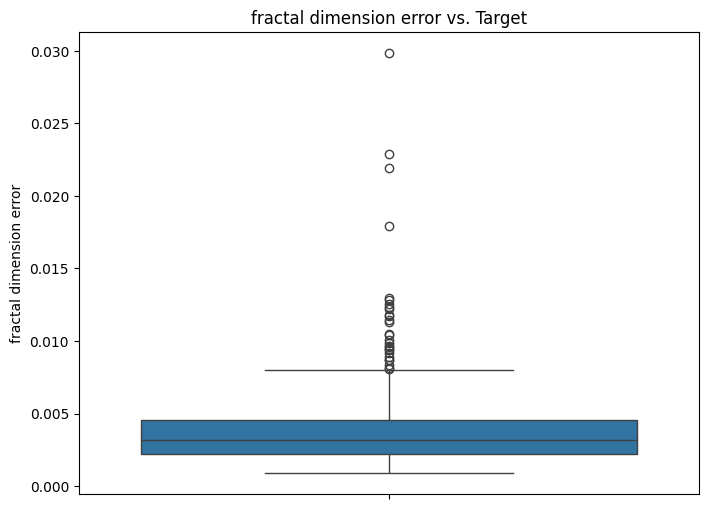

Count of outliers (sqrt-tranformed): 19


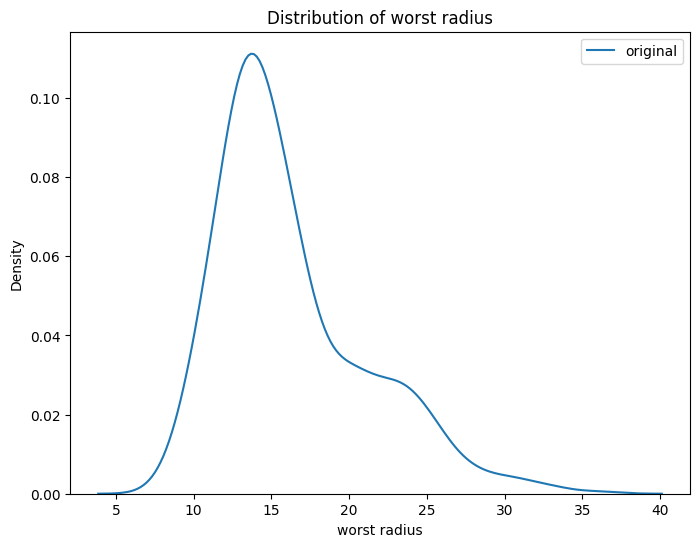

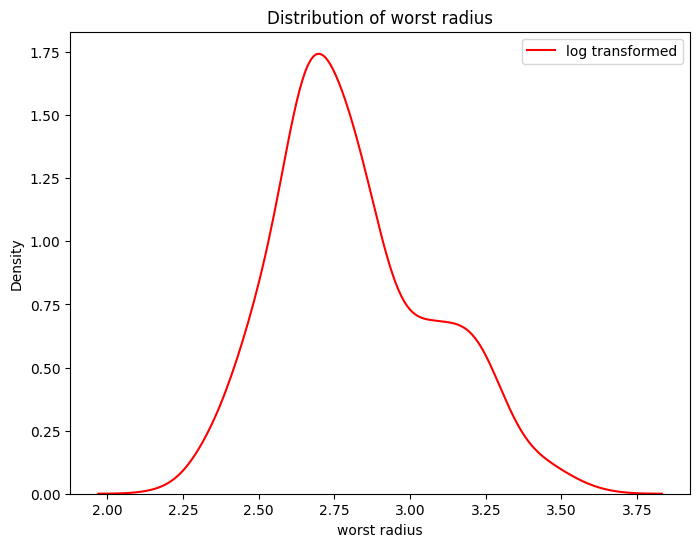

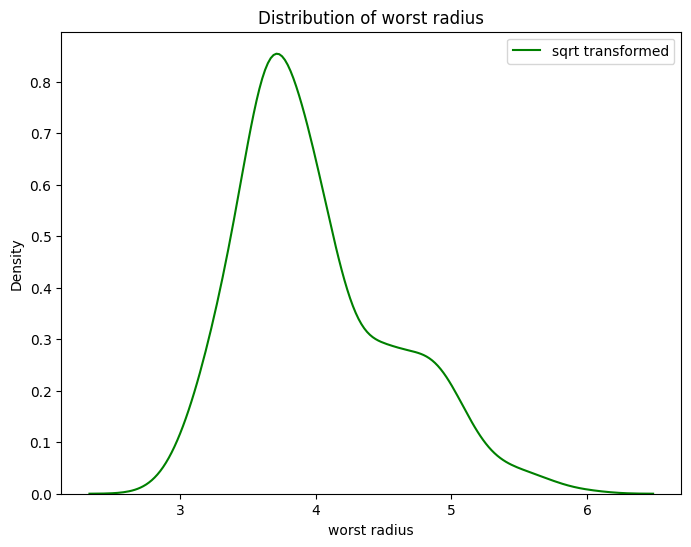

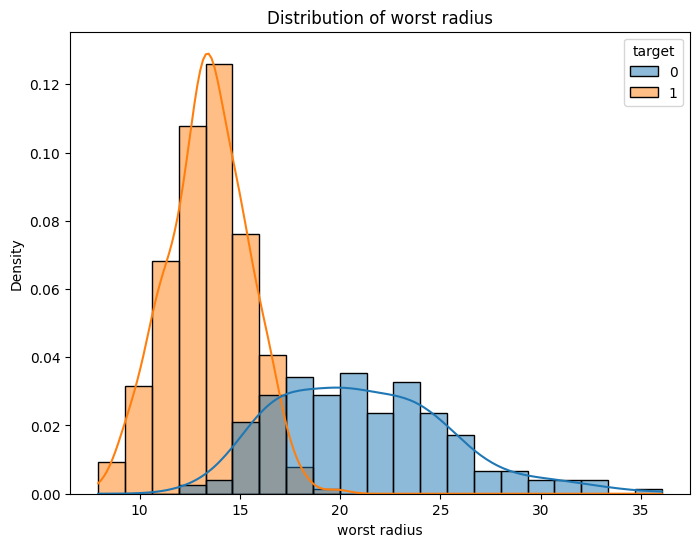

overlapping area for worst radius:0.9003404399035272


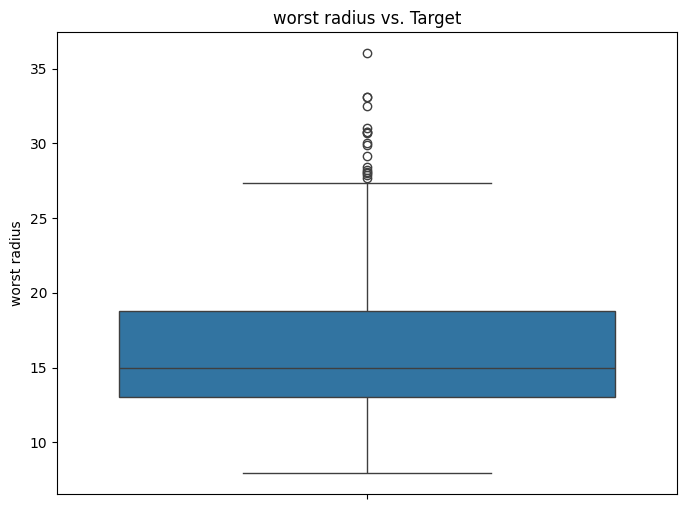

lowestCount of outliers (log-tranformed): 4


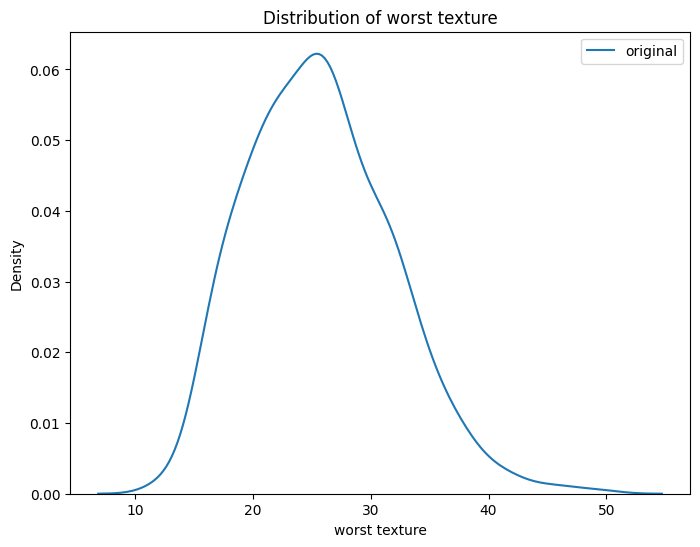

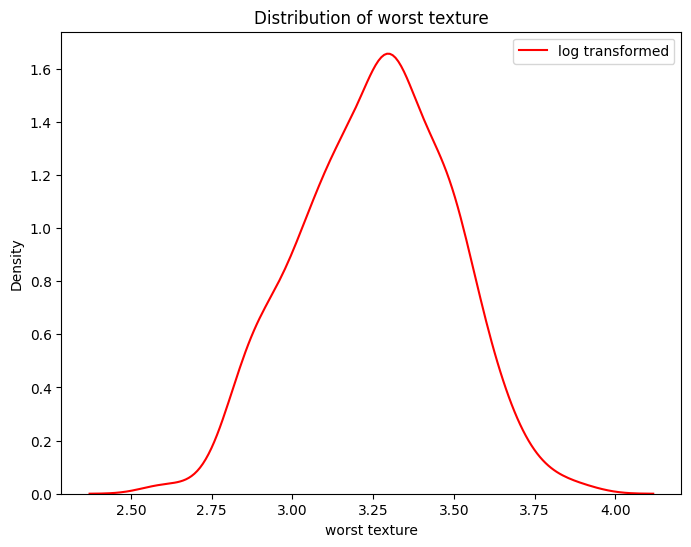

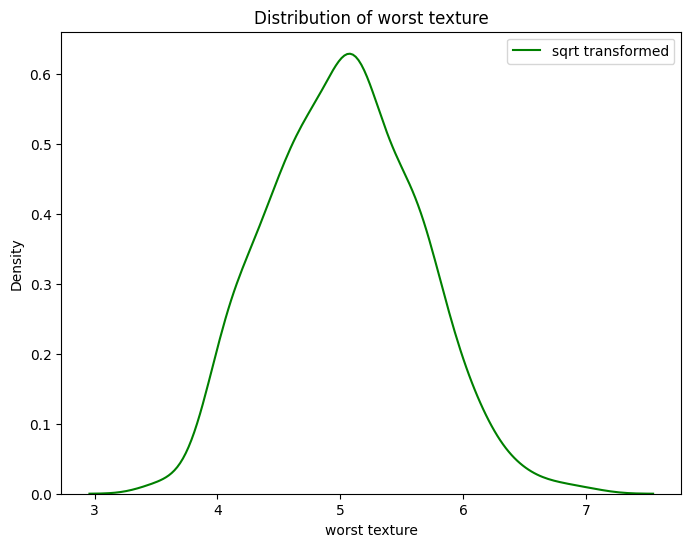

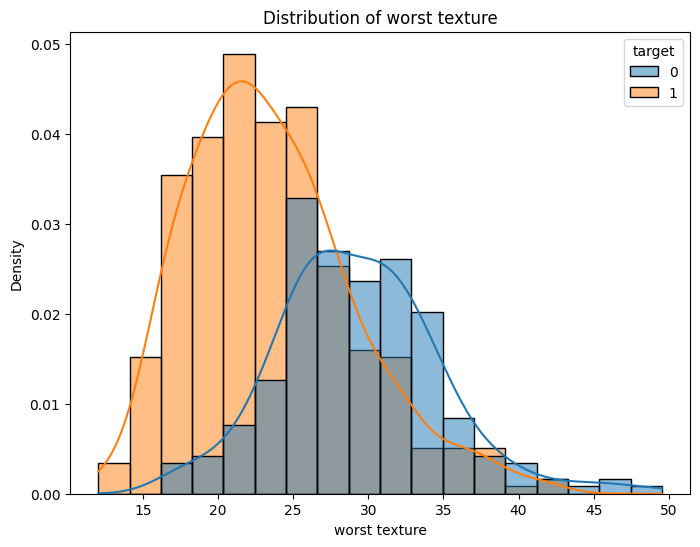

overlapping area for worst texture:0.8544203388395326


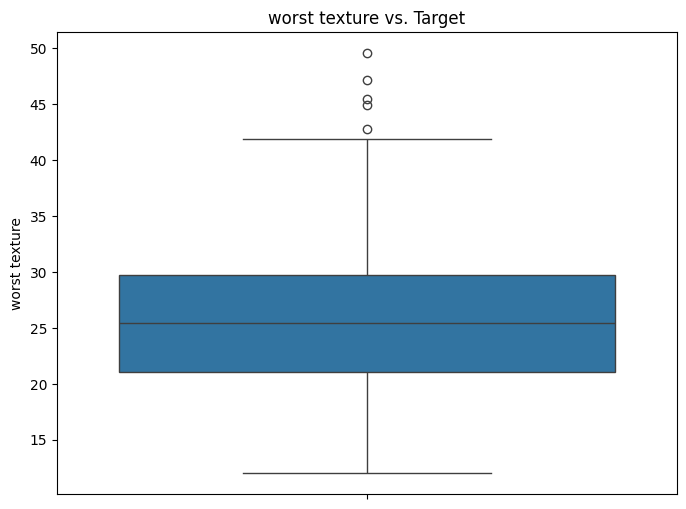

log_transformed_outlier_count = sqrt_transformed_outlier_count, which is: 2


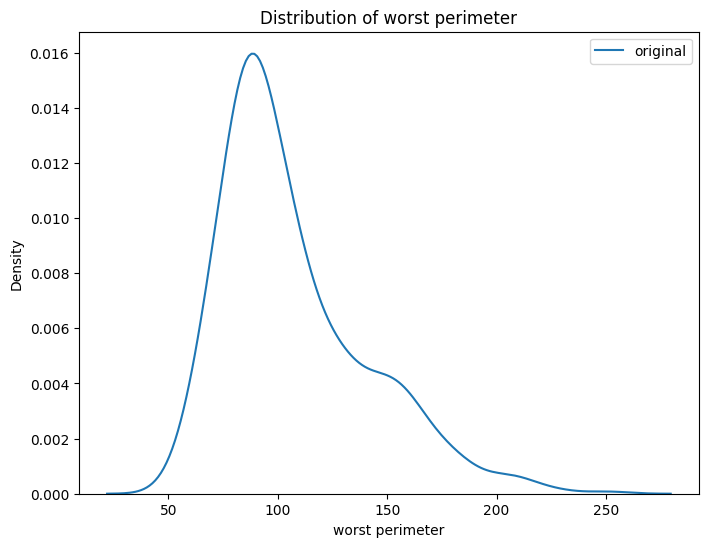

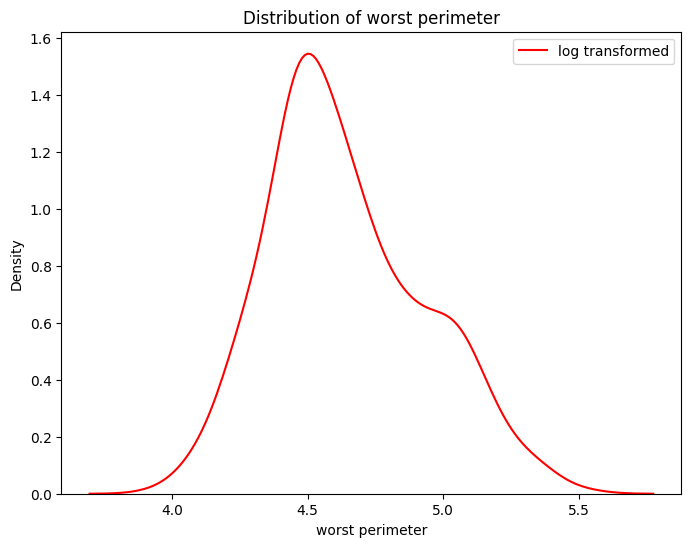

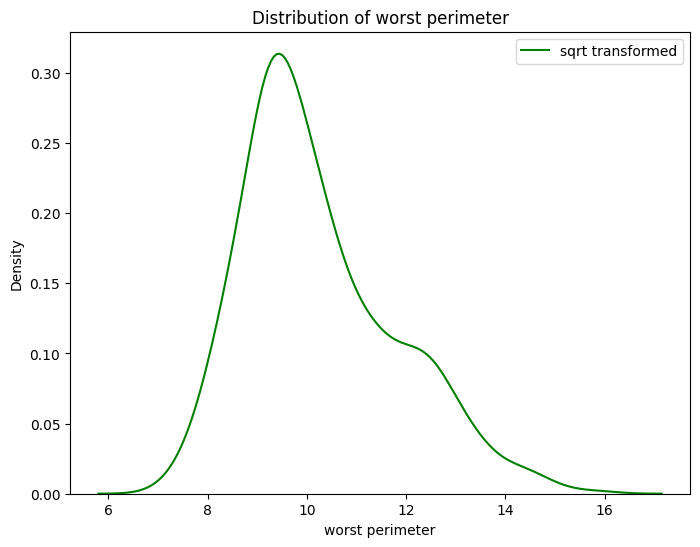

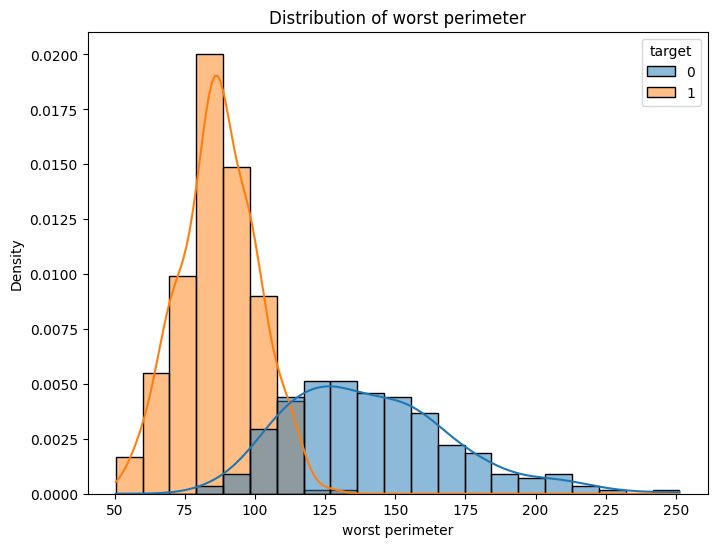

overlapping area for worst perimeter:0.8929346108179803


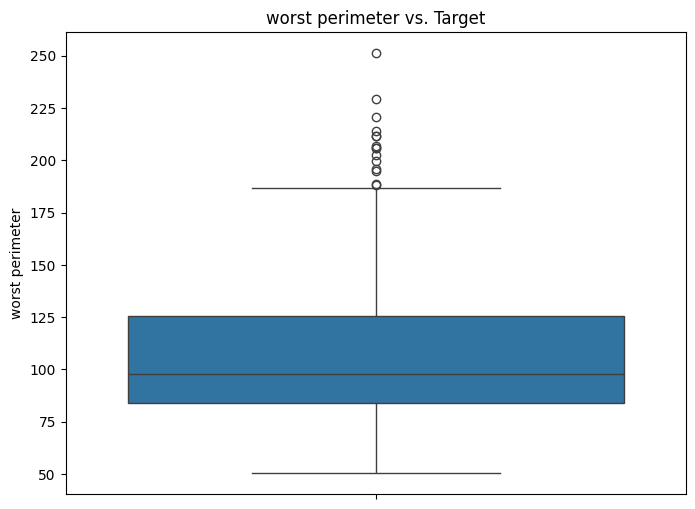

lowestCount of outliers (log-tranformed): 2


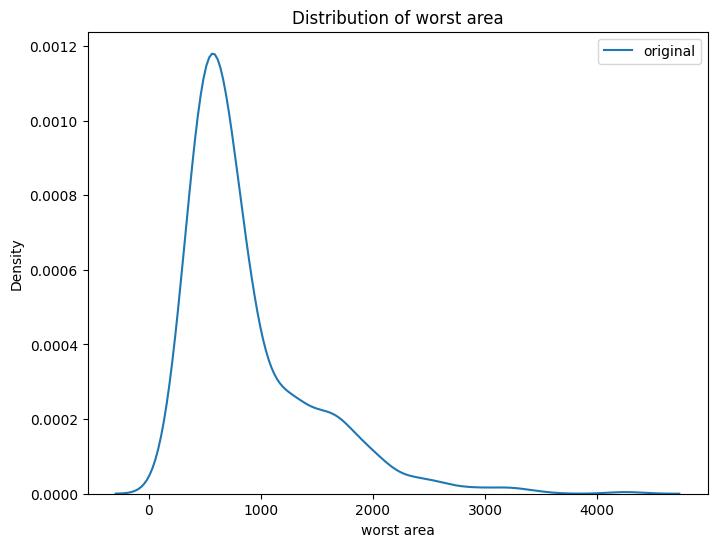

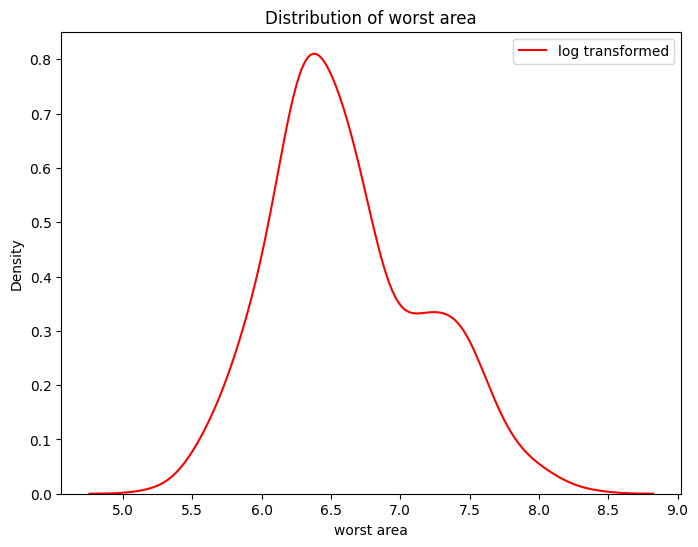

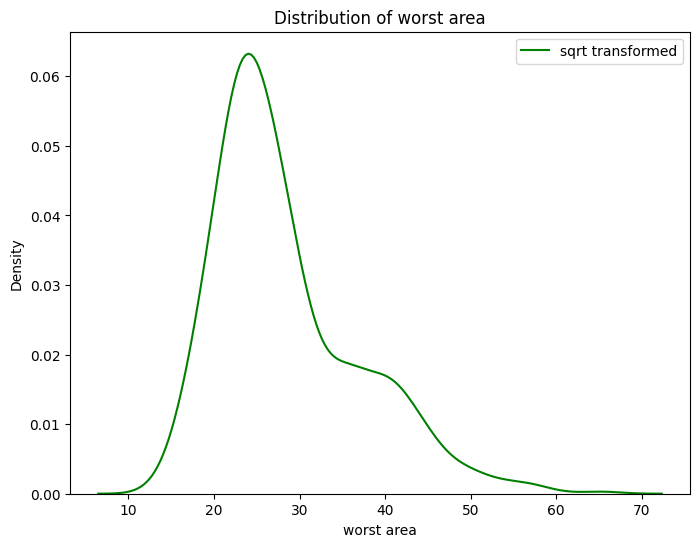

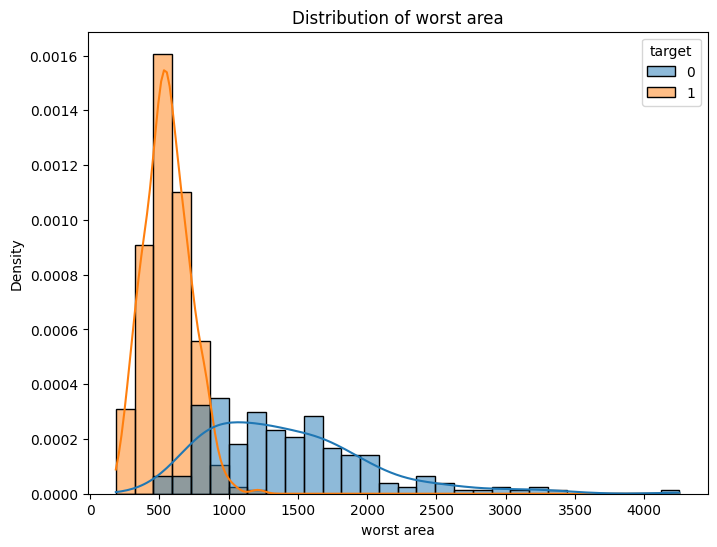

overlapping area for worst area:0.9743366415542403


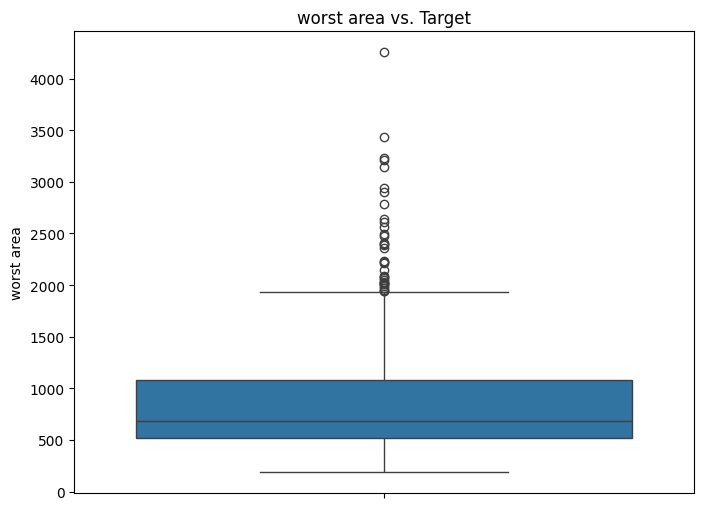

lowestCount of outliers (log-tranformed): 2


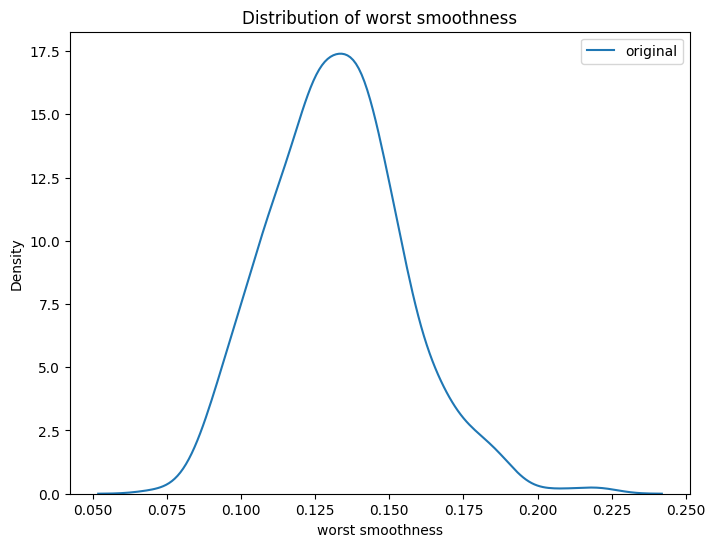

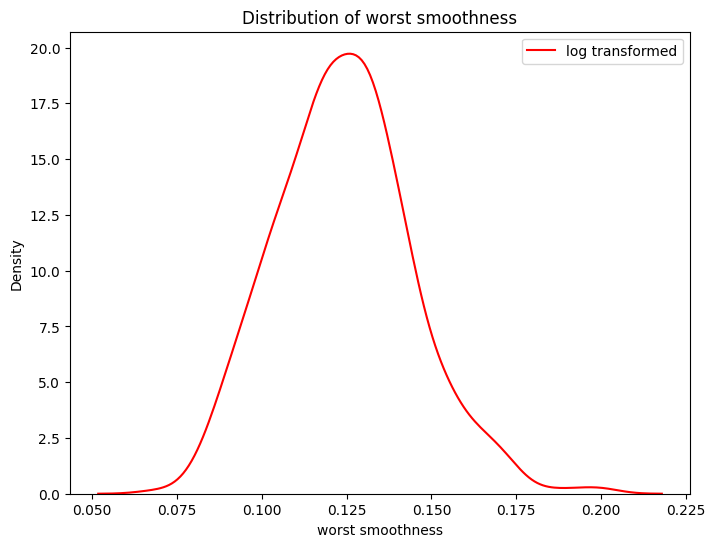

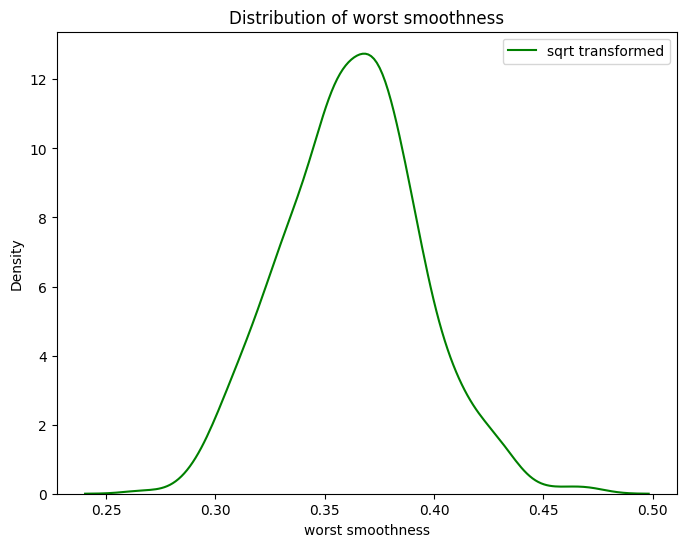

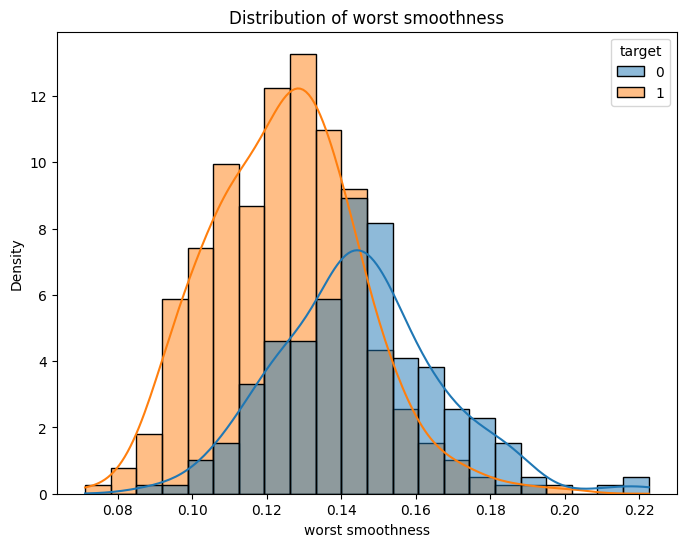

overlapping area for worst smoothness:0.8588854227977504


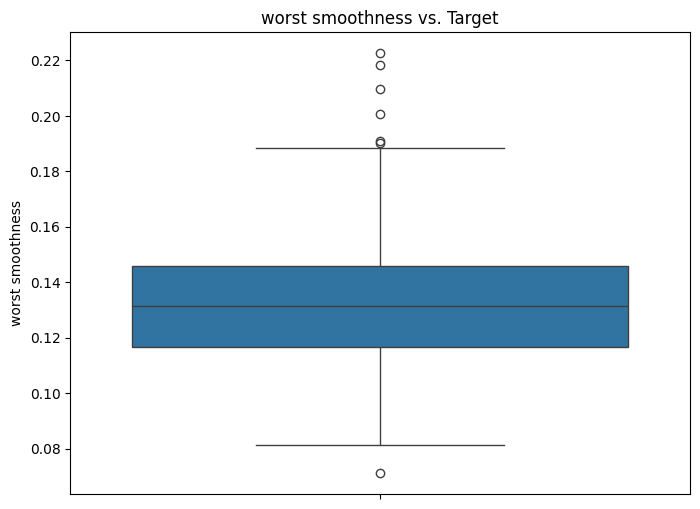

log_transformed_outlier_count = sqrt_transformed_outlier_count, which is: 5


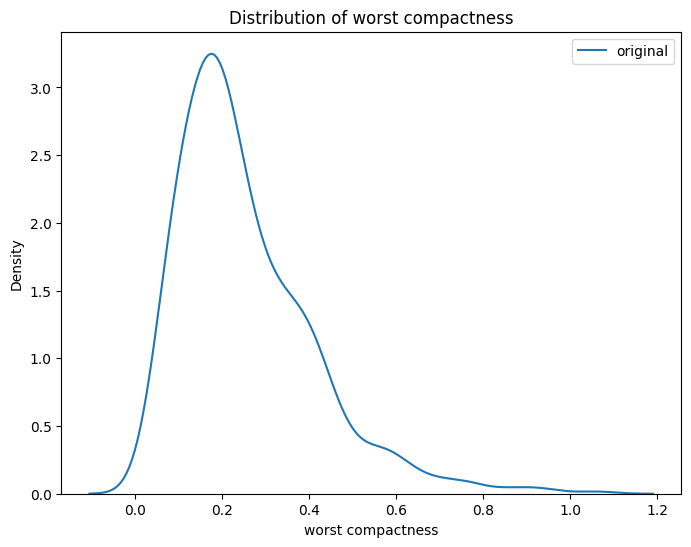

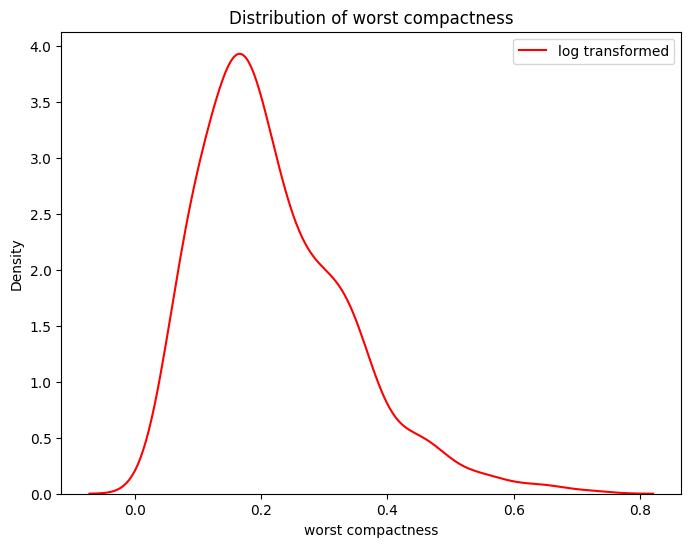

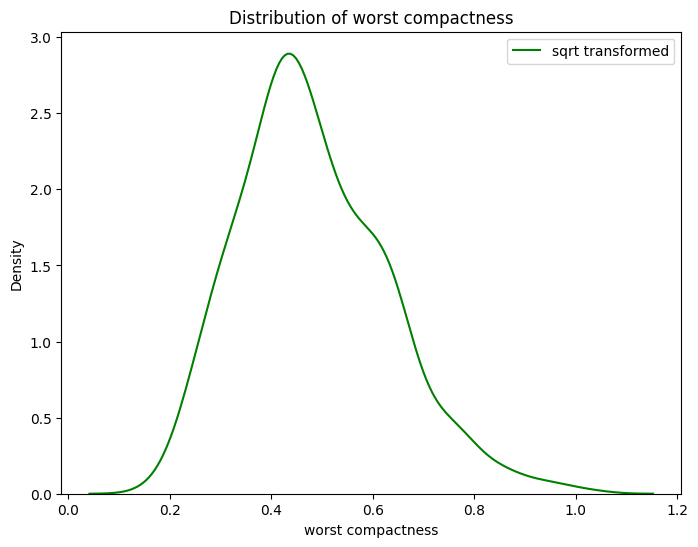

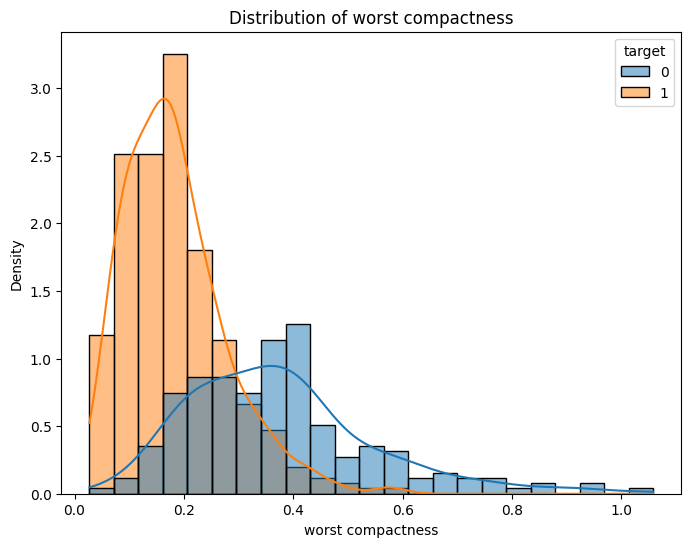

overlapping area for worst compactness:0.9788834353380292


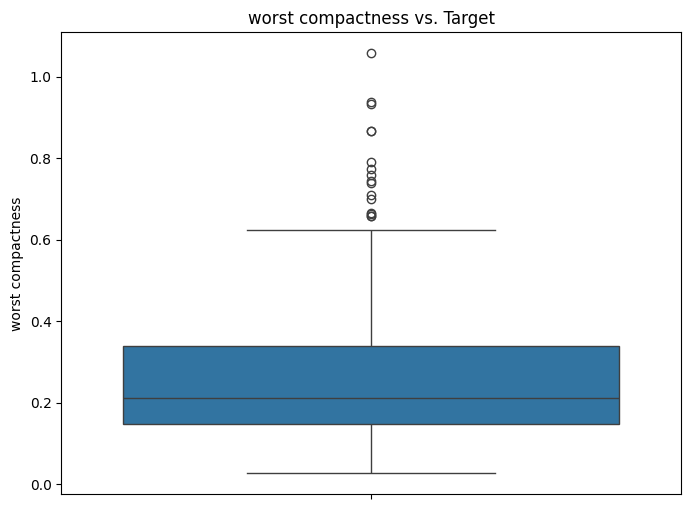

Count of outliers (sqrt-tranformed): 6


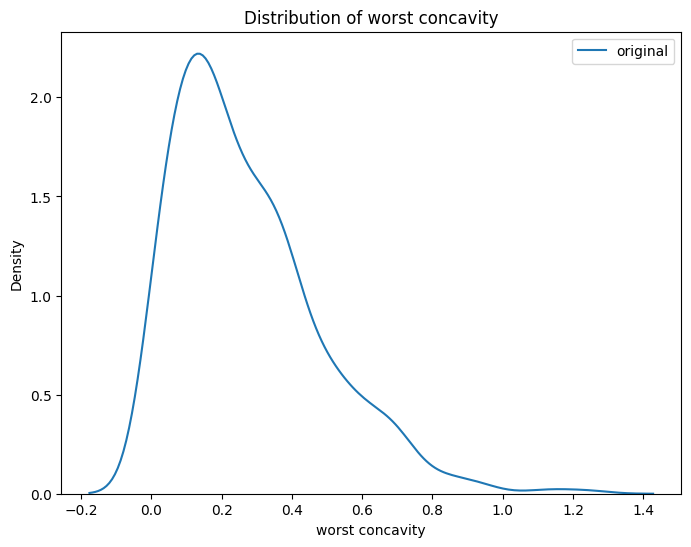

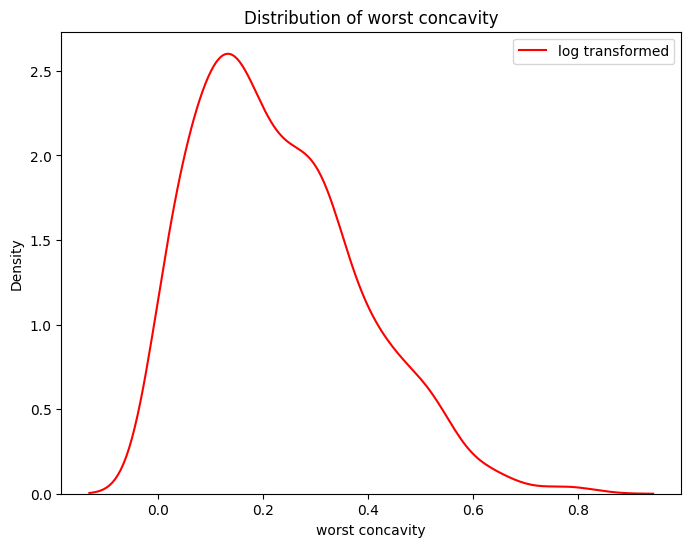

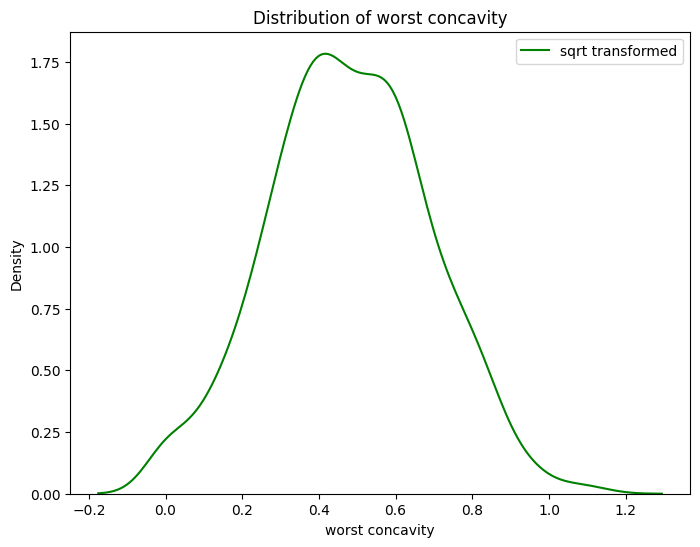

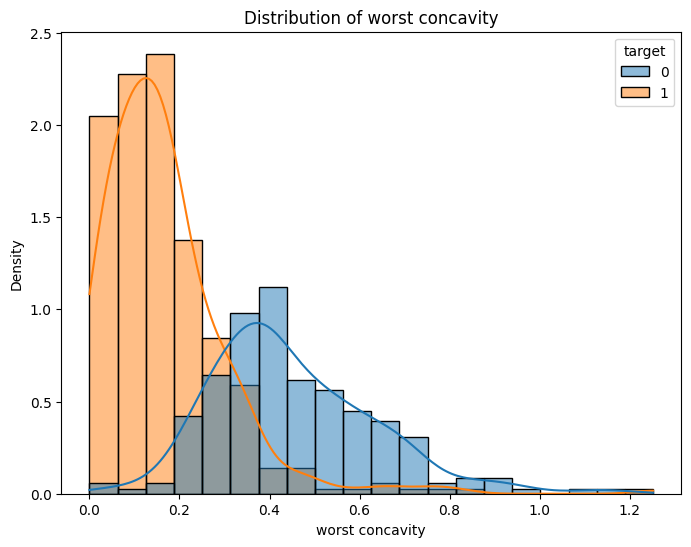

overlapping area for worst concavity:0.27125628707085936


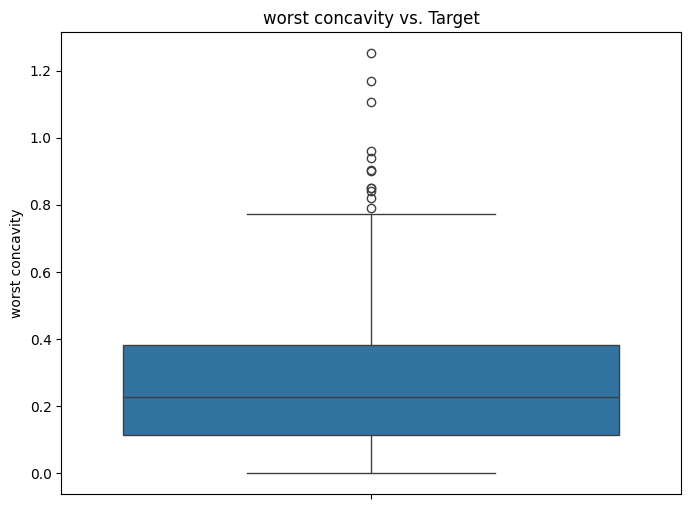

Count of outliers (sqrt-tranformed): 3


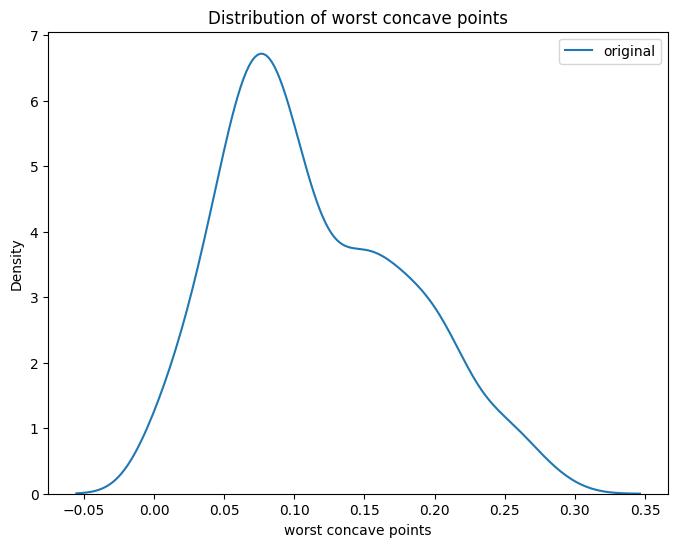

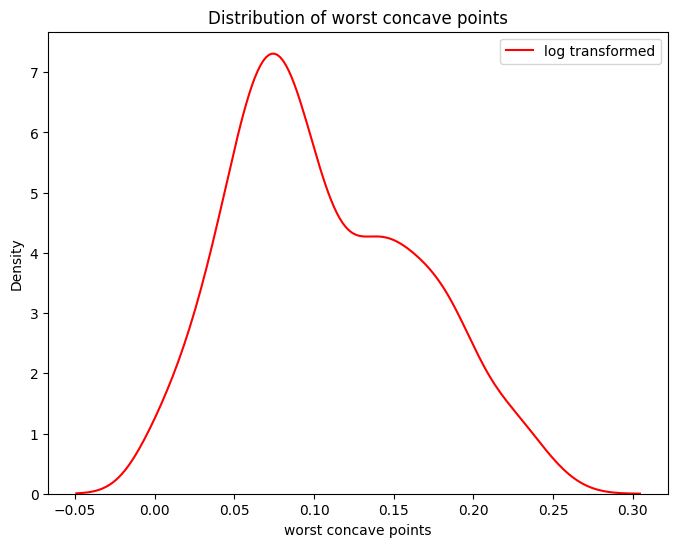

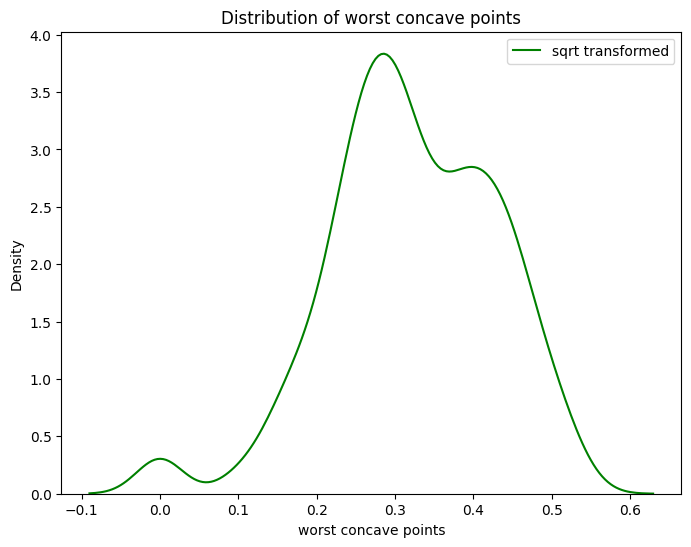

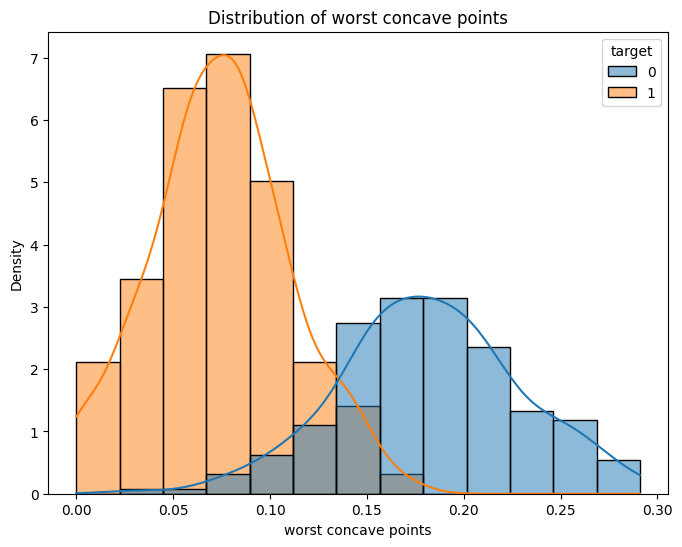

overlapping area for worst concave points:0.8019910575550975


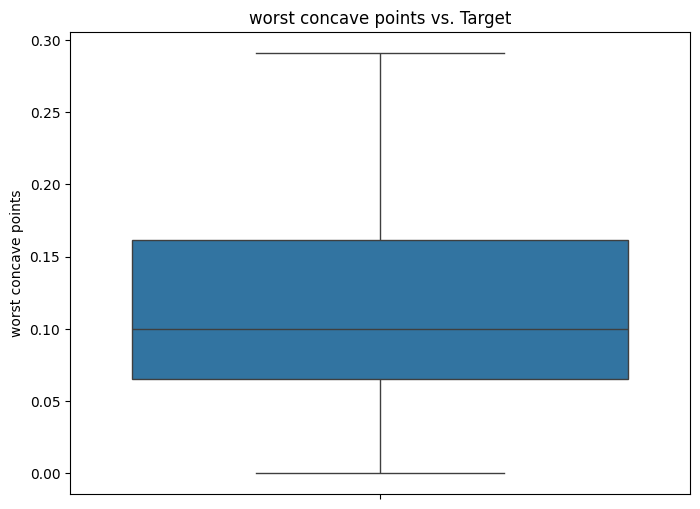

original_outlier_count = log_transformed_outlier_count, which is: 0


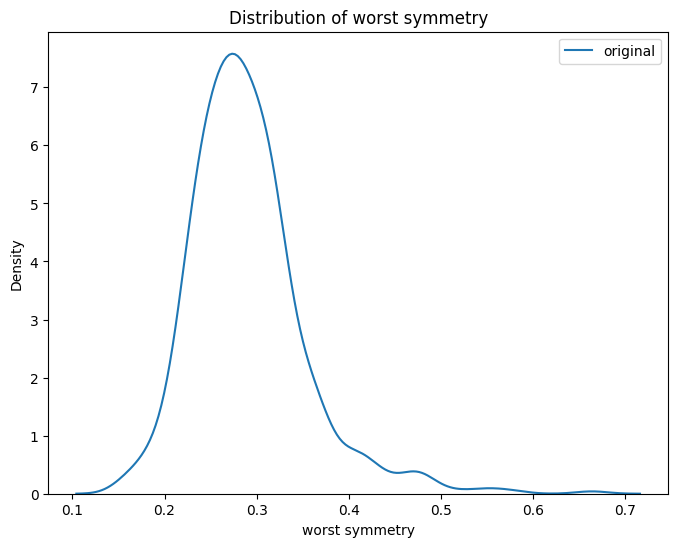

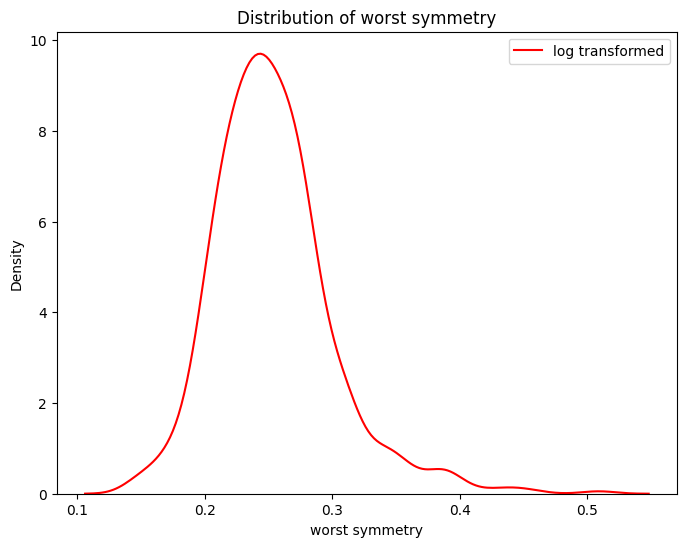

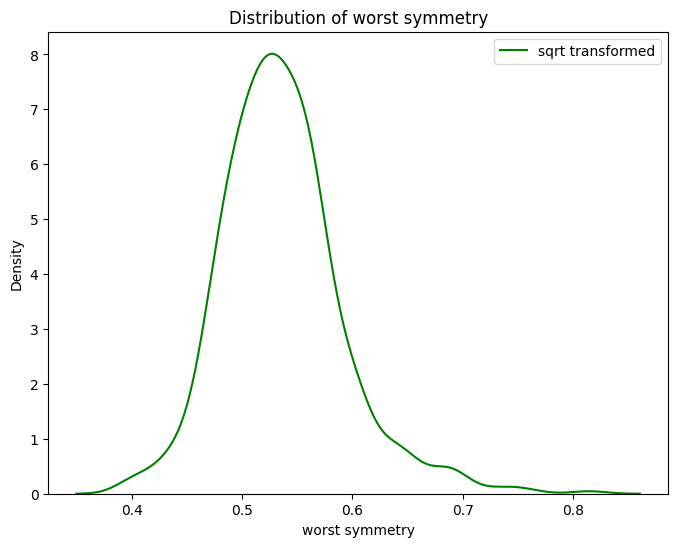

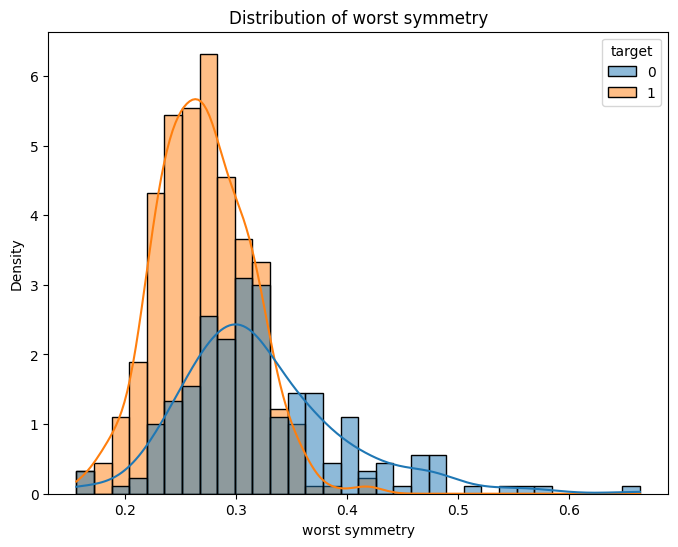

overlapping area for worst symmetry:0.8884407114702199


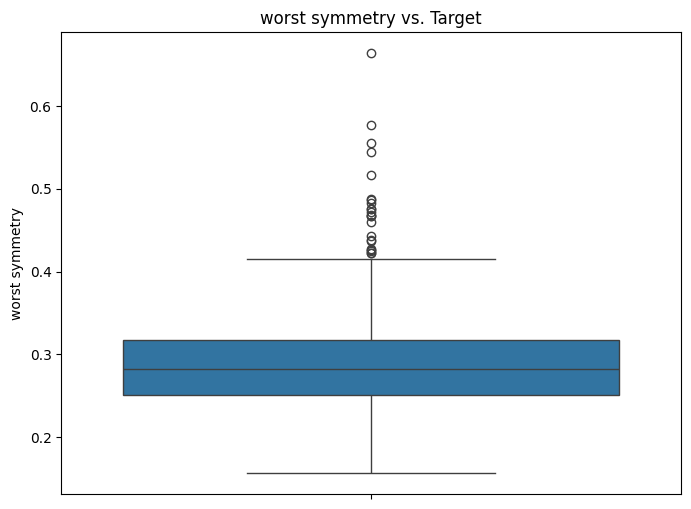

lowestCount of outliers (log-tranformed): 20


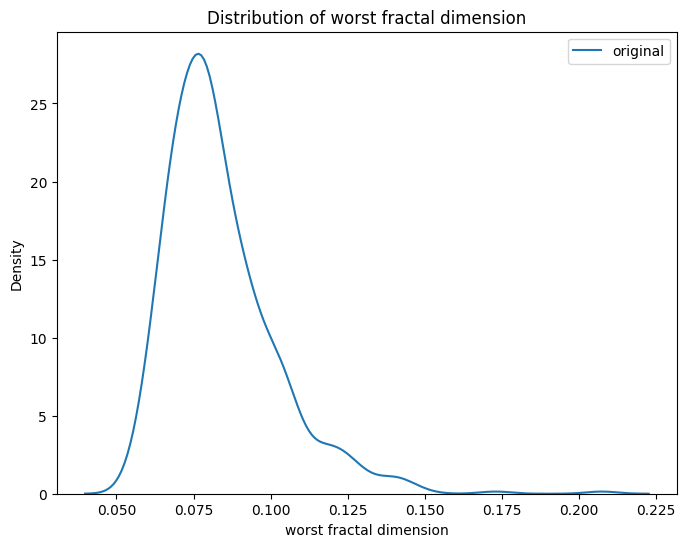

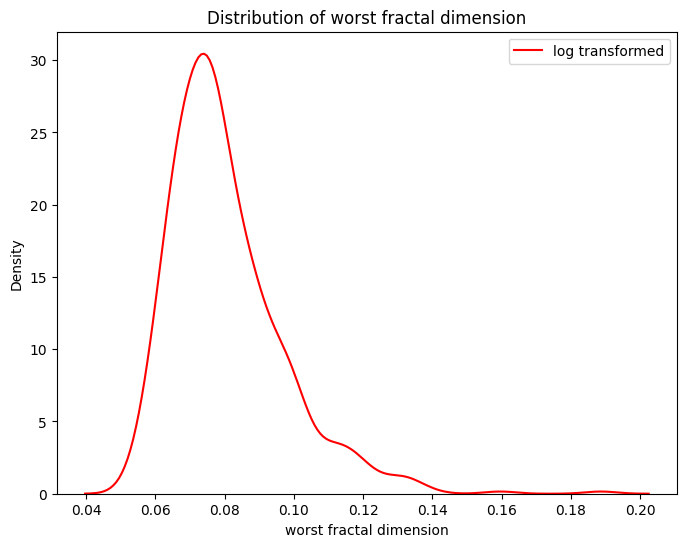

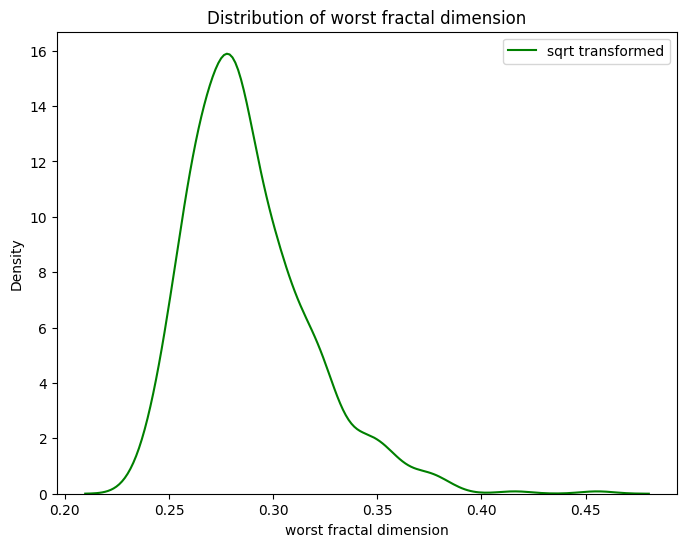

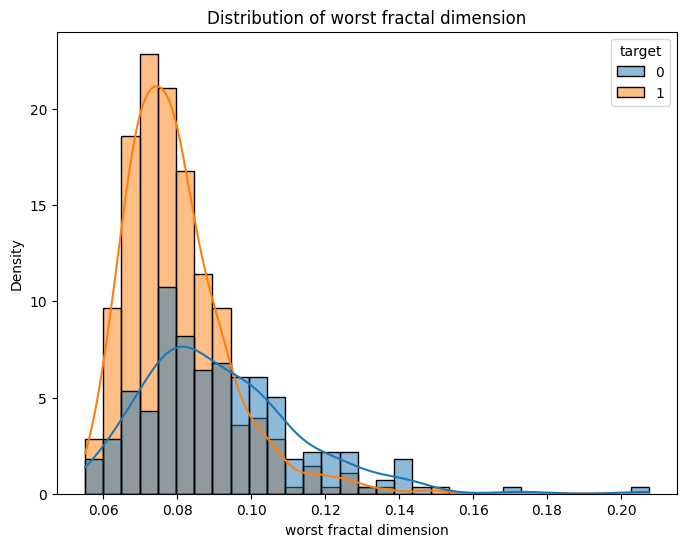

overlapping area for worst fractal dimension:0.9848009475141477


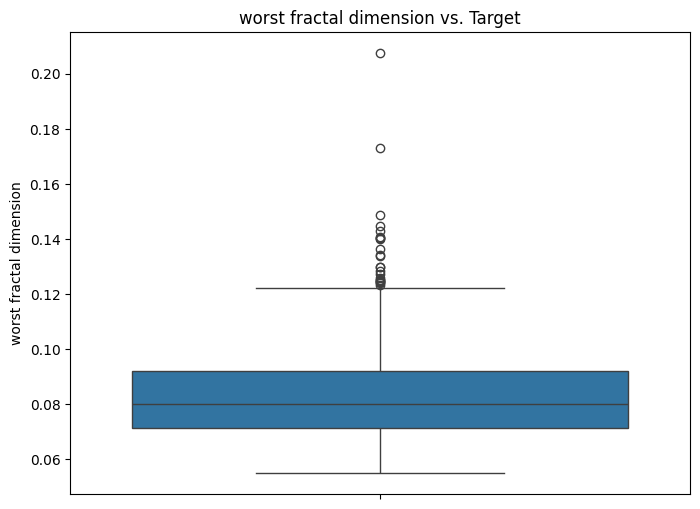

Count of outliers (sqrt-tranformed): 15


In [ ]:
#for heat maps
plt.figure(figsize= (8,6))
correlation_matrix= pd_cancer_df[list(features_to_plot)].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt= '.2f')
plt.title(f'Correlation Heatmap for features')
plt.show()

#identifying outliers from box plots
def count_outliers(data):
  q1= np.percentile(data, 25)
  q3= np.percentile(data, 75)
  IQR= q3-q1
  lower_bound= q1-1.5*IQR
  upper_bound= q3+1.5*IQR
  outliers= [x for x in data if x < lower_bound or x > upper_bound]
  return len(outliers)
  """
    counts the amount of outliers based on the data (in the form of a pd series)
    inputted (which may have undergone a transformation such as log or sqrt)
    """
transformation_and_outlier_count=[]

for feature in features_to_plot:
  #data transformations for historgrams:
  log_transformed_data = np.log1p(pd_cancer_df[feature])
  sqrt_transformed_data = np.sqrt(pd_cancer_df[feature])

  # histogram/distribution visualizations
  plt.figure(figsize= (8,6))
  sns.kdeplot(data=pd_cancer_df, x=feature, label= 'original')
  plt.title(f'Distribution of {feature}')
  plt.legend()
  plt.show()
  plt.figure(figsize= (8,6))
  sns.kdeplot( x=log_transformed_data, label='log transformed', color='red')
  plt.title(f'Distribution of {feature}')
  plt.legend()
  plt.show()
  plt.figure(figsize= (8,6))
  sns.kdeplot(x=sqrt_transformed_data, label='sqrt transformed', color='green')
  plt.title(f'Distribution of {feature}')
  plt.legend()
  plt.show()
  plt.figure(figsize= (8,6))
  sns.histplot(data=pd_cancer_df, x=feature,hue=pd_cancer_df['target'],stat='density', kde= 'true') #stat = 'density' to scale the two histograms per chart for accurate comparison
  plt.title(f'Distribution of {feature}')
  plt.show()

  #create histograms for each dist
  hist_0, bins_0 = np.histogram(data_class0[feature], bins=20, density=True)
  hist_1, bins_1 = np.histogram(data_class1[feature], bins=20, density=True)
  #calcuate overlapping area using minimum values
  overlap=np.sum(np.minimum(hist_0, hist_1)*np.diff(bins_0))
  print(f"overlapping area for {feature}:{overlap}")
  #add the overlap value and feature name as a tuple to the bivariate overlap list to sort (prioritize highest overlapping features for feature engineering)
  bivariate_overlap_area.append((feature, overlap))

  #for box plots
  plt.figure(figsize= (8,6))
  sns.boxplot(y=feature, data= pd_cancer_df) #following parameter excluded, hue= pd_cancer_df['target'], x=pd_cancer_df['target'])
  plt.title(f'{feature} vs. Target')
  plt.show()


  #identifying outliers from box plots
  def count_outliers(data):
    q1= np.percentile(data, 25)
    q3= np.percentile(data, 75)
    IQR= q3-q1
    lower_bound= q1-1.5*IQR
    upper_bound= q3+1.5*IQR
    outliers= [x for x in data if x < lower_bound or x > upper_bound]
    return len(outliers)

  #this bloc tells me which transformation led to the least amount of outliers
  original_outlier_count = count_outliers(pd_cancer_df[feature])
  log_transformed_outlier_count = count_outliers(log_transformed_data)
  sqrt_transformed_outlier_count = count_outliers(sqrt_transformed_data)

  if (original_outlier_count < log_transformed_outlier_count) & (original_outlier_count < sqrt_transformed_outlier_count):
      print(f'lowestCount of outliers (original): {original_outlier_count}')
      transformation_and_outlier_count.append((feature, 'no transformation', original_outlier_count))
  elif (log_transformed_outlier_count < original_outlier_count) & (log_transformed_outlier_count < sqrt_transformed_outlier_count):
      print(f'lowestCount of outliers (log-tranformed): {log_transformed_outlier_count}')
      transformation_and_outlier_count.append((feature, 'log transformation', log_transformed_outlier_count))
  elif (sqrt_transformed_outlier_count < original_outlier_count) & (sqrt_transformed_outlier_count < log_transformed_outlier_count):
      print(f'Count of outliers (sqrt-tranformed): {sqrt_transformed_outlier_count}')
      transformation_and_outlier_count.append((feature, 'sqrt transformation', sqrt_transformed_outlier_count))
  elif (sqrt_transformed_outlier_count == original_outlier_count) & (sqrt_transformed_outlier_count == log_transformed_outlier_count):
    print(f'all outlier counts the same despite tranformations, the count is: {original_outlier_count}')
    transformation_and_outlier_count.append((feature, 'all equal transformations', original_outlier_count))
  elif original_outlier_count == log_transformed_outlier_count:
    print(f'original_outlier_count = log_transformed_outlier_count, which is: {original_outlier_count}')
    transformation_and_outlier_count.append((feature, 'log and original transformations equal', original_outlier_count))
  elif original_outlier_count == sqrt_transformed_outlier_count:
    print(f'original_outlier_count = sqrt_transformed_outlier_count, which is: {original_outlier_count}')
    transformation_and_outlier_count.append((feature, 'sqrt and original transformations equal', original_outlier_count))
  elif log_transformed_outlier_count == sqrt_transformed_outlier_count:
    print(f'log_transformed_outlier_count = sqrt_transformed_outlier_count, which is: {log_transformed_outlier_count}')
    transformation_and_outlier_count.append((feature, 'log and sqrt transformations equal', log_transformed_outlier_count))
  else:
    print('error')





### features listed from lowest to highest outliers and their respective transformations (if any)

In [ ]:
#sorts the features from features with the lowest to the higest amount of outliers (along with the transformation done if any)
transformation_and_outlier_count.sort(key=lambda x: x[2], reverse=False)

for item in transformation_and_outlier_count:
  print(item, '\n')

def count_transformation_types_for_features(transformation_type: ['log transformation', 'sqrt_transformation','no transformation', 'all equal transformations', 'log and original transformations equal', 'sqrt and original transformations equal', 'log and sqrt transformations equal']):
  '''counts the number of transformations for a certain type of transformation,such as log or sqrt
  args: tuple list in form (df[feature], 'log_value', outlier_count)
  returns: the num of the specified transformation type in the list of tuples'''
  count = 0
  for item in transformation_and_outlier_count:
    if item[1] == transformation_type:
      count += 1
  return count


print('counts of transformations log, sqrt, none, all equal, log and original equal, sqrt and original equal, log and sqrt equal',
count_transformation_types_for_features('log transformation'),
count_transformation_types_for_features('sqrt transformation'),
count_transformation_types_for_features('no transformation'),
count_transformation_types_for_features('all equal transformations'),
count_transformation_types_for_features('log and original transformations equal'),
count_transformation_types_for_features('sqrt and original transformations equal'),
count_transformation_types_for_features('log and sqrt transformations equal')
)


('mean concave points', 'sqrt transformation', 0) 

('worst concave points', 'log and original transformations equal', 0) 

('mean texture', 'log transformation', 2) 

('mean concavity', 'sqrt transformation', 2) 

('worst texture', 'log and sqrt transformations equal', 2) 

('worst perimeter', 'log transformation', 2) 

('worst area', 'log transformation', 2) 

('worst concavity', 'sqrt transformation', 3) 

('worst radius', 'log transformation', 4) 

('mean area', 'log transformation', 5) 

('mean smoothness', 'sqrt transformation', 5) 

('worst smoothness', 'log and sqrt transformations equal', 5) 

('mean perimeter', 'log transformation', 6) 

('worst compactness', 'sqrt transformation', 6) 

('mean radius', 'log transformation', 7) 

('area error', 'log transformation', 7) 

('mean compactness', 'sqrt transformation', 8) 

('texture error', 'log transformation', 9) 

('concavity error', 'sqrt transformation', 10) 

('compactness error', 'sqrt transformation', 12) 

('mean fractal 

In [ ]:
sqrt_transformed_feature_data

NameError: name 'sqrt_transformed_feature_data' is not defined

In [ ]:
#transform features in place based on the transformation method that gave them the lowest outlier count


log_transformed_feature_data = []
sqrt_transformed_feature_data = []
for item in transformation_and_outlier_count:
  log_transformation_data_key_words= ['log transformation', 'log and original transformations equal']
  sqrt_transformation_data_key_words= ['sqrt transformation', 'sqrt and original transformations equal', 'log and sqrt transformations equal']
  if item[1] in log_transformation_data_key_words:
    log_transformed_feature_data.append(item[0])
  elif item[1] in sqrt_transformation_data_key_words:
    sqrt_transformed_feature_data.append(item[0])
  else:
    pass


transformed_cancer_df= pd_cancer_df.copy()
transformed_cancer_df[log_transformed_feature_data] = np.log1p(transformed_cancer_df[log_transformed_feature_data])
transformed_cancer_df[sqrt_transformed_feature_data] = np.sqrt(transformed_cancer_df[sqrt_transformed_feature_data])

transformed_cancer_df

### Multicollinearlity list
this bloc generates a list of the feature pairs that are unique and non redundant (ex featureA,featureA, corr) and thier respective correlation values.

the pairs that have the highest correlation with one another are the feature pairs with the highest chance of being multicollinear.

the list of these pairs will determine features to exclude from the model to reduce multicollinearlity / reduandant infomration

In [ ]:
for col in correlation_matrix:
  for row_name, row_value in correlation_matrix[col].items():
    #print(col, row_name, row_value)
    feature_on_feature_correlation_values.append((col, row_name, row_value))

feature_on_feature_correlation_values.sort(key=lambda x: x[2], reverse=True)

feature_on_feature_correlation_values
seen_pairs = set()
unique_pairs = []

for feature1, feature2, value in feature_on_feature_correlation_values:
  pair = tuple(sorted((feature1, feature2)))
  if pair not in seen_pairs: #gets rid of (featureB, featureA, corrvalue) and keeps (featureA, featureB, corrvalue) to avoid redundancy
    unique_pairs.append((feature1, feature2, value))
    seen_pairs.add(pair)
feature_on_feature_correlation_values=[]
for feature1, feature2, value in unique_pairs:
    if feature1!=feature2: #gets rid of (feature A, feature A , corr=1 ) tuples
      feature_on_feature_correlation_values.append((feature1, feature2, value))

#Final list of feature_on_ feature correlation values that exclude (elements such as (featureA,featureA, value) or '(featureB,featureA,value) when(featureA,featureB,value)exists in the list)
for item in feature_on_feature_correlation_values:
  print(item, '\n')


In [ ]:
#order the features' bivariate overlap from lowest to highest
bivariate_overlap_area.sort(key=lambda x: x[1], reverse=False)
for feature, overlap in bivariate_overlap_area:
  print(f"{feature}: {overlap}", '\n')


## insights on relations with target via feature
-list of features ordered by highest to lowest overlap in their bivariate distributions

-list of paired featurs that correlate with one another the most to least

-list of features from lowest to highest outliers and any transformations done such as log or sqrt

### ORDER OF FEATURES from least overlap in their bivariate distributions
concavity error: 0.20876954898597525

worst concavity: 0.27125628707085936

fractal dimension error: 0.27735958286189893

mean concavity: 0.35611162581547107

concave points error: 0.5588177692275895

texture error: 0.6024911003538349

smoothness error: 0.6074371659500934

mean smoothness: 0.6191992821322804

worst concave points: 0.8019910575550975

mean symmetry: 0.8136893138851744

mean perimeter: 0.8385927869721003

mean texture: 0.8531966611117949

worst texture: 0.8544203388395326

mean radius: 0.8555566644658162

worst smoothness: 0.8588854227977504

worst symmetry: 0.8884407114702199

mean fractal dimension: 0.8900820387466458

worst perimeter: 0.8929346108179803

compactness error: 0.8972895845266214

worst radius: 0.9003404399035272

perimeter error: 0.9277338028703108

symmetry error: 0.927856337495557

mean compactness: 0.9453839527094616

mean area: 0.9477599986138828

worst area: 0.9743366415542403

worst compactness: 0.9788834353380292

mean concave points: 0.9789518931149185

worst fractal dimension: 0.9848009475141477

radius error: 0.9952830188679246

area error: 1.0

### CORRELATION BETWEEN FEATURES in order from highest to lowest
#### this info determines the features with the highest multicollinearility and will determien which features we will exclude from the model
('mean radius', 'mean perimeter', 0.9978552814938109)

('worst radius', 'worst perimeter', 0.993707916102949)

('mean radius', 'mean area', 0.9873571700566127)

('mean perimeter', 'mean area', 0.9865068039913907)

('worst radius', 'worst area', 0.9840145644590742)

('worst perimeter', 'worst area', 0.9775780914063871)

('radius error', 'perimeter error', 0.9727936770160764)

('mean perimeter', 'worst perimeter', 0.9703868870426394)

('mean radius', 'worst radius', 0.9695389726112055)

('mean perimeter', 'worst radius', 0.9694763634663146)

('mean radius', 'worst perimeter', 0.9651365139559871)

('mean area', 'worst radius', 0.9627460860470841)

('mean area', 'worst area', 0.9592133256498998)

('mean area', 'worst perimeter', 0.9591195743552645)

('radius error', 'area error', 0.951830112110991)

('mean perimeter', 'worst area', 0.9415498080023068)

('mean radius', 'worst area', 0.9410824595860461)

('perimeter error', 'area error', 0.9376554069544157)

('mean concavity', 'mean concave points', 0.9213910263788588)

('mean texture', 'worst texture', 0.912044588840421)

('mean concave points', 'worst concave points', 0.9101553142985918)

('worst compactness', 'worst concavity', 0.8922608987764685)

('mean concavity', 'worst concavity', 0.8841026390943817)

('mean compactness', 'mean concavity', 0.8831206701772507)

('mean compactness', 'worst compactness', 0.8658090398022629)

('mean concavity', 'worst concave points', 0.861323033637951)

('mean concave points', 'worst perimeter', 0.8559231281343119)

('worst concavity', 'worst concave points', 0.8554338603439982)

('mean perimeter', 'mean concave points', 0.8509770412528191)

('mean compactness', 'mean concave points', 0.831135043133698)

('mean concave points', 'worst radius', 0.8303176311186159)

('mean area', 'mean concave points', 0.8232688686524342)

('mean radius', 'mean concave points', 0.8225285223871786)

('worst perimeter', 'worst concave points', 0.8163221016875439)

('mean compactness', 'worst concavity', 0.8162752498000281)

('mean compactness', 'worst concave points', 0.8155732235690644)

('area error', 'worst area', 0.8114079609317274)

('worst compactness', 'worst fractal dimension', 0.8104548563116117)

('mean concave points', 'worst area', 0.809629619909618)

('mean smoothness', 'worst smoothness', 0.8053241954943627)

('compactness error', 'fractal dimension error', 0.8032688176617679)

('compactness error', 'concavity error', 0.8012683427383291)

('worst compactness', 'worst concave points', 0.8010803646352528)

('mean area', 'area error', 0.8000859212343201)

('worst radius', 'worst concave points', 0.7874238517122407)

('concavity error', 'concave points error', 0.7718039949238469)

('mean perimeter', 'worst concave points', 0.7712407893605497)

('mean fractal dimension', 'worst fractal dimension', 0.7672967792384361)

('area error', 'worst perimeter', 0.7612126360687592)

('area error', 'worst radius', 0.7573731889240164)

('mean concavity', 'worst compactness', 0.7549680159063962)

('mean concave points', 'worst concavity', 0.7523994975749643)

('radius error', 'worst area', 0.7515484761266196)

('worst area', 'worst concave points', 0.7474188023228167)

('mean perimeter', 'area error', 0.7449826941190683)

('mean radius', 'worst concave points', 0.7442141978674661)

('compactness error', 'concave points error', 0.7440826676953253)

('mean compactness', 'compactness error', 0.7387217896603929)

('mean radius', 'area error', 0.7358636632128178)

('mean area', 'radius error', 0.7325622269972968)

('perimeter error', 'worst area', 0.7307129731302829)

('mean concavity', 'worst perimeter', 0.7295649165132018)

('concavity error', 'fractal dimension error', 0.727372183881192)

('mean area', 'perimeter error', 0.7266283277906844)

('mean area', 'worst concave points', 0.7220166262603579)

('perimeter error', 'worst perimeter', 0.7210313099890175)

('radius error', 'worst perimeter', 0.7196838036650044)

('mean perimeter', 'mean concavity', 0.7161356501174047)

('radius error', 'worst radius', 0.715065195135185)

('mean concave points', 'perimeter error', 0.710649871613898)

('mean symmetry', 'worst symmetry', 0.6998257976437302)

('mean concave points', 'radius error', 0.6980498335607404)

('perimeter error', 'worst radius', 0.6972005927206456)

('mean perimeter', 'perimeter error', 0.6931348895408653)

('mean perimeter', 'radius error', 0.6917650135334819)

('mean concavity', 'concavity error', 0.6912702075448502)

('mean concave points', 'area error', 0.6902985397595536)

('mean concavity', 'worst radius', 0.6882364076436722)

('mean fractal dimension', 'fractal dimension error', 0.6881315774585519)

('mean compactness', 'worst fractal dimension', 0.6873823227538974)

('worst concavity', 'worst fractal dimension', 0.6865109212448633)

('mean area', 'mean concavity', 0.6859828285519112)

('mean concavity', 'concave points error', 0.6832599165123261)

('mean radius', 'radius error', 0.6790903880020743)

('compactness error', 'worst compactness', 0.6787803543724954)

('mean radius', 'mean concavity', 0.6767635503908104)

('mean concavity', 'worst area', 0.6759872313060872)

('mean radius', 'perimeter error', 0.6741716157641048)

('mean concavity', 'compactness error', 0.6702788246430194)

('mean concave points', 'worst compactness', 0.6674536768257124)

('concavity error', 'worst concavity', 0.6625641337427411)

('mean concavity', 'perimeter error', 0.6603907872419604)

('mean smoothness', 'mean compactness', 0.6591232152159234)

('mean compactness', 'concave points error', 0.642261850971647)

('compactness error', 'worst concavity', 0.6391466977559193)

('mean concavity', 'radius error', 0.6319248221414899)

('worst perimeter', 'worst concavity', 0.6183440795335158)

('worst smoothness', 'worst fractal dimension', 0.6176241916554379)

('mean concavity', 'area error', 0.6174268058452413)

('mean concave points', 'concave points error', 0.6156341308969191)

('worst compactness', 'worst symmetry', 0.6144405011493067)

('concave points error', 'fractal dimension error', 0.611044139380723)

('mean compactness', 'mean symmetry', 0.6026410484055158)

('concave points error', 'worst concave points', 0.6024496059209876)

('fractal dimension error', 'worst fractal dimension', 0.5913280656608751)

('compactness error', 'worst fractal dimension', 0.5909727625047895)

('mean compactness', 'worst perimeter', 0.590210427731298)

('mean smoothness', 'mean fractal dimension', 0.5847920019499775)

('worst radius', 'worst concavity', 0.5739747080993033)

('mean compactness', 'concavity error', 0.5705168714898889)

('worst smoothness', 'worst compactness', 0.5681865166856064)

('mean compactness', 'worst smoothness', 0.5655411663750888)

('mean compactness', 'mean fractal dimension', 0.565368663414522)

('mean perimeter', 'worst concavity', 0.5638792634736619)

('mean fractal dimension', 'compactness error', 0.5598366906211326)

('mean smoothness', 'mean symmetry', 0.5577747880728878)

('mean perimeter', 'mean compactness', 0.556936210879562)

('perimeter error', 'concave points error', 0.5562640836543961)

('perimeter error', 'worst concave points', 0.5548972306282103)

('mean smoothness', 'mean concave points', 0.5536951727437609)

('concave points error', 'worst concavity', 0.5495923752351922)

('mean compactness', 'perimeter error', 0.5489052645888235)

('worst smoothness', 'worst concave points', 0.5476909029497875)

('worst area', 'worst concavity', 0.5433305254110798)

('area error', 'worst concave points', 0.5381663138957359)

('worst symmetry', 'worst fractal dimension', 0.537848206253609)

('mean compactness', 'worst radius', 0.5353153982176662)

('worst concavity', 'worst symmetry', 0.5325197291183627)

('radius error', 'worst concave points', 0.5310623278216046)

('worst perimeter', 'worst compactness', 0.5294076901641023)

('mean radius', 'worst concavity', 0.5269114618385448)

('mean smoothness', 'mean concavity', 0.52198376771426)

('worst smoothness', 'worst concavity', 0.5185232928640015)

('mean concavity', 'worst fractal dimension', 0.5149298906363856)

('radius error', 'concave points error', 0.5133464414367649)

('mean area', 'worst concavity', 0.5126059204433239)

('worst concave points', 'worst fractal dimension', 0.5111141458863395)

('mean compactness', 'worst symmetry', 0.5102234299218061)

('mean compactness', 'worst area', 0.50960380555792)

('mean compactness', 'fractal dimension error', 0.5073181269004216)

('mean radius', 'mean compactness', 0.5061235775263634)

('mean fractal dimension', 'worst smoothness', 0.5049420753517612)

('mean smoothness', 'worst concave points', 0.503053353298951)

('worst concave points', 'worst symmetry', 0.5025284938306981)

('mean concavity', 'mean symmetry', 0.5006666171419609)

('mean smoothness', 'worst fractal dimension', 0.4993163685937669)

('mean area', 'mean compactness', 0.49850168215241186)

('mean compactness', 'radius error', 0.49747344608506183)

('worst smoothness', 'worst symmetry', 0.4938383302357591)

('mean concave points', 'compactness error', 0.49042424959357145)

('concavity error', 'worst compactness', 0.4848578006864688)

('compactness error', 'worst concave points', 0.48320832682561315)

('mean symmetry', 'mean fractal dimension', 0.47992133005096926)

('worst radius', 'worst compactness', 0.47582003746014645)

('mean symmetry', 'worst compactness', 0.4732000132446185)

('mean smoothness', 'worst compactness', 0.4724684437304436)

('mean concave points', 'mean symmetry', 0.4624973883673585)

('mean fractal dimension', 'worst compactness', 0.4587981566678596)

('mean perimeter', 'worst compactness', 0.45577422803832723)

('mean compactness', 'area error', 0.45565285198788846)

('concave points error', 'worst compactness', 0.4528883773698806)

('mean concave points', 'worst smoothness', 0.4527530541790488)

('mean concavity', 'fractal dimension error', 0.4493007490503378)

('mean symmetry', 'symmetry error', 0.44913654239342854)

('mean concavity', 'worst smoothness', 0.44882203840476004)

('mean fractal dimension', 'concavity error', 0.44663032169957156)

('concavity error', 'worst concave points', 0.44047226304622294)

('concavity error', 'worst fractal dimension', 0.43932926857579074)

('mean concave points', 'concavity error', 0.43916706847426173)

('mean symmetry', 'worst fractal dimension', 0.4384134984446025)

('worst area', 'worst compactness', 0.4382962837796741)

('mean smoothness', 'worst concavity', 0.4349257147250878)

('mean symmetry', 'worst concavity', 0.433721007590172)

('mean symmetry', 'worst concave points', 0.4302966114579543)

('smoothness error', 'fractal dimension error', 0.4273742067231582)

('mean symmetry', 'worst smoothness', 0.4266750263849464)

('mean symmetry', 'compactness error', 0.4216591470050108)

('perimeter error', 'worst concavity', 0.4188988157305714)

('perimeter error', 'compactness error', 0.41632236799246164)

('area error', 'concave points error', 0.4157295683714005)

('smoothness error', 'symmetry error', 0.4135061252078973)

('mean radius', 'worst compactness', 0.4134628230608015)

('texture error', 'symmetry error', 0.41162068019753933)

('mean concavity', 'worst symmetry', 0.4094641265399853)

('texture error', 'worst texture', 0.4090027663153059)

('mean perimeter', 'concave points error', 0.407216915998619)

('mean fractal dimension', 'smoothness error', 0.4019644254484126)

('texture error', 'smoothness error', 0.3972428526412099)

('concave points error', 'worst perimeter', 0.3949992517741845)

('compactness error', 'symmetry error', 0.3947128347620316)

('mean smoothness', 'worst symmetry', 0.39430948181175646)

('mean symmetry', 'concave points error', 0.39329787208901684)

('mean area', 'worst compactness', 0.39041030924249864)

('fractal dimension error', 'worst compactness', 0.39015884208667484)

('symmetry error', 'worst symmetry', 0.38940248488464646)

('mean texture', 'texture error', 0.3863576227244906)

('area error', 'worst concavity', 0.38510013559852924)

('mean smoothness', 'concave points error', 0.38067569098328613)

('radius error', 'worst concavity', 0.38058463462872194)

('fractal dimension error', 'worst concavity', 0.3799746614570792)

('mean radius', 'concave points error', 0.3761689559399253)

('mean concave points', 'worst symmetry', 0.3757441454236111)

('mean area', 'concave points error', 0.3723202823307104)

('symmetry error', 'fractal dimension error', 0.3690780833657291)

('mean concave points', 'worst fractal dimension', 0.36866113371677106)

('worst texture', 'worst concavity', 0.3683656074599454)

('worst texture', 'worst perimeter', 0.3650982454086192)

('perimeter error', 'concavity error', 0.3624815822704489)

('worst texture', 'worst compactness', 0.36083233859797315)

('worst radius', 'worst texture', 0.3599207542210483)

('worst texture', 'worst concave points', 0.3597546095250358)

('concave points error', 'worst radius', 0.3581266692410426)

('mean texture', 'worst perimeter', 0.35803957505322415)

('radius error', 'compactness error', 0.35606457553220283)

('mean texture', 'worst radius', 0.35257294715029586)

('mean fractal dimension', 'worst concavity', 0.3462338763480676)

('worst texture', 'worst area', 0.3458422825267967)

('mean fractal dimension', 'symmetry error', 0.34500739714372797)

('mean texture', 'worst area', 0.3435459471864696)

('mean symmetry', 'concavity error', 0.3426270230777206)

('concave points error', 'worst area', 0.3422711620926815)

('perimeter error', 'worst compactness', 0.3419194453712055)

('mean fractal dimension', 'concave points error', 0.34119804439711815)

('mean concavity', 'mean fractal dimension', 0.33678335942118504)

('smoothness error', 'compactness error', 0.33669608050544514)

('mean fractal dimension', 'worst symmetry', 0.3340186838510839)

('mean smoothness', 'smoothness error', 0.3323754426475922)

('radius error', 'concavity error', 0.3323575376076105)

('mean symmetry', 'fractal dimension error', 0.3317861462731239)

('mean texture', 'mean perimeter', 0.3295330586865707)

('smoothness error', 'concave points error', 0.3284294991096789)

('mean radius', 'mean texture', 0.32378189092773324)

('mean texture', 'mean area', 0.32108569608020704)

('mean smoothness', 'compactness error', 0.31894329670537874)

('smoothness error', 'worst smoothness', 0.31445745598082797)

('mean symmetry', 'perimeter error', 0.3138927607965131)

('concave points error', 'symmetry error', 0.3127802232097334)

('concave points error', 'worst fractal dimension', 0.31065455149383064)

('concavity error', 'symmetry error', 0.30942857798445156)

('mean symmetry', 'radius error', 0.30337926320726244)

('mean perimeter', 'worst texture', 0.30303837155715024)

('mean texture', 'mean concavity', 0.30241782794389144)

('mean smoothness', 'radius error', 0.30146709825316975)

('mean texture', 'worst concavity', 0.30102522381649116)

('mean concavity', 'worst texture', 0.2998788887096908)

('mean radius', 'worst texture', 0.29700764398637336)

('mean smoothness', 'perimeter error', 0.29609193289351476)

('mean texture', 'worst concave points', 0.2953158433377364)

('mean texture', 'mean concave points', 0.29346405131394276)

('mean concave points', 'worst texture', 0.2927517130015173)

('mean area', 'worst texture', 0.287488627121397)

('radius error', 'worst compactness', 0.28710316560074034)

('area error', 'compactness error', 0.28484005654116107)

('mean smoothness', 'fractal dimension error', 0.2836066985468851)

('area error', 'worst compactness', 0.28325653753745555)

('mean texture', 'perimeter error', 0.28167311478720275)

('texture error', 'fractal dimension error', 0.2797227477191938)

('compactness error', 'worst symmetry', 0.277878430714635)

('mean texture', 'worst compactness', 0.2778295924789794)

('mean texture', 'radius error', 0.27586867617376243)

('area error', 'concavity error', 0.270894726190632)

('worst perimeter', 'worst symmetry', 0.26949276908381714)

('smoothness error', 'concavity error', 0.2686847598722627)

('perimeter error', 'symmetry error', 0.2664870918640224)

('compactness error', 'worst perimeter', 0.26051583964720865)

('mean texture', 'area error', 0.2598449866100985)

('mean concave points', 'fractal dimension error', 0.2575837462430327)

('mean perimeter', 'compactness error', 0.25074368074058806)

('mean smoothness', 'concavity error', 0.24839567988255598)

('mean compactness', 'worst texture', 0.2481328332774173)

('mean smoothness', 'area error', 0.24655243166573562)

('perimeter error', 'fractal dimension error', 0.24414277341628535)

('worst radius', 'worst symmetry', 0.2435292042913138)

('radius error', 'symmetry error', 0.24056736245007102)

('mean smoothness', 'worst perimeter', 0.23885262620915101)

('worst perimeter', 'worst smoothness', 0.23677460388606966)

('mean texture', 'mean compactness', 0.236702222074372)

('worst texture', 'worst symmetry', 0.23302746144531727)

('texture error', 'compactness error', 0.2316996989762371)

('texture error', 'concave points error', 0.2302833995570338)

('mean compactness', 'symmetry error', 0.22997659080143223)

('mean perimeter', 'concavity error', 0.22808234539365832)

('radius error', 'fractal dimension error', 0.22775353267198026)

('compactness error', 'worst smoothness', 0.22739423230542308)

('concavity error', 'worst perimeter', 0.22668042559090154)

('worst texture', 'worst smoothness', 0.22542941490948662)

('mean symmetry', 'area error', 0.22397021941762965)

('texture error', 'perimeter error', 0.223170728630714)

('mean symmetry', 'worst perimeter', 0.21916855911105818)

('worst texture', 'worst fractal dimension', 0.21912242546315883)

('worst radius', 'worst smoothness', 0.21657443125969564)

('concave points error', 'worst smoothness', 0.21535059681593355)

('fractal dimension error', 'worst concave points', 0.21520401331002892)

('radius error', 'texture error', 0.21324733725115802)

('mean smoothness', 'worst radius', 0.21312014189594916)

('mean area', 'compactness error', 0.21258255077923266)

('worst area', 'worst symmetry', 0.2091455083870789)

('worst area', 'worst smoothness', 0.20914533376028963)

('mean area', 'concavity error', 0.20766006048256927)

('mean perimeter', 'mean smoothness', 0.2072781636910072)

('mean smoothness', 'worst area', 0.20671836342857688)

('mean radius', 'compactness error', 0.2059999804076988)

('compactness error', 'worst radius', 0.20460716594748168)

('mean smoothness', 'symmetry error', 0.20077437592048314)

('perimeter error', 'worst texture', 0.2003708539594511)

('compactness error', 'worst area', 0.19937132909101393)

('concavity error', 'worst symmetry', 0.19778782186141097)

('area error', 'worst texture', 0.19649664907281025)

('texture error', 'concavity error', 0.19499846445881905)

('radius error', 'worst texture', 0.19479855683425132)

('mean radius', 'concavity error', 0.19420362276150882)

('mean texture', 'compactness error', 0.19197461132396684)

('mean perimeter', 'worst symmetry', 0.18911504046245775)

('concavity error', 'worst area', 0.18835265208953067)

('mean symmetry', 'smoothness error', 0.18732116526139078)

('concavity error', 'worst radius', 0.1869035156858978)

('mean symmetry', 'worst radius', 0.18572775349568738)

('mean perimeter', 'mean symmetry', 0.18302721211685316)

('mean concavity', 'symmetry error', 0.17800920792087752)

('mean symmetry', 'worst area', 0.1771933773740968)

('mean area', 'mean smoothness', 0.1770283772540016)

('mean fractal dimension', 'worst concave points', 0.17532544924324475)

('mean radius', 'mean smoothness', 0.17058118749299467)

('fractal dimension error', 'worst smoothness', 0.17056831595314176)

('concavity error', 'worst smoothness', 0.16848132079136754)

('mean concave points', 'mean fractal dimension', 0.1669173832269923)

('radius error', 'smoothness error', 0.16451421981281164)

('mean fractal dimension', 'texture error', 0.16417396587172883)

('mean radius', 'worst symmetry', 0.1639533349363072)

('mean texture', 'concave points error', 0.16385102528521822)

('mean area', 'mean symmetry', 0.15129307903511224)

('perimeter error', 'smoothness error', 0.15107533120841296)

('mean perimeter', 'worst smoothness', 0.1505494043170374)

('mean radius', 'mean symmetry', 0.14774124199260202)

('mean area', 'worst symmetry', 0.1435699138890717)

('mean texture', 'concavity error', 0.14329307656049867)

('concave points error', 'worst symmetry', 0.14311566863305003)

('compactness error', 'worst texture', 0.1430025832957166)

('radius error', 'worst smoothness', 0.14191855291860658)

('worst perimeter', 'worst fractal dimension', 0.13895686184575767)

('mean compactness', 'smoothness error', 0.13529926770047143)

('area error', 'symmetry error', 0.1341089796924749)

('perimeter error', 'worst smoothness', 0.1300543919910096)

('mean symmetry', 'texture error', 0.1280529263402561)

('area error', 'fractal dimension error', 0.12707090297801246)

('area error', 'worst smoothness', 0.12538943051609117)

('mean area', 'worst smoothness', 0.12352293875557084)

('mean radius', 'worst smoothness', 0.11961613992160802)

('mean texture', 'worst fractal dimension', 0.11920535139708567)

('texture error', 'area error', 0.11156724721803947)

('fractal dimension error', 'worst symmetry', 0.11109395575572399)

('perimeter error', 'worst symmetry', 0.1099304342313503)

('mean texture', 'worst symmetry', 0.10500791031597205)

('smoothness error', 'worst fractal dimension', 0.10148031504252508)

('concavity error', 'worst texture', 0.10024098374834615)

('mean concavity', 'smoothness error', 0.09856374579911734)

('mean concave points', 'symmetry error', 0.09535078688667675)

('radius error', 'worst symmetry', 0.09454283035438187)

('worst radius', 'worst fractal dimension', 0.09349197867930178)

('mean symmetry', 'worst texture', 0.0906506881166432)

('concave points error', 'worst texture', 0.08674120994286846)

('perimeter error', 'worst fractal dimension', 0.0854325720566574)

('worst area', 'worst fractal dimension', 0.07964703402467602)

('symmetry error', 'worst fractal dimension', 0.07807947627266758)

('mean texture', 'worst smoothness', 0.077503358822129)

('mean concavity', 'texture error', 0.07621834813534026)

('area error', 'smoothness error', 0.07515033812199375)

('area error', 'worst symmetry', 0.07412629159952816)

('mean texture', 'mean symmetry', 0.07140098048331764)

('mean smoothness', 'texture error', 0.06840644817118251)

('symmetry error', 'worst compactness', 0.06025487946536686)

('mean texture', 'fractal dimension error', 0.054457519568933854)

('mean perimeter', 'worst fractal dimension', 0.05101852972340705)

('radius error', 'worst fractal dimension', 0.049559432464573124)

('mean compactness', 'texture error', 0.04620483071640705)

('mean fractal dimension', 'perimeter error', 0.03982993157204734)

('symmetry error', 'worst concavity', 0.03711904859992839)

('mean smoothness', 'worst texture', 0.03607179878564654)

('mean concave points', 'smoothness error', 0.027653308387136005)

('mean concave points', 'texture error', 0.021479581923401776)

('area error', 'worst fractal dimension', 0.017539295132385505)

('mean texture', 'symmetry error', 0.009127167755035895)

('mean radius', 'worst fractal dimension', 0.007065885692182479)

('mean texture', 'smoothness error', 0.006613777353585514)

('mean area', 'worst fractal dimension', 0.003737597351571729)

('mean fractal dimension', 'radius error', 0.0001109950726296278)

('fractal dimension error', 'worst perimeter', -0.0010003976259669379)

('fractal dimension error', 'worst texture', -0.0031950288680895906)

('mean perimeter', 'fractal dimension error', -0.005523391057003881)

('symmetry error', 'worst smoothness', -0.012661799565908998)

('mean area', 'fractal dimension error', -0.019886963235068042)

('fractal dimension error', 'worst area', -0.022736147308900636)

('mean texture', 'mean smoothness', -0.023388515998423325)

('symmetry error', 'worst concave points', -0.03041339642360094)

('fractal dimension error', 'worst radius', -0.037487617862673565)

('mean radius', 'fractal dimension error', -0.042641269114456294)

('texture error', 'worst fractal dimension', -0.045654568593207025)

('mean fractal dimension', 'worst texture', -0.05126920203676535)

('smoothness error', 'worst compactness', -0.05555813871505085)

('smoothness error', 'worst concavity', -0.05829838674344549)

('mean area', 'texture error', -0.06628021360457731)

('texture error', 'worst concavity', -0.06895622054645592)

('mean area', 'symmetry error', -0.07249658821176244)

('texture error', 'worst smoothness', -0.07365765910118513)

('smoothness error', 'worst texture', -0.07474296487675623)

('mean texture', 'mean fractal dimension', -0.07643718344813423)

('symmetry error', 'worst texture', -0.0774734201840788)

('mean perimeter', 'symmetry error', -0.08162932702839931)

('texture error', 'worst area', -0.08319498858504636)

('mean perimeter', 'texture error', -0.08676107831179455)

('mean fractal dimension', 'area error', -0.09017024752042703)

('texture error', 'worst compactness', -0.09243935361819372)

('mean radius', 'texture error', -0.09731744314481319)

('smoothness error', 'worst concave points', -0.10200679633746537)

('texture error', 'worst perimeter', -0.10224192188743278)

('symmetry error', 'worst perimeter', -0.10375304384332498)

('mean radius', 'symmetry error', -0.10432088141786551)

('smoothness error', 'worst symmetry', -0.10734209778914477)

('symmetry error', 'worst area', -0.11034274289549834)

('texture error', 'worst radius', -0.11169031312493002)

('texture error', 'worst concave points', -0.11963752313984607)

('symmetry error', 'worst radius', -0.1281207690727424)

('texture error', 'worst symmetry', -0.12821475779252947)

('mean area', 'smoothness error', -0.1667766666011128)

('smoothness error', 'worst area', -0.182195478059099)

('mean perimeter', 'smoothness error', -0.20269402629832212)

('mean fractal dimension', 'worst perimeter', -0.20515121126277344)

('smoothness error', 'worst perimeter', -0.21730375458186166)

('mean radius', 'smoothness error', -0.2226001245821115)

('smoothness error', 'worst radius', -0.2306907098451477)

('mean fractal dimension', 'worst area', -0.2318544511675603)

('mean fractal dimension', 'worst radius', -0.25369149487660986)

('mean perimeter', 'mean fractal dimension', -0.26147690806633256)

('mean area', 'mean fractal dimension', -0.2831098116914261)

('mean radius', 'mean fractal dimension', -0.3116308263092899)


### FEATURE FROM LOWEST TO HIGHEST OUTLIERS and any respective transformations done
('mean concave points', 'sqrt transformation', 0)

('worst concave points', 'log and original transformations equal', 0)

('mean texture', 'log transformation', 2)

('mean concavity', 'sqrt transformation', 2)

('worst texture', 'log and sqrt transformations equal', 2)

('worst perimeter', 'log transformation', 2)

('worst area', 'log transformation', 2)

('worst concavity', 'sqrt transformation', 3)

('worst radius', 'log transformation', 4)

('mean area', 'log transformation', 5)

('mean smoothness', 'sqrt transformation', 5)

('worst smoothness', 'log and sqrt transformations equal', 5)

('mean perimeter', 'log transformation', 6)

('worst compactness', 'sqrt transformation', 6)

('mean radius', 'log transformation', 7)

('area error', 'log transformation', 7)

('mean compactness', 'sqrt transformation', 8)

('texture error', 'log transformation', 9)

('concavity error', 'sqrt transformation', 10)

('compactness error', 'sqrt transformation', 12)

('mean fractal dimension', 'sqrt transformation', 13)

('perimeter error', 'log transformation', 13)

('mean symmetry', 'sqrt transformation', 14)

('worst fractal dimension', 'sqrt transformation', 15)

('smoothness error', 'sqrt transformation', 18)

('concave points error', 'log transformation', 18)

('radius error', 'sqrt transformation', 19)

('fractal dimension error', 'sqrt transformation', 19)

('symmetry error', 'sqrt transformation', 20)

('worst symmetry', 'log transformation', 20)

### mean radius
based on histograms:
- patients that tested positive for breast cancer tend to have a smaller radius of nuclei within their breasts
- patients that tested negative for breast cancer tend to have more variation in the radius size of nuclie in breasts
-the distribution for postively and negatively tested patients are both slightly positively skewed
-there is low overlap between distributions, thus there is sufficient distinction in mean radius between patients w/ and w/out breast cancer.
- mean radius would be a good predictor since there is low overlap between the distributions between positively and negatively tested breast cancer patients in terms of mean radius of nuclei in their breasts

### mean texture
-  lower mean texture indicates more likely to be positive

### mean perimeter
- lower mean perimeter indicates more likely to be positive

### mean area
- lower mean area indicates more likely to be positive

### mean smoothness
- lower value indicates positive target

### mean compactness
- lower value indicates positive target

### mean concavity
- lower value indicates positive target

### mean concave points
- lower value indicates positive target

### mean symmetry
- lower value indicates positive target

### mean fractal dimension
### radius error
### texture error
### perimeter error
### area error
### smoothness error
### compactness error
### concavity error
### concave points error
### symmetry error
### fractal dimension error
### worst radius
### worst texture
### worst perimeter
### worst area
### worst smoothness
### worst compactness
### worst concavity
### worst concave points
### worst symmetry
### worst fractal dimension

# TASK 2 Feature Engineering


scaling numerical features

In [ ]:
scaler= RobustScaler()
'''the robust scaler was chosen because about 50% of my transformed features
have over 1% of outliers and robust scaler is meant for scaling features with more outliers
no imputation was done to handle outliers at this time'''
columns_to_scale = transformed_cancer_df.columns[:-1] #this will exclude the last column, aka the target column
scaled_data=scaler.fit_transform(transformed_cancer_df[columns_to_scale])
#creates a new data frame with the scaled data
scaled_df=pd.DataFrame(scaled_data, columns=columns_to_scale)
#add the target column back to df
scaled_df['target']=transformed_cancer_df['target']
scaled_df

Dimensionality reduction

In [ ]:
#PCA
#initialize PCA and specify the number of componenets
n_components = 11 #choose the desired number of principle components
'''11 was chosen as the num of princ components because the plot between num of
components vs explained variance ratio had about 11 components for about 95% cumuluative variace explained
and after that as n went up, marginal variance explained diminished'''
pca= PCA(n_components=n_components)

#fit PCA to your scaled data
pca.fit(scaled_df)

#tranform your data to the principal componenet space
principal_components=pca.transform(scaled_df)

#create a df w/ the principal componenets
principal_df=pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

#add target column back
principal_df['target']=transformed_cancer_df['target']

#evaluate the n components num for pca (too high or too low)
pca.explained_variance_ratio_

In [ ]:
#plot the cumulative explained variance ratio against the number of comoponenets
plt.plot(range(1,pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()


# TASK 3 model building

In [ ]:
#train test split
X=principal_df.drop('target', axis=1)
y=principal_df['target']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)



In [ ]:
#random forest
model= RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('Classification Report', '\n', classification_report(y_test, y_pred))
#

In [ ]:
#predict on the test set
y_pred=model.predict(X_test)

#generate the confusion matrix
cm=confusion_matrix(y_test, y_pred)

#display the confusion matrix
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
#train test split of orignial data (for purpose of seeing how much my feature engineering helped)
X=pd_cancer_df.drop('target', axis=1)
y=pd_cancer_df['target']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

#random forest
model= RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('Classification Report', '\n', classification_report(y_test, y_pred))
#


In [ ]:
#predict on the test set
y_pred=model.predict(X_test)

#generate the confusion matrix
cm=confusion_matrix(y_test, y_pred)

#display the confusion matrix
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
pd_cancer_df.head(5)


In [ ]:
model2=LogisticRegression(random_state=42)
model2.fit(X_train, y_train)
y_pred=model2.predict(X_test)
print('Classification Report', '\n', classification_report(y_test, y_pred))